# FIT5196 Assessment 3 
### student nameL: LuLin Zhang

## student ID： 29113784
## Date：28/05/2022
Version: 2.0

Environment: Python 3.6.0 and Anaconda 4.3.0 (64-bit)

## Library use:   
1. pandas 
2. xml.etree.ElementTree 
3. pdfplumber 
4. shapefile 
5. shapely.geometry 
6. shapely.geometry 
7. datetime 
8. numpy 
9. math 
10. urllib.request                          
11. bs4 
12. urllib
13. re
14. matplotlib.pyplot
15. PolynomialFeatures
16. metrics
17. StandardScaler  
18. MinMaxScaler  
19. LinearRegression
20. train_test_split


In [1]:
#! pip install pdfplumber
#! pip install pyshp
#! pip install shapely
#! pip install requests
#! pip install beautifulsoup4



In [208]:
import pandas as pd
import xml.etree.ElementTree as ET
import pdfplumber as pdfp
import shapefile as sp
from shapely.geometry import Point
from shapely.geometry import shape
#from shapely.geometry.polygon import Polygon
from datetime import *
from numpy import *
from math import radians, cos, sin, asin, sqrt
from urllib.request import urlopen                             
from bs4 import BeautifulSoup  
import urllib
import re



# Task 1

# Create the required data frame

In [3]:
# create final data frame
df = pd.DataFrame(columns=['property_id','lat','lng', 'addr_street', 'suber(15%)','closest_train_station_id (10%)','distance_to_closest_train_station(5%)','travel_min_to_MC (20%)',
'direct_journey_flag (15%)','House_report (5%)','Median_house_price (5%)','House_quarterly_growth (5%)','House_twelve_month_growth(5%)', 'House_average_annual_growth(5%)'])

# Processing xml files

In [4]:
# read xml
xml = ET.parse('29113784_realstate.xml')


In [5]:
root = xml.getroot() #check root
root

<Element 'propertys' at 0x000002981B34E360>

In [6]:
dic = {'property_id': [],'lat': [],'lng': [],'addr_street': []} # use dict to save all the information 
for child in root:
    for tag in child:
        dic[tag.tag].append(tag.text)



In [7]:
dic

{'property_id': ['47379',
  '9996',
  '56428',
  '2424',
  '75711',
  '22592',
  '70187',
  '9684',
  '66034',
  '71631',
  '11890',
  '29110',
  '66782',
  '1162',
  '10197',
  '84013',
  '1340',
  '19487',
  '38734',
  '26968',
  '19637',
  '27217',
  '30210',
  '88371',
  '65933',
  '49455',
  '67661',
  '35259',
  '67115',
  '62488',
  '51597',
  '63450',
  '66889',
  '44446',
  '44028',
  '43136',
  '15658',
  '87638',
  '36996',
  '22703',
  '7153',
  '6786',
  '43864',
  '53045',
  '84199',
  '66139',
  '51582',
  '50443',
  '37145',
  '19088',
  '14505',
  '62921',
  '61538',
  '40855',
  '56996',
  '3958',
  '56567',
  '13937',
  '15900',
  '40144',
  '62078',
  '54458',
  '23144',
  '25831',
  '41489',
  '67118',
  '26771',
  '48738',
  '9467',
  '31186',
  '58919',
  '87573',
  '76208',
  '20626',
  '17199',
  '55519',
  '56549',
  '64304',
  '60316',
  '92386',
  '37796',
  '22525',
  '73625',
  '60830',
  '24054',
  '13315',
  '17063',
  '10492',
  '62818',
  '73847',
  '3

In [8]:
len(dic['property_id'])

1042

# Processing PDF files

In [9]:
# read pdf file
with pdfp.open('29113784_realstate.pdf') as pdf:
    first_page = pdf.pages[0]
    tables = first_page.extract_tables()
    for table in tables:
        df_pdf = pd.DataFrame(table)
        df_pdf = pd.DataFrame(table[1:], columns=table[0])


In [10]:
df_pdf

,property_id,lat,lng,addr_street
0,96861,-38.0021286,145.25450130000004,45 Carlisle Road
1,63611,-37.793913,145.305035,15a Alamein Avenue
2,27494,-37.585403,144.914051,64 Kinglake Crescent
3,23586,-37.644582,144.896693,32 Hartley Crescent
4,50541,-37.758941,145.130837,3/173 Foote Street
...,...,...,...,...
1033,47379,-37.714382,145.14271000000005,6 Tanya Way
1034,9996,-37.781423,144.92801699999995,12 Dalgleish Street
1035,56428,-37.847315,145.12573799999996,24 Christina St
1036,2424,-37.819282,144.843502,64 Corrigan Avenue


In [11]:
xml_id = dic['property_id'] # choose xml property id
pdf_id = df_pdf['property_id'].tolist() # choose pdf property id in list


In [12]:
#compare the two list if have same property id
inter = [i for i in pdf_id if i in xml_id]
print(inter)
    


['44101', '50736', '31186', '70456', '91744', '23144', '7584', '81805', '37207', '23068', '34423', '62922', '86602', '87371', '18815', '47379', '9996', '56428', '2424', '75711']


In [13]:
# drop same property id in df_pdf
for i in inter:
    df_pdf = df_pdf.drop(df_pdf[df_pdf['property_id'] == i].index)

In [14]:
# reset index
df_pdf = df_pdf.reset_index(drop=True)

In [15]:
df_pdf

,property_id,lat,lng,addr_street
0,96861,-38.0021286,145.25450130000004,45 Carlisle Road
1,63611,-37.793913,145.305035,15a Alamein Avenue
2,27494,-37.585403,144.914051,64 Kinglake Crescent
3,23586,-37.644582,144.896693,32 Hartley Crescent
4,50541,-37.758941,145.130837,3/173 Foote Street
...,...,...,...,...
1013,44375,-37.716322,145.10755,16 Tonyl Court
1014,95053,-37.908174,145.049518,2 Bewdley Street
1015,28387,-37.806647,144.981957,70 Gore Street
1016,55886,-37.845854,145.08746100000005,6A Callanish Road


In [16]:
# create the finall dataframe data list use df_pdf data
id = df_pdf['property_id'].tolist()
lat = df_pdf['lat'].tolist()
lng = df_pdf['lng'].tolist()
addr_street = df_pdf['addr_street'].tolist()


In [17]:
#Merge XML and PDF data
dic['property_id'].extend(id)
dic['lat'].extend(lat)
dic['lng'].extend(lng)
dic['addr_street'].extend(addr_street)


In [18]:
# write down the data
df['property_id'] = dic['property_id']
df['lat'] = dic['lat']
df['lng'] = dic['lng']
df['addr_street'] = dic['addr_street']

In [19]:
df = df.reset_index(drop=True)
df

,property_id,lat,lng,addr_street,suber(15%),closest_train_station_id (10%),distance_to_closest_train_station(5%),travel_min_to_MC (20%),direct_journey_flag (15%),House_report (5%),Median_house_price (5%),House_quarterly_growth (5%),House_twelve_month_growth(5%),House_average_annual_growth(5%)
0,47379,-37.714382,145.14271000000005,6 Tanya Way,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9996,-37.781423,144.92801699999995,12 Dalgleish Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56428,-37.847315,145.12573799999996,24 Christina St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2424,-37.819282,144.843502,64 Corrigan Avenue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75711,-37.895457,145.101846,13 Winifred Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,44375,-37.716322,145.10755,16 Tonyl Court,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2056,95053,-37.908174,145.049518,2 Bewdley Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2057,28387,-37.806647,144.981957,70 Gore Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2058,55886,-37.845854,145.08746100000005,6A Callanish Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#  shap file

In [20]:
# read shape file use Reader
sf = sp.Reader('C:/Users/zhang/Desktop/5196/ass/ass3/vic_suburb_bounadry-20220529T044121Z-001/vic_suburb_bounadry/VIC_LOCALITY_POLYGON_shp')

In [21]:
shapes = sf.shapes() # get all the polygons
records = sf.records()# get all the records

#shape[0]
#shape[0].points
#records[0]

In [22]:
suburb_point = []
                          
df['lng'] = df['lng'].astype("float") # convert str to float
df['lat'] = df['lat'].astype("float") # convert str to float
lng_all = df['lng'].values.tolist()              # save lng data into list
lat_all = df['lat'].values.tolist()              # save lat data into list
for i in range(len(lng_all)):                                # save coordinate into list
    suburb_point.append((lng_all[i],lat_all[i]))
len(suburb_point)

2060

In [23]:
suburb = []
for p in suburb_point:
    for i in range(len(shapes)):
        count = 1 # set the number as begin number for len shapes
        boundary = shapes[i] #get a boundary polygon
        if count != len(shapes):
            if Point(p).within(shape(boundary)):# make a point and see if it's in the polygon
                suburb.append(records[i][6]) #get the 6th field of the corresponding record
                print(records[i][6])
                break
            else:
                count += 1 
        else:    
            suburb.append('not available') # if no match ,append not available
            print('no')
#https://gis.stackexchange.com/questions/250172/finding-out-if-coordinate-is-within-shapefile-shp-using-pyshp
            

ELTHAM
FLEMINGTON
BURWOOD
BROOKLYN
OAKLEIGH
COBURG
ASHWOOD
TRUGANINA
MOOROOLBARK
WANTIRNA
KEILOR
ABBOTSFORD
MOOROOLBARK
FOOTSCRAY
KENSINGTON
PRAHRAN
SEDDON
COOLAROO
IVANHOE
CRAIGIEBURN
WESTMEADOWS
CRAIGIEBURN
NORTHCOTE
HIGHETT
MOOROOLBARK
BALWYN
LILYDALE
RESERVOIR
LILYDALE
HEATHMONT
DONCASTER
CROYDON
LILYDALE
ST HELENA
GREENSBOROUGH
YALLAMBIE
NIDDRIE
HAMPTON
EPPING
COBURG
KEALBA
SUNSHINE
WATSONIA
RICHMOND
PRAHRAN
MOOROOLBARK
DONCASTER
BULLEEN
EPPING
JACANA
ESSENDON WEST
HEATHMONT
RINGWOOD
BUNDOORA
CANTERBURY
YARRAVILLE
BURWOOD
ESSENDON
TULLAMARINE
BUNDOORA
WARRANWOOD
HAWTHORN
COBURG
CRAIGIEBURN
HEIDELBERG
LILYDALE
CRAIGIEBURN
KEW
TRUGANINA
THORNBURY
NUNAWADING
HAMPTON
HUGHESDALE
BRUNSWICK WEST
HADFIELD
CAMBERWELL
BURWOOD
CROYDON
MITCHAM
MENTONE
EPPING
COBURG
BORONIA
VERMONT
FAWKNER
DELAHEY
GLENROY
KENSINGTON
HEATHMONT
BORONIA
PRESTON
BAYSWATER
RICHMOND
BURWOOD
COLLINGWOOD
ESSENDON
GLENROY
ROWVILLE
BROADMEADOWS
ALBION
ARMADALE
RESERVOIR
DALLAS
WANTIRNA
OAKLEIGH
RESEARCH
LALOR
COOLAROO
E

BRIGHTON
SPRINGVALE
SYDENHAM
RESERVOIR
MULGRAVE
BULLEEN
KEILOR
BORONIA
MENTONE
HALLAM
VERMONT
CAMPBELLFIELD
BRIGHTON
CRAIGIEBURN
BALWYN
RICHMOND
HEATHMONT
MITCHAM
KEW
HALLAM
YARRAVILLE
BUNDOORA
DOVETON
MENTONE
ABBOTSFORD
SUNSHINE
KNOXFIELD
BROADMEADOWS
HAWTHORN
RESERVOIR
ABBOTSFORD
NEWPORT
CRAIGIEBURN
SPOTSWOOD
RICHMOND
SANDRINGHAM
BAYSWATER
BORONIA
FITZROY
LALOR
MARIBYRNONG
CHELTENHAM
CROYDON
BAYSWATER
WANTIRNA
ROSANNA
ATTWOOD
BLACKBURN
EPPING
MALVERN
IVANHOE
OAKLEIGH
VERMONT
ELTHAM
FOOTSCRAY
KENSINGTON
CROYDON
CROYDON
CRAIGIEBURN
BRIGHTON
GREENSBOROUGH
CROYDON
MONTMORENCY
RINGWOOD
TRUGANINA
ALTONA
SEDDON
LILYDALE
CRAIGIEBURN
SUNSHINE
EUMEMMERRING
NORTHCOTE
BAYSWATER
YARRAVILLE
MULGRAVE
MALVERN
TRUGANINA
DANDENONG
ALBANVALE
ESSENDON
NUNAWADING
PRESTON
RINGWOOD
IVANHOE
LILYDALE
BRIGHTON
ABBOTSFORD
NEWPORT
PARKDALE
BENTLEIGH
HAMPTON
MOORABBIN
BRUNSWICK
ESSENDON
HAMPTON
CRAIGIEBURN
CARNEGIE
KEALBA
BLACKBURN
ASHBURTON
ELWOOD
RINGWOOD
DONVALE
RESERVOIR
MURRUMBEENA
FAWKNER
SPRINGVALE
NUNAWA

THOMASTOWN
BULLEEN
KEW
ELSTERNWICK
YARRAVILLE
FOOTSCRAY
HEATHMONT
BALWYN
ARDEER
MALVERN
VERMONT
WATSONIA
ABERFELDIE
HUGHESDALE
PRESTON
COLLINGWOOD
GREENSBOROUGH
HADFIELD
FAWKNER
ORMOND
BRUNSWICK
BRUNSWICK
VERMONT
CARNEGIE
GLENROY
FOOTSCRAY
BORONIA
RESERVOIR
HUGHESDALE
EPPING
PRESTON
CAULFIELD
CAIRNLEA
KINGSVILLE
FITZROY
MENTONE
BUNDOORA
COBURG
OAKLEIGH
ESSENDON
CAMBERWELL
KEYSBOROUGH
SPRINGVALE
PRESTON
BULLEEN
ELTHAM
PARKDALE
CHELTENHAM
CAMBERWELL
ALTONA
ALBION
THOMASTOWN
CHELTENHAM
ORMOND
DOVETON
EPPING
FOOTSCRAY
BRUNSWICK
GLENROY
THORNBURY
ELWOOD
WANTIRNA
KEYSBOROUGH
BRIGHTON
CHELTENHAM
GREENSBOROUGH
MULGRAVE
ELTHAM
GREENSBOROUGH
MENTONE
CHELTENHAM
CARNEGIE
ORMOND
PRESTON
BENTLEIGH
ABBOTSFORD
LAVERTON
BAYSWATER
CROYDON
ELSTERNWICK
FAWKNER
SPRINGVALE
YARRAVILLE
ASHBURTON
YARRAVILLE
LALOR
VIEWBANK
NORTHCOTE
SYDENHAM
HAWTHORN
MULGRAVE
EPPING
BORONIA
GLENROY
YARRAVILLE
WANTIRNA
KILSYTH
ROSANNA
SEDDON
BENTLEIGH
ASHBURTON
ELWOOD
COBURG
LALOR
NEWPORT
EPPING
BUNDOORA
FAWKNER
DALLAS
KEW
DONCA

In [24]:
len(suburb)

2060

In [25]:
df['suber(15%)'] = suburb

In [26]:
df

,property_id,lat,lng,addr_street,suber(15%),closest_train_station_id (10%),distance_to_closest_train_station(5%),travel_min_to_MC (20%),direct_journey_flag (15%),House_report (5%),Median_house_price (5%),House_quarterly_growth (5%),House_twelve_month_growth(5%),House_average_annual_growth(5%)
0,47379,-37.714382,145.142710,6 Tanya Way,ELTHAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9996,-37.781423,144.928017,12 Dalgleish Street,FLEMINGTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56428,-37.847315,145.125738,24 Christina St,BURWOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2424,-37.819282,144.843502,64 Corrigan Avenue,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75711,-37.895457,145.101846,13 Winifred Street,OAKLEIGH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,44375,-37.716322,145.107550,16 Tonyl Court,GREENSBOROUGH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2056,95053,-37.908174,145.049518,2 Bewdley Street,ORMOND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2057,28387,-37.806647,144.981957,70 Gore Street,FITZROY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2058,55886,-37.845854,145.087461,6A Callanish Road,CAMBERWELL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# closest_train_station_id

In [27]:
# read stop.txt
stops = pd.read_csv('C:/Users/zhang/Desktop/5196/ass/ass3/Vic_GTFS_data-20220529T044128Z-001/Vic_GTFS_data/metropolitan/stops.txt')

In [28]:
stops

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602
...,...,...,...,...,...
213,44817,Coolaroo Railway Station,Coolaroo,-37.661003,144.926056
214,45793,Lynbrook Railway Station,Lynbrook,-38.057341,145.249275
215,45794,Cardinia Road Railway Station,Pakenham,-38.071290,145.437791
216,45795,South Morang Railway Station,South Morang,-37.649159,145.067032


In [29]:
stops['stop_lon'] = stops['stop_lon'].astype("float") # convert str to float
stops['stop_lat'] = stops['stop_lat'].astype("float") # convert str to float

In [30]:
stops.dtypes #check data type


stop_id              int64
stop_name           object
stop_short_name     object
stop_lat           float64
stop_lon           float64
dtype: object

In [31]:
def haversine(lat1, lon1, lat2, lon2):

    R = 6378 # this is in miles.  For Earth radius in kilometers use 6372.8 km
        
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))

    return R * c

#https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

In [32]:
closest_train_station_id = []
distance_to_closest_train_station = []


for index in df.index:
    lng1 = df.lng[index] # choose df lng
    lat1 = df.lat[index] # choose df lat
    
    distance_suggest = 100000000 #This is a hypothetical number
    id = -1 #Give an ID that cannot exist
    for index2 in stops.index:
        lng2 = stops.stop_lon[index2] # choose stop lng
        lat2 = stops.stop_lat[index2] # choose stop lat
        distance = haversine(lat1,lng1,lat2,lng2) # use function to calculate distance
        # to find the nearest point by distance and id
        if distance < distance_suggest:
            distance_suggest = distance
            id = stops.stop_id[index2]
    # append distance and id in the list
    closest_train_station_id.append(id)
    distance_to_closest_train_station.append(distance_suggest)


        

In [33]:
closest_train_station_id

[19987,
 20040,
 19875,
 20022,
 19917,
 19965,
 19840,
 46468,
 19877,
 19871,
 20001,
 19975,
 19877,
 20023,
 20041,
 19946,
 20024,
 44817,
 19934,
 40221,
 20030,
 40221,
 19929,
 19872,
 19876,
 19894,
 19876,
 20009,
 19877,
 19871,
 19898,
 19878,
 19876,
 19987,
 19985,
 19986,
 20036,
 19949,
 45795,
 19965,
 20002,
 20021,
 19984,
 19908,
 19958,
 19877,
 19897,
 19935,
 20005,
 20030,
 20037,
 19871,
 19879,
 19984,
 19893,
 19997,
 19840,
 20036,
 20032,
 19983,
 19878,
 19904,
 19966,
 40221,
 19936,
 19876,
 40221,
 19904,
 46468,
 19930,
 19899,
 19949,
 19917,
 19967,
 19961,
 19851,
 19840,
 19878,
 19900,
 19865,
 20005,
 19966,
 19870,
 19899,
 19961,
 20001,
 20031,
 20026,
 19871,
 19869,
 20013,
 19870,
 19978,
 19875,
 19975,
 20036,
 20032,
 19868,
 20030,
 20004,
 19945,
 20010,
 19960,
 19870,
 19917,
 19987,
 20006,
 44817,
 19954,
 19975,
 19858,
 19872,
 19946,
 19961,
 19996,
 19908,
 19869,
 19888,
 19951,
 20042,
 19900,
 19945,
 19866,
 19945,
 19888,


In [34]:
len(distance_to_closest_train_station)


2060

In [35]:
len(closest_train_station_id)


2060

In [36]:
df['closest_train_station_id (10%)'] = closest_train_station_id
df['distance_to_closest_train_station(5%)'] = distance_to_closest_train_station

In [37]:
df

,property_id,lat,lng,addr_street,suber(15%),closest_train_station_id (10%),distance_to_closest_train_station(5%),travel_min_to_MC (20%),direct_journey_flag (15%),House_report (5%),Median_house_price (5%),House_quarterly_growth (5%),House_twelve_month_growth(5%),House_average_annual_growth(5%)
0,47379,-37.714382,145.142710,6 Tanya Way,ELTHAM,19987,0.459601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9996,-37.781423,144.928017,12 Dalgleish Street,FLEMINGTON,20040,0.662711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56428,-37.847315,145.125738,24 Christina St,BURWOOD,19875,3.116891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2424,-37.819282,144.843502,64 Corrigan Avenue,BROOKLYN,20022,2.809970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75711,-37.895457,145.101846,13 Winifred Street,OAKLEIGH,19917,1.309033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,44375,-37.716322,145.107550,16 Tonyl Court,GREENSBOROUGH,19986,1.235083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2056,95053,-37.908174,145.049518,2 Bewdley Street,ORMOND,19940,1.013597,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2057,28387,-37.806647,144.981957,70 Gore Street,FITZROY,19843,0.934673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2058,55886,-37.845854,145.087461,6A Callanish Road,CAMBERWELL,19849,0.881537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# travel_min_to_MC (20%)

1. Find the data in stop time.txt according to closest_train_station_id
2. find weekday have train server
3. Filter the data for 7-9 am
4. Find the corresponding packet in trip.txt based on the trip id in the found data
5. find train arrive Mel station
6. find train from property to Mel station

In [38]:
stop_times =  pd.read_csv('C:/Users/zhang/Desktop/5196/ass/ass3/Vic_GTFS_data-20220529T044128Z-001/Vic_GTFS_data/metropolitan/stop_times.txt')
stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952
...,...,...,...,...,...,...,...,...,...
390300,17199140.UJ.2-ain-mjp-1.4.R,18:09:00,18:09:00,20028,1,NaN,0,0,0.000000
390301,17199140.UJ.2-ain-mjp-1.4.R,18:15:00,18:15:00,19973,4,NaN,0,0,4011.161109
390302,17199140.UJ.2-ain-mjp-1.4.R,18:19:00,18:19:00,22180,5,NaN,0,0,5676.741894
390303,17199142.T2.2-ain-mjp-1.5.R,24:00:00,24:00:00,20027,1,NaN,0,0,0.000000


In [39]:
df_stop_id = df['closest_train_station_id (10%)'].values.tolist()

In [40]:
same = stop_times[stop_times['stop_id'].isin(df_stop_id)]
same

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952
...,...,...,...,...,...,...,...,...,...
390295,17199136.UJ.2-ain-mjp-1.4.R,17:44:00,17:44:00,19973,4,NaN,0,0,4011.161109
390298,17199139.T2.2-ain-mjp-1.4.R,18:15:00,18:15:00,19973,4,NaN,0,0,4011.161109
390301,17199140.UJ.2-ain-mjp-1.4.R,18:15:00,18:15:00,19973,4,NaN,0,0,4011.161109
390303,17199142.T2.2-ain-mjp-1.5.R,24:00:00,24:00:00,20027,1,NaN,0,0,0.000000


find weekday have train server

In [41]:
calendar = pd.read_csv('C:/Users/zhang/Desktop/5196/ass/ass3/Vic_GTFS_data-20220529T044128Z-001/Vic_GTFS_data/metropolitan/calendar.txt')
calendar

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018
5,UJ_1,0,0,0,0,0,0,1,20151016,20151018
6,T6_1,0,0,0,0,1,0,0,20151016,20151018
7,T5_1,1,1,1,1,0,0,0,20151019,20151022
8,T0,1,1,1,1,1,0,0,20151023,20151122
9,T2_2,0,0,0,0,0,1,0,20151023,20151122


In [42]:
#find all weekday have train,means value is 1
for i in calendar.index:
    if calendar.loc[i,'monday'] == 1:
        if calendar.loc[i,'tuesday'] == 1:
            if calendar.loc[i,'wednesday'] == 1:
                if calendar.loc[i,'thursday'] == 1:
                    if calendar.loc[i,'friday'] == 1:
                        print('service_id is:' + ' '+ calendar.loc[i,'service_id'])

service_id is: T0


according service_id find trip_id

In [43]:
trips = pd.read_csv('C:/Users/zhang/Desktop/5196/ass/ass3/Vic_GTFS_data-20220529T044128Z-001/Vic_GTFS_data/metropolitan/trips.txt')
trips

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
...,...,...,...,...,...,...
23804,2-WMN-F-mjp-1,UJ_2,17072252.UJ.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1
23805,2-WMN-F-mjp-1,UJ_2,17072256.UJ.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1
23806,2-WMN-F-mjp-1,UJ_2,17072260.UJ.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1
23807,2-WMN-F-mjp-1,UJ_2,17072264.UJ.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1


In [44]:
# T0 -> trip_id
T0 = trips.loc[trips['service_id'] == 'T0']
T0

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
...,...,...,...,...,...,...
2318,2-WMN-F-mjp-1,T0,17072078.T0.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1
2319,2-WMN-F-mjp-1,T0,17072082.T0.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1
2320,2-WMN-F-mjp-1,T0,17072087.T0.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1
2321,2-WMN-F-mjp-1,T0,17072091.T0.2-WMN-F-mjp-1.6.R,2-WMN-F-mjp-1.6.R,Williamstown,1


In [45]:
T0_trip_id =  T0['trip_id'].values.tolist()

In [46]:
same2 = same[same['trip_id'].isin(T0_trip_id)]
same2

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
8568,17067982.T0.2-ALM-F-mjp-1.1.H,05:01:00,05:01:00,19847,1,NaN,0,0,0.000000
8569,17067982.T0.2-ALM-F-mjp-1.1.H,05:02:00,05:02:00,19848,2,NaN,0,0,723.017818
8570,17067982.T0.2-ALM-F-mjp-1.1.H,05:04:00,05:04:00,19849,3,NaN,0,0,1951.735072
8571,17067982.T0.2-ALM-F-mjp-1.1.H,05:06:00,05:06:00,19850,4,NaN,0,0,2899.073349
8572,17067982.T0.2-ALM-F-mjp-1.1.H,05:08:00,05:08:00,19851,5,NaN,0,0,3927.090952
...,...,...,...,...,...,...,...,...,...
389707,17072078.T0.2-WMN-F-mjp-1.6.R,22:23:00,22:23:00,19994,1,NaN,0,0,0.000000
389715,17072082.T0.2-WMN-F-mjp-1.6.R,22:53:00,22:53:00,19994,1,NaN,0,0,0.000000
389723,17072087.T0.2-WMN-F-mjp-1.6.R,23:23:00,23:23:00,19994,1,NaN,0,0,0.000000
389731,17072091.T0.2-WMN-F-mjp-1.6.R,23:53:00,23:53:00,19994,1,NaN,0,0,0.000000


In [47]:
same2.dtypes

trip_id                 object
arrival_time            object
departure_time          object
stop_id                  int64
stop_sequence            int64
stop_headsign          float64
pickup_type              int64
drop_off_type            int64
shape_dist_traveled    float64
dtype: object

In [48]:
same2.departure_time.values[0]

'05:01:00'

In [49]:
stop_times_departure_time = []
for i in same2.index:
    departure_time =  same2.departure_time[i]
    if same2.departure_time[i] >= '07:00:00':
        if same2.departure_time[i] <= '09:00:00':
            stop_times_departure_time.append(departure_time)
    
                    

In [50]:
same2 = same2[same2['departure_time'].isin(stop_times_departure_time)]
same2

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
9564,17068385.T0.2-ALM-F-mjp-1.2.H,07:00:00,07:00:00,19904,9,NaN,0,0,8022.908868
9565,17068385.T0.2-ALM-F-mjp-1.2.H,07:02:00,07:02:00,19905,10,NaN,0,0,9254.702211
9566,17068385.T0.2-ALM-F-mjp-1.2.H,07:04:00,07:04:00,19906,11,NaN,0,0,10839.176110
9567,17068385.T0.2-ALM-F-mjp-1.2.H,07:07:00,07:07:00,19908,13,NaN,0,0,12454.831566
9568,17068385.T0.2-ALM-F-mjp-1.2.H,07:10:00,07:10:00,19843,14,NaN,0,0,14662.512611
...,...,...,...,...,...,...,...,...,...
389603,17071157.T0.2-WMN-F-mjp-1.4.R,08:51:00,08:51:00,19995,8,NaN,0,0,10620.454476
389604,17071157.T0.2-WMN-F-mjp-1.4.R,08:53:00,08:53:00,19994,9,NaN,0,0,11980.940113
389608,17071159.T0.2-WMN-F-mjp-1.4.R,08:51:00,08:51:00,19854,1,NaN,0,0,0.000000
389610,17071159.T0.2-WMN-F-mjp-1.4.R,08:57:00,08:57:00,19973,3,NaN,0,0,3201.335531


In [52]:
Melstation_id = stops.loc[(item for item in stops['stop_name'].str.match('Mel'))]
Melstation_id

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
17,19842,Melbourne Central Railway Station,Melbourne City,-37.809939,144.962594


In [293]:
travel_min_to_MC = []
direct_journey_flag = []
for index in df.index:
    stop_id = df.loc[index,'closest_train_station_id (10%)']
    a1 = same2.loc[same2.stop_id == stop_id]#Determine the id of the property station
    a2 = stop_times.loc[stop_times.stop_id == 19842]   #Determine the id of the mel station
    a1_list = a1['trip_id'].values.tolist() #Extraction trip_id
    proterty_Mel = a2[a2['trip_id'].isin(a1_list)]# Find trains that stop in Melbourne
    a1=a1.loc[a1.trip_id.isin(proterty_Mel.trip_id.values)] # Ensure that the two tables are of equal length
    hd=proterty_Mel.loc[a1.stop_sequence.values<proterty_Mel.stop_sequence.values] #Make sure it's proterty to mel， Arrival time at mel
    if len(hd) == 0:  #If there are no direct journeys between the closest station and Melbourne Central station, the value should be set to “not available”
        direct_journey_flag.append(0)
        travel_min_to_MC.append('Not available')
    else:
        direct_journey_flag.append(1)
        hhh = a1.loc[a1.trip_id.isin(hd.trip_id.values)] # Departure time
        hd = hd.reset_index(drop=True)# reset index
        hhh = hhh.reset_index(drop=True)# reset index
        hdmin = []
        hhhmin = []
        minute = []
        avg_min = []
        for index in hd.index:
            hd_departure_time = hd.loc[index,'departure_time']
            hhh_departure_time = hhh.loc[index,'departure_time']
            hd_departure_time = datetime.strptime(hd_departure_time, "%H:%M:%S") #change str to datetime
            hhh_departure_time = datetime.strptime(hhh_departure_time, "%H:%M:%S")#change str to datetime
            hdmin.append(hd_departure_time)
            hhhmin.append(hhh_departure_time)
    
        for i in range(len(hdmin)):
            minute.append(hdmin[i] - hhhmin[i])# cauculate minutes
        avg_min = mean(minute) # cauculate ave minutes
        avg_min = str(avg_min)[2:4]
        avg_min = int(avg_min)
        travel_min_to_MC.append(avg_min)


In [294]:
len(travel_min_to_MC)

2060

In [295]:
len(direct_journey_flag)

2060

In [296]:
df['travel_min_to_MC (20%)'] = travel_min_to_MC
df['direct_journey_flag (15%)'] = direct_journey_flag

In [297]:
df

,property_id,lat,lng,addr_street,suber(15%),closest_train_station_id (10%),distance_to_closest_train_station(5%),travel_min_to_MC (20%),direct_journey_flag (15%),House_report (5%),Median_house_price (5%),House_quarterly_growth (5%),House_twelve_month_growth(5%),House_average_annual_growth(5%)
0,47379,-37.714382,145.142710,6 Tanya Way,ELTHAM,19987,0.459601,51,1,Investment property in Eltham has done well fo...,"$1,186,450",12.94%,37.14%,1.71%
1,9996,-37.781423,144.928017,12 Dalgleish Street,FLEMINGTON,20040,0.662711,10,1,Flemington is an average performer in VIC when...,"$1,271,000",12.22%,21.83%,9.39%
2,56428,-37.847315,145.125738,24 Christina St,BURWOOD,19875,3.116891,Not available,0,If you compare the increase in value of invest...,"$1,400,000",13.42%,36.36%,6.88%
3,2424,-37.819282,144.843502,64 Corrigan Avenue,BROOKLYN,20022,2.809970,16,1,Investment property in Brooklyn has done aroun...,"$860,000",10.83%,16.39%,2.91%
4,75711,-37.895457,145.101846,13 Winifred Street,OAKLEIGH,19917,1.309033,25,1,With a capital gain of 35.94% for the last 12 ...,"$1,360,000",12.10%,35.94%,2.11%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,44375,-37.716322,145.107550,16 Tonyl Court,GREENSBOROUGH,19986,1.235083,47,1,Property value increases in Greensborough hav...,"$963,000",9.78%,9.78%,6.56%
2056,95053,-37.908174,145.049518,2 Bewdley Street,ORMOND,19940,1.013597,28,1,Ormond has had a very poor year for property ...,"$1,845,500",10.71%,0.00%,12.88%
2057,28387,-37.806647,144.981957,70 Gore Street,FITZROY,19843,0.934673,2,1,With a capital gain of 0.00% for the last 12 m...,"$1,524,500",14.14%,0.00%,1.18%
2058,55886,-37.845854,145.087461,6A Callanish Road,CAMBERWELL,19849,0.881537,25,1,"Over the last year, property investments in Ca...","$2,500,000",9.99%,21.99%,9.96%


## Define a class containing the expected attributes
#### a) suburb_name: name of suburb
#### b) url: url containing the relavent information
#### c) house_report: str value of the house report
#### d) median_quarterly_growth, house_quarterly_growth, house_twelve_month_growth, house_average_annual_growth: information stored in the table

In [54]:
class crawler_data:
    def __init__(self, 
                 suburb_name = "N/A",
                 url = "",
                 house_report = "Not Available",
                 median_house_price = "N/A",
                 house_quarterly_growth = "N/A",
                 house_twelve_month_growth = "N/A",
                 house_average_annual_growth = "N/A"):
        self.suburb_name = suburb_name
        self.url = url
        self.house_report = house_report
        self.median_house_price = median_house_price
        self.house_quarterly_growth = house_quarterly_growth
        self.house_twelve_month_growth = house_twelve_month_growth
        self.house_average_annual_growth = house_average_annual_growth

    def __str__(self):
        return "Suburb: " + self.suburb_name + "\n" + \
            "House Report: " + self.house_report + "\n" + \
            "Median House Report: " + self.median_house_price + "\n" + \
            "House Quarterly Growth: " + self.house_quarterly_growth + "\n" + \
            "House Twelve Month Growth: " + self.house_twelve_month_growth + "\n" + \
            "House Average Annual Growth: " + self.house_average_annual_growth

## The following items are the constant values of urls and data list

In [55]:
# url defined in the assignment
base_url = "https://www.yourinvestmentpropertymag.com.au/"
# url that can be used to visit all the suburb information page
vic_url = "https://www.yourinvestmentpropertymag.com.au/top-suburbs/vic/"
# data_list: containing crawler_data objects
data_list = []

In [56]:
# initialize the data_list, modifying every suburb_name corresponding the suber(15%) list in the dataFrame
suburb_list = list(df['suber(15%)'].values)
# print(len(suburb_list))
# cnt = 0

for suburb_name in suburb_list:
#     cnt += 1
#     if cnt % 100 == 0:
#         print(cnt)
    temp = crawler_data()
    temp.suburb_name = suburb_name
    data_list.append(temp)
    
# print(len(data_list))
for data in data_list:
    print(data)

Suburb: ELTHAM
House Report: N/A
Median House Report: N/A
House Quarterly Growth: N/A
House Twelve Month Growth: N/A
House Average Annual Growth: N/A
Suburb: FLEMINGTON
House Report: N/A
Median House Report: N/A
House Quarterly Growth: N/A
House Twelve Month Growth: N/A
House Average Annual Growth: N/A
Suburb: BURWOOD
House Report: N/A
Median House Report: N/A
House Quarterly Growth: N/A
House Twelve Month Growth: N/A
House Average Annual Growth: N/A
Suburb: BROOKLYN
House Report: N/A
Median House Report: N/A
House Quarterly Growth: N/A
House Twelve Month Growth: N/A
House Average Annual Growth: N/A
Suburb: OAKLEIGH
House Report: N/A
Median House Report: N/A
House Quarterly Growth: N/A
House Twelve Month Growth: N/A
House Average Annual Growth: N/A
Suburb: COBURG
House Report: N/A
Median House Report: N/A
House Quarterly Growth: N/A
House Twelve Month Growth: N/A
House Average Annual Growth: N/A
Suburb: ASHWOOD
House Report: N/A
Median House Report: N/A
House Quarterly Growth: N/A
Hous

# Test part, using the first item in the data list to test url visit and information extraction

In [57]:
print(data_list[0].suburb_name)

ELTHAM


#### find url

In [58]:
res = urllib.request.urlopen(vic_url)
html = res.read().decode("utf-8")
soup = BeautifulSoup(html,'html.parser')
# The url information is stored between <a href = "balabala"> SUBURB_NAME </a>
result = soup.find_all(name = "a", text = re.compile("^" + data_list[0].suburb_name + "$"))
#print(result)
data_list[0].url = base_url + result[0]["href"]
#print(data_list[0].url)
res.close() 

In [59]:
result

[<a href="/top-suburbs/vic-3095-eltham.aspx">ELTHAM</a>]

In [60]:
data_list[0].url

'https://www.yourinvestmentpropertymag.com.au//top-suburbs/vic-3095-eltham.aspx'

In [61]:
print(result[0])

<a href="/top-suburbs/vic-3095-eltham.aspx">ELTHAM</a>


#### find house report

In [62]:
res = urllib.request.urlopen(data_list[0].url)
html = res.read().decode("utf-8")
soup = BeautifulSoup(html,'html.parser')
# The house report is stored between <div id="ContentPlaceHolder1_ContentPlaceHolder1_contentHouse"> balabala </div>
result = soup.find("div", attrs={"id": "ContentPlaceHolder1_ContentPlaceHolder1_contentHouse"})
print(result)
print("-----------------------------------------------------")

# Modify house_report attribute line by line (from result variable)
data_list[0].house_report = ""
for text in result.find_all("p"):
    data_list[0].house_report += text.get_text() + "\n"
print(data_list[0].house_report)
res.close()

<div class="tab_content house display_none" id="ContentPlaceHolder1_ContentPlaceHolder1_contentHouse">
<p class="P1_8">Investment property in Eltham has done well for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 37.14%</p><p class="P2_10">Comparing Eltham,3095 ‘s 5year and quarterly average capital gain offered to property investors, it performed better across the longer period</p><p class="P3_9">LACK OF BUYER INTEREST may well be the reason that Eltham  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC</p><p class="P4_4">In the last year 233 properties changed hands in Eltham, which puts it as the 115th most active market in VIC when comparing the number of sales per suburb.</p><p class="P7_8">A  $470 per week rent on the median house gives suburb investors a gross yield of circa 5.09%, without taking

#### find other attributes from table

In [63]:
res = urllib.request.urlopen(data_list[0].url)
html = res.read().decode("utf-8")
soup = BeautifulSoup(html,'html.parser')
# Extract house information table
table = soup.find("table")
rows = table.find_all("td", class_ = re.compile(".*House.*"))
print(rows)   



[<td class="align_r House Median">
                            $1,186,450
                        </td>, <td class="align_r House QuarterlyGrowth">
                            12.94%
                        </td>, <td class="align_r House 1yr">
                            37.14%
                        </td>, <td class="align_r House MedianGrowthThisYr">
                            1.71%
                        </td>, <td class="align_r House WeeklyMedianAdvertisedRent">
                            $470
                        </td>, <td class="align_r House NumberSold">
                            233
                        </td>, <td class="align_r House GrossRentalYield">
                            5.09%
                        </td>, <td class="align_r House DaysOnMarket">
                            63.2
                        </td>]


In [64]:
# Extract according to the key words, for example, Median for Median House Price
for row in rows:
    if "Median" in row["class"]: 
        data_list[0].median_house_price = row.get_text().strip()
    elif "QuarterlyGrowth" in row["class"]:
        data_list[0].house_quarterly_growth = row.get_text().strip()
    elif "1yr" in row["class"]: 
        data_list[0].house_twelve_month_growth = row.get_text().strip()
    elif "MedianGrowthThisYr" in row["class"]: 
        data_list[0].house_average_annual_growth = row.get_text().strip()
        
print(data_list[0].median_house_price)
print(data_list[0].house_quarterly_growth)
print(data_list[0].house_twelve_month_growth)
print(data_list[0].house_average_annual_growth)

res.close()

$1,186,450
12.94%
37.14%
1.71%


## Crawl the information of all suburb

In [65]:
print(len(data_list))
cnt = 0

for item in data_list:
    cnt += 1
    print("-----------------------------")
    print("Data # " + str(cnt))
    
    try:
        # url
        res = urllib.request.urlopen(vic_url)
        html = res.read().decode("utf-8")
        soup = BeautifulSoup(html,'html.parser')
        result = soup.find_all(name = "a", text = re.compile("^" + item.suburb_name + "$"))
        item.url = base_url + result[0]["href"]

        # house report
        res = urllib.request.urlopen(item.url)
        html = res.read().decode("utf-8")
        soup = BeautifulSoup(html,'html.parser')
        result = soup.find("div", attrs={"id": "ContentPlaceHolder1_ContentPlaceHolder1_contentHouse"})
        item.house_report = ""
        for text in result.find_all("p"):
            item.house_report += text.get_text() + "\n"

        # others
        table = soup.find("table")
        rows = table.find_all("td", class_ = re.compile(".*House.*"))

        for row in rows:
            if "Median" in row["class"]: 
                item.median_house_price = row.get_text().strip()
            elif "QuarterlyGrowth" in row["class"]:
                item.house_quarterly_growth = row.get_text().strip()
            elif "1yr" in row["class"]: 
                item.house_twelve_month_growth = row.get_text().strip()
            elif "MedianGrowthThisYr" in row["class"]: 
                item.house_average_annual_growth = row.get_text().strip()
    except:
        print('N/A')

    # print
    print(item)

2060
-----------------------------
Data # 1
Suburb: ELTHAM
House Report: Investment property in Eltham has done well for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 37.14%
Comparing Eltham,3095 ‘s 5year and quarterly average capital gain offered to property investors, it performed better across the longer period
LACK OF BUYER INTEREST may well be the reason that Eltham  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC
In the last year 233 properties changed hands in Eltham, which puts it as the 115th most active market in VIC when comparing the number of sales per suburb.
A  $470 per week rent on the median house gives suburb investors a gross yield of circa 5.09%, without taking into account capital value appreciation, which has been averaging out at  1.71%.

Median House Report: $1,186,450
House Qu

Suburb: KEILOR
House Report: If you compare the increase in value of investment property in  Keilor, 3036  to the rest of Australia, it performed around average. The median increase in value, or capital gain property investors experienced for this VIC suburb was 10.59%.
Over the longer term, Keilor has seen property prices  show investors a 14.29% return over the last 3 years. This is worse than over the last 12 months
The most recent median price for Keilor is $981500, with sellers offering an average of 0.00% off the asking price.
Often selling an investment property can take time, and in Keilor the average time real estate has been on the market is 48.4444 days.
Situated  16.17km from the CBD, Keilor is one of  Brimbank (C) localities in the postcode 3036.

Median House Report: $981,500
House Quarterly Growth: 10.07%
House Twelve Month Growth: 10.59%
House Average Annual Growth: 3.28%
-----------------------------
Data # 12
Suburb: ABBOTSFORD
House Report: Giving property investors 

Suburb: WESTMEADOWS
House Report: Investment property in Westmeadows has done not badly for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 18.58%
Westmeadows,3049 has offered an average of 18.58% return per annum in house price rises to property investors over the last three years.
Westmeadows, 3049 is offering  VIC ‘s 376th most  discounted properties when looking at the average discount being offered by vendors. This puts it in the bottom 40% of discounts offered by this VIC.
Westmeadows is 359th on a list of best yielding suburbs for rents in VIC with a 3.48% return

Median House Report: $715,000
House Quarterly Growth: 10.97%
House Twelve Month Growth: 18.58%
House Average Annual Growth: 5.43%
-----------------------------
Data # 22
Suburb: CRAIGIEBURN
House Report: At number 984th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Craigieburn, 3064 is in the top

Suburb: HEATHMONT
House Report: Property value increases in Heathmont  have tracked just higher than  the VIC average of 22.78% over the last 12 months.
Heathmont,3135 was ranked 530 in Australia by increase in median property value over the quarter.
Vendor discounting in Heathmont is giving property investors an average Vendor Discount of around -3.82%. This puts suburb at number 212th in VIC when ranking the most discounted suburbs.
On average over the past year, suburb has had 10.83 sales per month, which equates to 130 per year.

Median House Report: $1,024,000
House Quarterly Growth: 11.61%
House Twelve Month Growth: 28.78%
House Average Annual Growth: 3.55%
-----------------------------
Data # 31
Suburb: DONCASTER
House Report: If you compare the increase in value of investment property in  Doncaster, 3108  to the rest of Australia, it performed somewhat poorly. The median increase in value, or capital gain property investors experienced for this VIC suburb was 3.93%.
Data for th

Suburb: EPPING
House Report: With a capital gain of 21.33% for the last 12 months, Epping, 3076 has  performed  for property investments than its average annual 4.65% property  growth over the last 5 years.
Taking the average capital gain, or increase in median house value,  Epping,3076 has racked up an average of 21.33% over the period. This ranks it number 767th in the whole country for real estate investors looking at median house price increases.
Property investors looking for a bargain in Epping should be aiming for at least 0.00% off the asking price, which is the average vendor discount  being achieved at the moment.
At number 1493 in a list of fastest selling suburbs, Epping is in the TOP 30% of suburbs in Australia with an average of days on market 26.8182 for properties listed there.
With the median price for a house in Epping being  $640000 and the advertised rent reaching  $360 the gross rental yield for property investors calculates out to be 4.11%

Median House Report: $6

Suburb: BULLEEN
House Report: Bulleen, 3105 ranked 83th in VIC when comparing growth in median property values or capital gain over the last 12 months. Bulleen is one of 2099 in our list for VIC
A 66.67% growth in median value for property investors in Bulleen,3105 puts this suburb at number 299th in terms of best performing suburbs in VIC
Bulleen3105 is  located in VIC  which offers an average discount of -1.95% to property investors.  Bulleen itself is showing figures that indicate 0.00% is the average achievable by property buyers investing in the suburb.
A  $1500 per week rent on the median house gives suburb investors a gross yield of circa 1.84%, without taking into account capital value appreciation, which has been averaging out at  11.26%.

Median House Report: $1,300,000
House Quarterly Growth: 11.40%
House Twelve Month Growth: 37.10%
House Average Annual Growth: 11.26%
-----------------------------
Data # 49
Suburb: EPPING
House Report: With a capital gain of 21.33% for the l

Suburb: ESSENDON
House Report: Investment property in Essendon has done not badly for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 21.87%
A 56.82% growth in median value for property investors in Essendon,3040 puts this suburb at number 223th in terms of best performing suburbs in VIC
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Essendon itself are offering an average vendor discount of  -2.33% to real estate investors.
Essendon is 185th on a list of best yielding suburbs for rents in VIC with a 4.27% return

Median House Report: $1,700,000
House Quarterly Growth: 12.31%
House Twelve Month Growth: 21.87%
House Average Annual Growth: 6.76%
-----------------------------
Data # 59
Suburb: TULLAMARINE
House Report: Tullamarine, 3043 ranked 131th in VIC when comparing growth in median property v

Suburb: CRAIGIEBURN
House Report: At number 984th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Craigieburn, 3064 is in the top 20% with a property value increase of 25.00% recorded in median house prices.
If we look at median property appreciation over just the last three months, Craigieburn has given property investors a paper return of 11.00%. This puts Suburb as 333 on a list of fastest fasting appreciating suburbs in VIC
Property buyers and investors in Craigieburn 3064 should be seeing an average reduction in asking price of around 0.00% . This means that Craigieburn is holding prices well when compared to other suburbs in VIC.
Often selling an investment property can take time, and in Craigieburn the average time real estate has been on the market is 0 days.
Using the current median advertised rental of  $880 and the average annual increase in value of a median property of  10.45%, investors should hope to achieve an overall re

Suburb: BURWOOD
House Report: If you compare the increase in value of investment property in  Burwood, 3125  to the rest of Australia, it performed very well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 36.36%.
Comparing Burwood,3125 ‘s 5year and quarterly average capital gain offered to property investors, it performed less well across the longer period
Burwood3125 is  located in VIC  which offers an average discount of -1.95% to property investors.  Burwood itself is showing figures that indicate -3.80% is the average achievable by property buyers investing in the suburb.
A  $500 per week rent on the median house gives suburb investors a gross yield of circa 2.17%, without taking into account capital value appreciation, which has been averaging out at  6.88%.

Median House Report: $1,400,000
House Quarterly Growth: 13.42%
House Twelve Month Growth: 36.36%
House Average Annual Growth: 6.88%
-----------------------------
Data # 7

Suburb: DELAHEY
House Report: At number 755th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Delahey, 3037 is in the top 20% with a property value increase of 27.50% recorded in median house prices.
Comparing Delahey,3037 ‘s 5year and quarterly average capital gain offered to property investors, it performed less well across the longer period
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Delahey, 3037.  Typically our figures indicate that -4.08% is being offered, which puts this VIC suburb at 1130th most discounted overall in Australia.
Property investors should expect to get  $537.5 weekly from the median priced house in this suburb.

Median House Report: $615,000
House Quarterly Growth: 10.07%
House Twelve Month Growth: 27.50%
House Average Annual Growth: 5.69%
-----------------------------
Data # 87
Suburb

Suburb: COLLINGWOOD
House Report: Over the last year, property investments in Collingwood, 3066 have given investors a capital gain of 17.50%. This compares badly with the 22.78% for VIC as a whole.
Collingwood,3066 was ranked 360 in Australia by increase in median property value over the quarter.
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Collingwood, 3066.  Typically our figures indicate that 0.00% is being offered, which puts this VIC suburb at 2335th most discounted overall in Australia.
Often selling an investment property can take time, and in Collingwood the average time real estate has been on the market is 67.5833 days.
Collingwood is 85th on a list of best yielding suburbs for rents in VIC with a 5.21% return

Median House Report: $1,181,000
House Quarterly Growth: 14.14%
House Twelve Month Growth: 17.50%
House Average Annual Growth: 0.62%
------

Suburb: WANTIRNA
House Report: With a capital gain of 21.01% for the last 12 months, Wantirna, 3152 has  performed  for property investments than its average annual 8.63% property  growth over the last 5 years.
Over the longer term, Wantirna has seen property prices  show investors a 28.99% return over the last 3 years. This is worse than over the last 12 months
Wantirna3152 is  located in VIC  which offers an average discount of -1.95% to property investors.  Wantirna itself is showing figures that indicate -3.02% is the average achievable by property buyers investing in the suburb.
At number 1558 in a list of fastest selling suburbs, Wantirna is in the TOP 40% of suburbs in Australia with an average of days on market 27.9351 for properties listed there.
Advertised rents are around the  $504 mark per week – giving a return of 2.94% based on the median price in Suburb

Median House Report: $1,027,000
House Quarterly Growth: 11.25%
House Twelve Month Growth: 21.01%
House Average Annual 

Suburb: PRAHRAN
House Report: Over the last year, property investments in Prahran, 3181 have given investors a capital gain of 39.29%. This compares very favourably with the 22.78% for VIC as a whole.
While Prahran,3181 ranked number 148th in VIC for increase in median house value (annualised) increase, it is ranked 59th over the last 5 years.
Property investors looking for a bargain in Prahran should be aiming for at least -5.86% off the asking price, which is the average vendor discount  being achieved at the moment.
Often selling an investment property can take time, and in Prahran the average time real estate has been on the market is 63.7846 days.
The VIC suburb of Prahran, 3181 is in the  Stonnington (C) local government area.

Median House Report: $1,800,000
House Quarterly Growth: 13.37%
House Twelve Month Growth: 39.29%
House Average Annual Growth: 11.51%
-----------------------------
Data # 114
Suburb: GLENROY
House Report: Glenroy is in the bottom 30% in VIC when comparing  

Suburb: ARMADALE
House Report: Armadale, 3143 ranked 228th in VIC when comparing growth in median property values or capital gain over the last 12 months. Armadale is one of 2099 in our list for VIC
Armadale,3143 was ranked 404 in Australia by increase in median property value over the quarter.
Our latest figures would indicate that property sellers in Armadale are currently offering property investors an average price cut of 0.00% below the asking price at the moment. 
Advertised rents are around the  $775 mark per week – giving a return of 2.15% based on the median price in Suburb

Median House Report: $2,550,000
House Quarterly Growth: 13.29%
House Twelve Month Growth: 29.31%
House Average Annual Growth: 9.35%
-----------------------------
Data # 123
Suburb: CHELTENHAM
House Report: Investment property in Cheltenham has done well for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 30.00%
The five-year average i

Suburb: RINGWOOD
House Report: At number 1335th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Ringwood, 3134 is in the top 30% with a property value increase of 21.79% recorded in median house prices.
While Ringwood,3134 ranked number 281th in VIC for increase in median house value (annualised) increase, it is ranked 805th over the last 5 years.
Our latest figures would indicate that property sellers in Ringwood are currently offering property investors an average price cut of -3.45% below the asking price at the moment. 
At number 4559 in a list of fastest selling suburbs, Ringwood is in the bottom 10% of suburbs in Australia with an average of days on market 82.1818 for properties listed there.
Property investors should expect to get  $500 weekly from the median priced house in this suburb.

Median House Report: $996,500
House Quarterly Growth: 11.58%
House Twelve Month Growth: 21.79%
House Average Annual Growth: 0.09%
-------------

Suburb: BULLEEN
House Report: Bulleen, 3105 ranked 83th in VIC when comparing growth in median property values or capital gain over the last 12 months. Bulleen is one of 2099 in our list for VIC
A 66.67% growth in median value for property investors in Bulleen,3105 puts this suburb at number 299th in terms of best performing suburbs in VIC
Bulleen3105 is  located in VIC  which offers an average discount of -1.95% to property investors.  Bulleen itself is showing figures that indicate 0.00% is the average achievable by property buyers investing in the suburb.
A  $1500 per week rent on the median house gives suburb investors a gross yield of circa 1.84%, without taking into account capital value appreciation, which has been averaging out at  11.26%.

Median House Report: $1,300,000
House Quarterly Growth: 11.40%
House Twelve Month Growth: 37.10%
House Average Annual Growth: 11.26%
-----------------------------
Data # 143
Suburb: BRIGHTON
House Report: Brighton  has had a very poor year f

Suburb: CARRUM
House Report: If you compare the increase in value of investment property in  Carrum, 3197  to the rest of Australia, it performed quite well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 24.22%.
Across a shorter period, Carrum, 3197 has seen a median price increase of 11.22% over the last quarter. 
At number 376th of VIC’s most discounted properties, Carrum is in the TOP 20% of the state/territory when listing in order of most discounted to least.
With the median price for a house in Carrum being  $967000 and the advertised rent reaching  $0 the gross rental yield for property investors calculates out to be 0.00%

Median House Report: $967,000
House Quarterly Growth: 11.22%
House Twelve Month Growth: 24.22%
House Average Annual Growth: 12.73%
-----------------------------
Data # 153
Suburb: EAGLEMONT
House Report: Property investors who have had real estate in Eaglemont, 3084 should be relatively pleased with this 

Suburb: EAGLEMONT
House Report: Property investors who have had real estate in Eaglemont, 3084 should be relatively pleased with this VIC suburb’s performance compared to the rest of the country. Over the last year it has seen median house prices increase in value by 22.00%
Across a shorter period, Eaglemont, 3084 has seen a median price increase of 9.73% over the last quarter. 
Our latest figures would indicate that property sellers in Eaglemont are currently offering property investors an average price cut of 0.00% below the asking price at the moment. 
The VIC suburb of Eaglemont, 3084 is in the  Banyule (C) local government area.

Median House Report: $2,240,000
House Quarterly Growth: 9.73%
House Twelve Month Growth: 22.00%
House Average Annual Growth: 9.59%
-----------------------------
Data # 162
Suburb: NORTHCOTE
House Report: Northcote  has had a quite poor year for property investment returns compared to the rest of VIC, giving investors a capital gain of 14.89% to date . 
No

Suburb: MULGRAVE
House Report: With a capital gain of 24.71% for the last 12 months, Mulgrave, 3170 has  performed  for property investments than its average annual 7.99% property  growth over the last 5 years.
Mulgrave,3170 was ranked 483 in Australia by increase in median property value over the quarter.
At number 376th of VIC’s most discounted properties, Mulgrave is in the TOP 40% of the state/territory when listing in order of most discounted to least.
Advertised rents are around the  $785 mark per week – giving a return of 2.03% based on the median price in Suburb

Median House Report: $990,000
House Quarterly Growth: 12.20%
House Twelve Month Growth: 24.71%
House Average Annual Growth: 7.99%
-----------------------------
Data # 171
Suburb: MACLEOD
House Report: Giving property investors a a solid capital  gain of 32.35%  for the last year, Macleod, 3085 is  the 451th highest performer in  Australia in this respect.
While Macleod,3085 ranked number 479th in VIC for increase in me

Suburb: SPRINGVALE
House Report: Springvale, 3171 ranked 707th in VIC when comparing growth in median property values or capital gain over the last 12 months. Springvale is one of 2099 in our list for VIC
While Springvale,3171 ranked number 363th in VIC for increase in median house value (annualised) increase, it is ranked 528th over the last 5 years.
Our latest figures would indicate that property sellers in Springvale are currently offering property investors an average price cut of 0.00% below the asking price at the moment. 
Renters in Suburb are facing rents around   $0 per annum or  $0 every week.

Median House Report: $850,000
House Quarterly Growth: 10.72%
House Twelve Month Growth: 11.90%
House Average Annual Growth: 3.31%
-----------------------------
Data # 181
Suburb: YALLAMBIE
House Report: Yallambie is an average performer in VIC when comparing  median price capital growth over the last year. Yallambie gave property investors  a  average capital gain  figure when compared

Suburb: GREENSBOROUGH
House Report: Property value increases in Greensborough  have tracked lower than  the VIC average of 22.78% over the last 12 months.
When looking at the potential capital gains offered to property investors over the last 3 years, Greensborough comes in at number 343th in VIC.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Greensborough itself are offering an average vendor discount of  0.00% to real estate investors.
Often selling an investment property can take time, and in Greensborough the average time real estate has been on the market is 49.9091 days.

Median House Report: $963,000
House Quarterly Growth: 9.78%
House Twelve Month Growth: 9.78%
House Average Annual Growth: 6.56%
-----------------------------
Data # 189
Suburb: TULLAMARINE
House Report: Tullamarine, 3043 ranked 131th in VIC when comparing growth in median property values or c

Suburb: FAWKNER
House Report: Investment property in Fawkner has done well for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 35.86%
When looking at the potential capital gains offered to property investors over the last 3 years, Fawkner comes in at number 148th in VIC.
The most recent median price for Fawkner is $794000, with sellers offering an average of 0.00% off the asking price.
Often selling an investment property can take time, and in Fawkner the average time real estate has been on the market is 44.7188 days.
Situated  12.04km from the CBD, Fawkner is one of  Moreland (C) localities in the postcode 3060.

Median House Report: $794,000
House Quarterly Growth: 12.57%
House Twelve Month Growth: 35.86%
House Average Annual Growth: 10.57%
-----------------------------
Data # 199
Suburb: FAWKNER
House Report: Investment property in Fawkner has done well for investors when compared to the country as a whole ove

Suburb: PRAHRAN
House Report: Over the last year, property investments in Prahran, 3181 have given investors a capital gain of 39.29%. This compares very favourably with the 22.78% for VIC as a whole.
While Prahran,3181 ranked number 148th in VIC for increase in median house value (annualised) increase, it is ranked 59th over the last 5 years.
Property investors looking for a bargain in Prahran should be aiming for at least -5.86% off the asking price, which is the average vendor discount  being achieved at the moment.
Often selling an investment property can take time, and in Prahran the average time real estate has been on the market is 63.7846 days.
The VIC suburb of Prahran, 3181 is in the  Stonnington (C) local government area.

Median House Report: $1,800,000
House Quarterly Growth: 13.37%
House Twelve Month Growth: 39.29%
House Average Annual Growth: 11.51%
-----------------------------
Data # 208
Suburb: OAKLEIGH
House Report: With a capital gain of 35.94% for the last 12 month

Suburb: CRAIGIEBURN
House Report: At number 984th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Craigieburn, 3064 is in the top 20% with a property value increase of 25.00% recorded in median house prices.
If we look at median property appreciation over just the last three months, Craigieburn has given property investors a paper return of 11.00%. This puts Suburb as 333 on a list of fastest fasting appreciating suburbs in VIC
Property buyers and investors in Craigieburn 3064 should be seeing an average reduction in asking price of around 0.00% . This means that Craigieburn is holding prices well when compared to other suburbs in VIC.
Often selling an investment property can take time, and in Craigieburn the average time real estate has been on the market is 0 days.
Using the current median advertised rental of  $880 and the average annual increase in value of a median property of  10.45%, investors should hope to achieve an overall re

Suburb: YALLAMBIE
House Report: Yallambie is an average performer in VIC when comparing  median price capital growth over the last year. Yallambie gave property investors  a  average capital gain  figure when compared to the rest of the state, with 23.29%.
Taking the average capital gain, or increase in median house value,  Yallambie,3085 has racked up an average of 23.29% over the period. This ranks it number 2397th in the whole country for real estate investors looking at median house price increases.
Vendor discounting in Yallambie is giving property investors an average Vendor Discount of around 0.00%. This puts suburb at number 376th in VIC when ranking the most discounted suburbs.
Residents and property investors in Yallambie have been waiting around 31.7297 days to sell a property.
Property investors should expect to get  $350 weekly from the median priced house in this suburb.

Median House Report: $965,500
House Quarterly Growth: 9.76%
House Twelve Month Growth: 23.29%
House A

Suburb: SANDRINGHAM
House Report: If you compare the increase in value of investment property in  Sandringham, 3191  to the rest of Australia, it performed somewhat poorly. The median increase in value, or capital gain property investors experienced for this VIC suburb was 7.09%.
If we look at median property appreciation over just the last three months, Sandringham has given property investors a paper return of 9.87%. This puts Suburb as 466 on a list of fastest fasting appreciating suburbs in VIC
LACK OF BUYER INTEREST may well be the reason that Sandringham  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC
Often selling an investment property can take time, and in Sandringham the average time real estate has been on the market is 51.75 days.
Sandringham is 658th on a list of best yielding suburbs for rents in VIC with a 0.00% return

Median House Report: $2,335,000
House Q

Suburb: CROYDON
House Report: If you compare the increase in value of investment property in  Croydon, 3136  to the rest of Australia, it performed around average. The median increase in value, or capital gain property investors experienced for this VIC suburb was 11.67%.
If we look at median property appreciation over just the last three months, Croydon has given property investors a paper return of 11.67%. This puts Suburb as 276 on a list of fastest fasting appreciating suburbs in VIC
LACK OF BUYER INTEREST may well be the reason that Croydon  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC

Median House Report: $900,000
House Quarterly Growth: 11.67%
House Twelve Month Growth: 11.67%
House Average Annual Growth: 14.72%
-----------------------------
Data # 245
Suburb: TRUGANINA
House Report: Truganina  has had a pretty good year for property investment returns compared to

Suburb: BUNDOORA
House Report: Over the last year, property investments in Bundoora, 3083 have given investors a capital gain of 0.00%. This compares very badly with the 22.78% for VIC as a whole.
The five-year average increase in median property values for Bundoora,3083 has given property investors a potential capital gain of 30.49% across each of those five years.
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Bundoora, 3083.  Typically our figures indicate that 0.00% is being offered, which puts this VIC suburb at 2335th most discounted overall in Australia.

Median House Report: $850,000
House Quarterly Growth: 13.77%
House Twelve Month Growth: 0.00%
House Average Annual Growth: 10.58%
-----------------------------
Data # 255
Suburb: PRAHRAN
House Report: Over the last year, property investments in Prahran, 3181 have given investors a capital gain of 39.29

Suburb: CROYDON
House Report: If you compare the increase in value of investment property in  Croydon, 3136  to the rest of Australia, it performed around average. The median increase in value, or capital gain property investors experienced for this VIC suburb was 11.67%.
If we look at median property appreciation over just the last three months, Croydon has given property investors a paper return of 11.67%. This puts Suburb as 276 on a list of fastest fasting appreciating suburbs in VIC
LACK OF BUYER INTEREST may well be the reason that Croydon  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC

Median House Report: $900,000
House Quarterly Growth: 11.67%
House Twelve Month Growth: 11.67%
House Average Annual Growth: 14.72%
-----------------------------
Data # 264
Suburb: RESERVOIR
House Report: Reservoir is in the bottom 10% in VIC when comparing  median price capital growth

Suburb: BRIGHTON
House Report: Brighton  has had a very poor year for property investment returns compared to the rest of VIC, giving investors a capital gain of 8.42% to date . 
Over the longer term, Brighton has seen property prices  show investors a 14.44% return over the last 3 years. This is worse than over the last 12 months
Vendor discounting in Brighton is giving property investors an average Vendor Discount of around -4.61%. This puts suburb at number 135th in VIC when ranking the most discounted suburbs.

Median House Report: $3,416,000
House Quarterly Growth: 9.81%
House Twelve Month Growth: 8.42%
House Average Annual Growth: 8.42%
-----------------------------
Data # 272
Suburb: BUNDOORA
House Report: Over the last year, property investments in Bundoora, 3083 have given investors a capital gain of 0.00%. This compares very badly with the 22.78% for VIC as a whole.
The five-year average increase in median property values for Bundoora,3083 has given property investors a poten

Suburb: FLEMINGTON
House Report: Flemington is an average performer in VIC when comparing  median price capital growth over the last year. Flemington gave property investors  a  average capital gain  figure when compared to the rest of the state, with 21.83%.
When looking at the potential capital gains offered to property investors over the last 3 years, Flemington comes in at number 31th in VIC.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Flemington itself are offering an average vendor discount of  -4.34% to real estate investors.
On average over the past year, suburb has had 6.92 sales per month, which equates to 83 per year.

Median House Report: $1,271,000
House Quarterly Growth: 12.22%
House Twelve Month Growth: 21.83%
House Average Annual Growth: 9.39%
-----------------------------
Data # 281
Suburb: GLENROY
House Report: Glenroy is in the bottom 30% in VIC

Suburb: HIGHETT
House Report: At number 1600th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Highett, 3190 is in the top 40% with a property value increase of 19.54% recorded in median house prices.
A 43.38% growth in median value for property investors in Highett,3190 puts this suburb at number 467th in terms of best performing suburbs in VIC
The most recent median price for Highett is $1547500, with sellers offering an average of -3.06% off the asking price.
Advertised rents are around the  $550 mark per week – giving a return of 3.67% based on the median price in Suburb

Median House Report: $1,547,500
House Quarterly Growth: 9.86%
House Twelve Month Growth: 19.54%
House Average Annual Growth: 7.35%
-----------------------------
Data # 290
Suburb: GREENSBOROUGH
House Report: Property value increases in Greensborough  have tracked lower than  the VIC average of 22.78% over the last 12 months.
When looking at the potential capital ga

Suburb: BLACKBURN
House Report: Blackburn is an average performer in VIC when comparing  median price capital growth over the last year. Blackburn gave property investors  a  average capital gain  figure when compared to the rest of the state, with 22.06%.
The five-year average increase in median property values for Blackburn,3130 has given property investors a potential capital gain of 29.69% across each of those five years.
Blackburn3130 is  located in VIC  which offers an average discount of -1.95% to property investors.  Blackburn itself is showing figures that indicate -4.61% is the average achievable by property buyers investing in the suburb.
A  $380 per week rent on the median house gives suburb investors a gross yield of circa 4.76%, without taking into account capital value appreciation, which has been averaging out at  3.00%.

Median House Report: $1,595,000
House Quarterly Growth: 13.54%
House Twelve Month Growth: 22.06%
House Average Annual Growth: 3.00%
------------------

Suburb: CRAIGIEBURN
House Report: At number 984th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Craigieburn, 3064 is in the top 20% with a property value increase of 25.00% recorded in median house prices.
If we look at median property appreciation over just the last three months, Craigieburn has given property investors a paper return of 11.00%. This puts Suburb as 333 on a list of fastest fasting appreciating suburbs in VIC
Property buyers and investors in Craigieburn 3064 should be seeing an average reduction in asking price of around 0.00% . This means that Craigieburn is holding prices well when compared to other suburbs in VIC.
Often selling an investment property can take time, and in Craigieburn the average time real estate has been on the market is 0 days.
Using the current median advertised rental of  $880 and the average annual increase in value of a median property of  10.45%, investors should hope to achieve an overall re

Suburb: ARMADALE
House Report: Armadale, 3143 ranked 228th in VIC when comparing growth in median property values or capital gain over the last 12 months. Armadale is one of 2099 in our list for VIC
Armadale,3143 was ranked 404 in Australia by increase in median property value over the quarter.
Our latest figures would indicate that property sellers in Armadale are currently offering property investors an average price cut of 0.00% below the asking price at the moment. 
Advertised rents are around the  $775 mark per week – giving a return of 2.15% based on the median price in Suburb

Median House Report: $2,550,000
House Quarterly Growth: 13.29%
House Twelve Month Growth: 29.31%
House Average Annual Growth: 9.35%
-----------------------------
Data # 317
Suburb: ASHWOOD
House Report: If you compare the increase in value of investment property in  Ashwood, 3147  to the rest of Australia, it performed very well. The median increase in value, or capital gain property investors experienced 

Suburb: DALLAS
House Report: VIC has seen average median house prices change by 22.78% which means that Dallas, 3047  has done well for property investors by showing a capital gain of 37.86% over the last year
Dallas,3047 has offered an average of 37.86% return per annum in house price rises to property investors over the last three years.
Property buyers and investors in Dallas 3047 should be seeing an average reduction in asking price of around 0.00% . This means that Dallas is holding prices well when compared to other suburbs in VIC.
Often selling an investment property can take time, and in Dallas the average time real estate has been on the market is 42.6364 days.
Situated  16.11km from the CBD, Dallas is one of  Hume (C) localities in the postcode 3047.

Median House Report: $510,000
House Quarterly Growth: 10.94%
House Twelve Month Growth: 37.86%
House Average Annual Growth: 1.85%
-----------------------------
Data # 326
Suburb: MONTMORENCY
House Report: At number 96th in the l

Suburb: PARKVILLE
House Report: VIC has seen average median house prices change by 22.78% which means that Parkville, 3052  has done well for property investors by showing a capital gain of 40.38% over the last year
When looking at the potential capital gains offered to property investors over the last 3 years, Parkville comes in at number 561th in VIC.
Vendor discounting in Parkville is giving property investors an average Vendor Discount of around 0.00%. This puts suburb at number 376th in VIC when ranking the most discounted suburbs.
In the last year 25 properties changed hands in Parkville, which puts it as the 635th most active market in VIC when comparing the number of sales per suburb.
With the median price for a house in Parkville being  $2000000 and the advertised rent reaching  $0 the gross rental yield for property investors calculates out to be 0.00%

Median House Report: $2,000,000
House Quarterly Growth: 11.80%
House Twelve Month Growth: 40.38%
House Average Annual Growth

Suburb: BURNSIDE
House Report: At number 255th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Burnside, 3023 is in the top 10% with a property value increase of 37.05% recorded in median house prices.
Burnside,3023 has offered an average of 37.05% return per annum in house price rises to property investors over the last three years.
The most recent median price for Burnside is $711000, with sellers offering an average of 0.00% off the asking price.
On average over the past year, suburb has had 3.83 sales per month, which equates to 46 per year.

Median House Report: $711,000
House Quarterly Growth: 11.82%
House Twelve Month Growth: 37.05%
House Average Annual Growth: 7.73%
-----------------------------
Data # 344
Suburb: NORTHCOTE
House Report: Northcote  has had a quite poor year for property investment returns compared to the rest of VIC, giving investors a capital gain of 14.89% to date . 
Northcote,3070 was ranked 642 in Australia 

Suburb: PARKDALE
House Report: If you compare the increase in value of investment property in  Parkdale, 3195  to the rest of Australia, it performed quite well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 21.36%.
Parkdale,3195 was ranked 571 in Australia by increase in median property value over the quarter.
Our latest figures would indicate that property sellers in Parkdale are currently offering property investors an average price cut of 0.00% below the asking price at the moment. 
Renters in Suburb are facing rents around   $17680 per annum or  $340 every week.

Median House Report: $1,497,500
House Quarterly Growth: 11.18%
House Twelve Month Growth: 21.36%
House Average Annual Growth: 8.86%
-----------------------------
Data # 354
Suburb: BRUNSWICK
House Report: At number 274th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Brunswick, 3056 is in the top 10% with a property v

Suburb: CROYDON
House Report: If you compare the increase in value of investment property in  Croydon, 3136  to the rest of Australia, it performed around average. The median increase in value, or capital gain property investors experienced for this VIC suburb was 11.67%.
If we look at median property appreciation over just the last three months, Croydon has given property investors a paper return of 11.67%. This puts Suburb as 276 on a list of fastest fasting appreciating suburbs in VIC
LACK OF BUYER INTEREST may well be the reason that Croydon  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC

Median House Report: $900,000
House Quarterly Growth: 11.67%
House Twelve Month Growth: 11.67%
House Average Annual Growth: 14.72%
-----------------------------
Data # 363
Suburb: MACLEOD
House Report: Giving property investors a a solid capital  gain of 32.35%  for the last year, Mac

Suburb: DALLAS
House Report: VIC has seen average median house prices change by 22.78% which means that Dallas, 3047  has done well for property investors by showing a capital gain of 37.86% over the last year
Dallas,3047 has offered an average of 37.86% return per annum in house price rises to property investors over the last three years.
Property buyers and investors in Dallas 3047 should be seeing an average reduction in asking price of around 0.00% . This means that Dallas is holding prices well when compared to other suburbs in VIC.
Often selling an investment property can take time, and in Dallas the average time real estate has been on the market is 42.6364 days.
Situated  16.11km from the CBD, Dallas is one of  Hume (C) localities in the postcode 3047.

Median House Report: $510,000
House Quarterly Growth: 10.94%
House Twelve Month Growth: 37.86%
House Average Annual Growth: 1.85%
-----------------------------
Data # 373
Suburb: SANDRINGHAM
House Report: If you compare the incr

Suburb: CRAIGIEBURN
House Report: At number 984th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Craigieburn, 3064 is in the top 20% with a property value increase of 25.00% recorded in median house prices.
If we look at median property appreciation over just the last three months, Craigieburn has given property investors a paper return of 11.00%. This puts Suburb as 333 on a list of fastest fasting appreciating suburbs in VIC
Property buyers and investors in Craigieburn 3064 should be seeing an average reduction in asking price of around 0.00% . This means that Craigieburn is holding prices well when compared to other suburbs in VIC.
Often selling an investment property can take time, and in Craigieburn the average time real estate has been on the market is 0 days.
Using the current median advertised rental of  $880 and the average annual increase in value of a median property of  10.45%, investors should hope to achieve an overall re

Suburb: CLAYTON
House Report: At number 326th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Clayton, 3168 is in the top 10% with a property value increase of 35.18% recorded in median house prices.
Across a shorter period, Clayton, 3168 has seen a median price increase of 12.16% over the last quarter. 
Clayton3168 is  located in VIC  which offers an average discount of -1.95% to property investors.  Clayton itself is showing figures that indicate 0.00% is the average achievable by property buyers investing in the suburb.
Clayton, 3168’s gross rental yield is 5.01%

Median House Report: $1,261,000
House Quarterly Growth: 12.16%
House Twelve Month Growth: 35.18%
House Average Annual Growth: 2.97%
-----------------------------
Data # 392
Suburb: BONBEACH
House Report: Bonbeach, 3196 ranked 717th in VIC when comparing growth in median property values or capital gain over the last 12 months. Bonbeach is one of 2099 in our list for VIC
Bonb

Suburb: MOOROOLBARK
House Report: If you compare the increase in value of investment property in  Mooroolbark, 3138  to the rest of Australia, it performed poorly. The median increase in value, or capital gain property investors experienced for this VIC suburb was 0.00%.
Mooroolbark,3138 has offered an average of 0.00% return per annum in house price rises to property investors over the last three years.
The most recent median price for Mooroolbark is $818500, with sellers offering an average of -8.58% off the asking price.
Renters in Suburb are facing rents around   $0 per annum or  $0 every week.

Median House Report: $818,500
House Quarterly Growth: 14.36%
House Twelve Month Growth: 0.00%
House Average Annual Growth: 11.40%
-----------------------------
Data # 401
Suburb: CHADSTONE
House Report: Chadstone  has had a pretty good year for property investment returns compared to the rest of VIC, giving investors a capital gain of 26.96% to date . 
Comparing Chadstone,3148 ‘s 5year and 

Suburb: BAYSWATER
House Report: Bayswater is in the TOP 30% in VIC when comparing  median price capital growth over the last year. Bayswater gave property investors  a  good capital gain  figure when compared to the rest of the state, with 29.63%.
While Bayswater,3153 ranked number 308th in VIC for increase in median house value (annualised) increase, it is ranked 287th over the last 5 years.
Property investors looking for a bargain in Bayswater should be aiming for at least 0.00% off the asking price, which is the average vendor discount  being achieved at the moment.
Property investors should expect to get  $700 weekly from the median priced house in this suburb.

Median House Report: $860,000
House Quarterly Growth: 11.26%
House Twelve Month Growth: 29.63%
House Average Annual Growth: 10.65%
-----------------------------
Data # 410
Suburb: LALOR
House Report: With a capital gain of 27.57% for the last 12 months, Lalor, 3075 has  performed  for property investments than its average a

Suburb: MITCHAM
House Report: Property value increases in Mitcham  have tracked just higher than  the VIC average of 22.78% over the last 12 months.
Over the longer term, Mitcham has seen property prices  show investors a 17.92% return over the last 3 years. This is an improvement over the last 12 months
Property investors looking for a bargain in Mitcham should be aiming for at least 0.00% off the asking price, which is the average vendor discount  being achieved at the moment.
Advertised rents are around the  $400 mark per week – giving a return of 3.33% based on the median price in Suburb

Median House Report: $1,192,000
House Quarterly Growth: 13.64%
House Twelve Month Growth: 31.30%
House Average Annual Growth: 7.82%
-----------------------------
Data # 419
Suburb: NUNAWADING
House Report: Over the last year, property investments in Nunawading, 3131 have given investors a capital gain of 8.70%. This compares very badly with the 22.78% for VIC as a whole.
Over the longer term, Nuna

Suburb: DELAHEY
House Report: At number 755th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Delahey, 3037 is in the top 20% with a property value increase of 27.50% recorded in median house prices.
Comparing Delahey,3037 ‘s 5year and quarterly average capital gain offered to property investors, it performed less well across the longer period
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Delahey, 3037.  Typically our figures indicate that -4.08% is being offered, which puts this VIC suburb at 1130th most discounted overall in Australia.
Property investors should expect to get  $537.5 weekly from the median priced house in this suburb.

Median House Report: $615,000
House Quarterly Growth: 10.07%
House Twelve Month Growth: 27.50%
House Average Annual Growth: 5.69%
-----------------------------
Data # 429
Subur

Suburb: ALBANVALE
House Report: Giving property investors a a stable capital  gain of 22.54%  for the last year, Albanvale, 3021 is  the 1244th highest performer in  Australia in this respect.
The five-year average increase in median property values for Albanvale,3021 has given property investors a potential capital gain of 32.50% across each of those five years.
Property investors looking for a bargain in Albanvale should be aiming for at least -3.95% off the asking price, which is the average vendor discount  being achieved at the moment.
Situated  18.74km from the CBD, Albanvale is one of  Brimbank (C) localities in the postcode 3021.

Median House Report: $600,000
House Quarterly Growth: 10.02%
House Twelve Month Growth: 22.54%
House Average Annual Growth: 9.31%
-----------------------------
Data # 438
Suburb: SANDRINGHAM
House Report: If you compare the increase in value of investment property in  Sandringham, 3191  to the rest of Australia, it performed somewhat poorly. The media

Suburb: BONBEACH
House Report: Bonbeach, 3196 ranked 717th in VIC when comparing growth in median property values or capital gain over the last 12 months. Bonbeach is one of 2099 in our list for VIC
Bonbeach,3196 has offered an average of 10.22% return per annum in house price rises to property investors over the last three years.
At number 356th of VIC’s most discounted properties, Bonbeach is in the middle of the state/territory when listing in order of most discounted to least.

Median House Report: $1,000,000
House Quarterly Growth: 11.21%
House Twelve Month Growth: 10.22%
House Average Annual Growth: 3.98%
-----------------------------
Data # 446
Suburb: STRATHMORE
House Report: With a capital gain of 3.67% for the last 12 months, Strathmore, 3041 has  performed  for property investments than its average annual 6.42% property  growth over the last 5 years.
Strathmore,3041 has offered an average of 3.67% return per annum in house price rises to property investors over the last thre

Suburb: EPPING
House Report: With a capital gain of 21.33% for the last 12 months, Epping, 3076 has  performed  for property investments than its average annual 4.65% property  growth over the last 5 years.
Taking the average capital gain, or increase in median house value,  Epping,3076 has racked up an average of 21.33% over the period. This ranks it number 767th in the whole country for real estate investors looking at median house price increases.
Property investors looking for a bargain in Epping should be aiming for at least 0.00% off the asking price, which is the average vendor discount  being achieved at the moment.
At number 1493 in a list of fastest selling suburbs, Epping is in the TOP 30% of suburbs in Australia with an average of days on market 26.8182 for properties listed there.
With the median price for a house in Epping being  $640000 and the advertised rent reaching  $360 the gross rental yield for property investors calculates out to be 4.11%

Median House Report: $6

Suburb: PRESTON
House Report: With a capital gain of 24.71% for the last 12 months, Preston, 3072 has  performed  for property investments than its average annual 9.65% property  growth over the last 5 years.
Taking the average capital gain, or increase in median house value,  Preston,3072 has racked up an average of 24.71% over the period. This ranks it number 2584th in the whole country for real estate investors looking at median house price increases.
LACK OF BUYER INTEREST may well be the reason that Preston  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC
Using the current median advertised rental of  $505 and the average annual increase in value of a median property of  9.65%, investors should hope to achieve an overall return of 2.19%

Median House Report: $1,200,050
House Quarterly Growth: 10.42%
House Twelve Month Growth: 24.71%
House Average Annual Growth: 9.65%
--

Suburb: GREENSBOROUGH
House Report: Property value increases in Greensborough  have tracked lower than  the VIC average of 22.78% over the last 12 months.
When looking at the potential capital gains offered to property investors over the last 3 years, Greensborough comes in at number 343th in VIC.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Greensborough itself are offering an average vendor discount of  0.00% to real estate investors.
Often selling an investment property can take time, and in Greensborough the average time real estate has been on the market is 49.9091 days.

Median House Report: $963,000
House Quarterly Growth: 9.78%
House Twelve Month Growth: 9.78%
House Average Annual Growth: 6.56%
-----------------------------
Data # 473
Suburb: HUGHESDALE
House Report: Over the last year, property investments in Hughesdale, 3166 have given investors a capital

Suburb: BLACKBURN
House Report: Blackburn is an average performer in VIC when comparing  median price capital growth over the last year. Blackburn gave property investors  a  average capital gain  figure when compared to the rest of the state, with 22.06%.
The five-year average increase in median property values for Blackburn,3130 has given property investors a potential capital gain of 29.69% across each of those five years.
Blackburn3130 is  located in VIC  which offers an average discount of -1.95% to property investors.  Blackburn itself is showing figures that indicate -4.61% is the average achievable by property buyers investing in the suburb.
A  $380 per week rent on the median house gives suburb investors a gross yield of circa 4.76%, without taking into account capital value appreciation, which has been averaging out at  3.00%.

Median House Report: $1,595,000
House Quarterly Growth: 13.54%
House Twelve Month Growth: 22.06%
House Average Annual Growth: 3.00%
------------------

Suburb: ST HELENA
House Report: At number 356th in the list of Australian suburbs  ordered by increase in median house value over the last year,  St Helena, 3088 is in the top 10% with a property value increase of 34.50% recorded in median house prices.
Across a shorter period, St Helena, 3088 has seen a median price increase of 9.80% over the last quarter. 
Sellers are offering property buyers an average discount of 0.00% to buyers in St Helena at the moment, which is less than average for the rest of VIC. 
Property investors should expect to get  $2100 weekly from the median priced house in this suburb.

Median House Report: $1,005,500
House Quarterly Growth: 9.80%
House Twelve Month Growth: 34.50%
House Average Annual Growth: 7.32%
-----------------------------
Data # 492
Suburb: CLAYTON
House Report: At number 326th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Clayton, 3168 is in the top 10% with a property value increase of 35.1

Suburb: GLENROY
House Report: Glenroy is in the bottom 30% in VIC when comparing  median price capital growth over the last year. Glenroy gave property investors  a  disappointing capital gain  figure when compared to the rest of the state, with 16.90%.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Glenroy has increased when compared to the 5 year average  annual rate.
Property investors looking for a bargain in Glenroy should be aiming for at least -5.44% off the asking price, which is the average vendor discount  being achieved at the moment.
On average over the past year, suburb has had 21.33 sales per month, which equates to 256 per year.
A  $370 per week rent on the median house gives suburb investors a gross yield of circa 4.64%, without taking into account capital value appreciation, which has been averaging out at  3.20%.

Median House Report: $825,000
House Quarterly Growth: 12.47%
House Twelve Mon

Suburb: TULLAMARINE
House Report: Tullamarine, 3043 ranked 131th in VIC when comparing growth in median property values or capital gain over the last 12 months. Tullamarine is one of 2099 in our list for VIC
If we look at median property appreciation over just the last three months, Tullamarine has given property investors a paper return of 10.91%. This puts Suburb as 343 on a list of fastest fasting appreciating suburbs in VIC
Property buyers and investors in Tullamarine 3043 should be seeing an average reduction in asking price of around 0.00% . This means that Tullamarine is holding prices well when compared to other suburbs in VIC.
A  $575 per week rent on the median house gives suburb investors a gross yield of circa 4.08%, without taking into account capital value appreciation, which has been averaging out at  7.97%.

Median House Report: $740,000
House Quarterly Growth: 10.91%
House Twelve Month Growth: 34.31%
House Average Annual Growth: 7.97%
-----------------------------
Data

Suburb: BRIGHTON
House Report: Brighton  has had a very poor year for property investment returns compared to the rest of VIC, giving investors a capital gain of 8.42% to date . 
Over the longer term, Brighton has seen property prices  show investors a 14.44% return over the last 3 years. This is worse than over the last 12 months
Vendor discounting in Brighton is giving property investors an average Vendor Discount of around -4.61%. This puts suburb at number 135th in VIC when ranking the most discounted suburbs.

Median House Report: $3,416,000
House Quarterly Growth: 9.81%
House Twelve Month Growth: 8.42%
House Average Annual Growth: 8.42%
-----------------------------
Data # 521
Suburb: HALLAM
House Report: Property investors who have had real estate in Hallam, 3803 should be pleased with this VIC suburb’s performance compared to the rest of the country. Over the last year it has seen median house prices increase in value by 31.91%
Taking the average capital gain, or increase in me

Suburb: DONCASTER
House Report: If you compare the increase in value of investment property in  Doncaster, 3108  to the rest of Australia, it performed somewhat poorly. The median increase in value, or capital gain property investors experienced for this VIC suburb was 3.93%.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Doncaster has increased when compared to the 5 year average  annual rate.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Doncaster itself are offering an average vendor discount of  0.00% to real estate investors.
Using the current median advertised rental of  $427.5 and the average annual increase in value of a median property of  2.94%, investors should hope to achieve an overall return of 1.53%

Median House Report: $1,450,000
House Quarterly Growth: 11.45%
House Twelv

Suburb: PRAHRAN
House Report: Over the last year, property investments in Prahran, 3181 have given investors a capital gain of 39.29%. This compares very favourably with the 22.78% for VIC as a whole.
While Prahran,3181 ranked number 148th in VIC for increase in median house value (annualised) increase, it is ranked 59th over the last 5 years.
Property investors looking for a bargain in Prahran should be aiming for at least -5.86% off the asking price, which is the average vendor discount  being achieved at the moment.
Often selling an investment property can take time, and in Prahran the average time real estate has been on the market is 63.7846 days.
The VIC suburb of Prahran, 3181 is in the  Stonnington (C) local government area.

Median House Report: $1,800,000
House Quarterly Growth: 13.37%
House Twelve Month Growth: 39.29%
House Average Annual Growth: 11.51%
-----------------------------
Data # 539
Suburb: BRUNSWICK
House Report: At number 274th in the list of Australian suburbs 

Suburb: NUNAWADING
House Report: Over the last year, property investments in Nunawading, 3131 have given investors a capital gain of 8.70%. This compares very badly with the 22.78% for VIC as a whole.
Over the longer term, Nunawading has seen property prices  show investors a 21.95% return over the last 3 years. This is worse than over the last 12 months
Our latest figures would indicate that property sellers in Nunawading are currently offering property investors an average price cut of 0.00% below the asking price at the moment. 

Median House Report: $1,195,000
House Quarterly Growth: 13.64%
House Twelve Month Growth: 8.70%
House Average Annual Growth: 4.25%
-----------------------------
Data # 548
Suburb: CRAIGIEBURN
House Report: At number 984th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Craigieburn, 3064 is in the top 20% with a property value increase of 25.00% recorded in median house prices.
If we look at median property a

Suburb: KEW
House Report: With a capital gain of 21.44% for the last 12 months, Kew, 3101 has  performed  for property investments than its average annual 7.90% property  growth over the last 5 years.
A 25.24% growth in median value for property investors in Kew,3101 puts this suburb at number 463th in terms of best performing suburbs in VIC
Kew, 3101 is offering  VIC ‘s 302th most  discounted properties when looking at the average discount being offered by vendors. This puts it in the TOP 40% of discounts offered by this VIC.
A  $580 per week rent on the median house gives suburb investors a gross yield of circa 2.74%, without taking into account capital value appreciation, which has been averaging out at  7.90%.

Median House Report: $2,650,000
House Quarterly Growth: 9.90%
House Twelve Month Growth: 21.44%
House Average Annual Growth: 7.90%
-----------------------------
Data # 558
Suburb: CANTERBURY
House Report: Canterbury, 3126 ranked 353th in VIC when comparing growth in median p

Suburb: ELTHAM
House Report: Investment property in Eltham has done well for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 37.14%
Comparing Eltham,3095 ‘s 5year and quarterly average capital gain offered to property investors, it performed better across the longer period
LACK OF BUYER INTEREST may well be the reason that Eltham  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC
In the last year 233 properties changed hands in Eltham, which puts it as the 115th most active market in VIC when comparing the number of sales per suburb.
A  $470 per week rent on the median house gives suburb investors a gross yield of circa 5.09%, without taking into account capital value appreciation, which has been averaging out at  1.71%.

Median House Report: $1,186,450
House Quarterly Growth: 12.94%
House Twelve Month Gr

Suburb: ESSENDON
House Report: Investment property in Essendon has done not badly for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 21.87%
A 56.82% growth in median value for property investors in Essendon,3040 puts this suburb at number 223th in terms of best performing suburbs in VIC
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Essendon itself are offering an average vendor discount of  -2.33% to real estate investors.
Essendon is 185th on a list of best yielding suburbs for rents in VIC with a 4.27% return

Median House Report: $1,700,000
House Quarterly Growth: 12.31%
House Twelve Month Growth: 21.87%
House Average Annual Growth: 6.76%
-----------------------------
Data # 577
Suburb: FOOTSCRAY
House Report: If you compare the increase in value of investment property in  Footscray, 3011  

Suburb: CROYDON
House Report: If you compare the increase in value of investment property in  Croydon, 3136  to the rest of Australia, it performed around average. The median increase in value, or capital gain property investors experienced for this VIC suburb was 11.67%.
If we look at median property appreciation over just the last three months, Croydon has given property investors a paper return of 11.67%. This puts Suburb as 276 on a list of fastest fasting appreciating suburbs in VIC
LACK OF BUYER INTEREST may well be the reason that Croydon  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC

Median House Report: $900,000
House Quarterly Growth: 11.67%
House Twelve Month Growth: 11.67%
House Average Annual Growth: 14.72%
-----------------------------
Data # 586
Suburb: ELTHAM
House Report: Investment property in Eltham has done well for investors when compared to the count

Suburb: DONCASTER
House Report: If you compare the increase in value of investment property in  Doncaster, 3108  to the rest of Australia, it performed somewhat poorly. The median increase in value, or capital gain property investors experienced for this VIC suburb was 3.93%.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Doncaster has increased when compared to the 5 year average  annual rate.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Doncaster itself are offering an average vendor discount of  0.00% to real estate investors.
Using the current median advertised rental of  $427.5 and the average annual increase in value of a median property of  2.94%, investors should hope to achieve an overall return of 1.53%

Median House Report: $1,450,000
House Quarterly Growth: 11.45%
House Twelv

Suburb: CRAIGIEBURN
House Report: At number 984th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Craigieburn, 3064 is in the top 20% with a property value increase of 25.00% recorded in median house prices.
If we look at median property appreciation over just the last three months, Craigieburn has given property investors a paper return of 11.00%. This puts Suburb as 333 on a list of fastest fasting appreciating suburbs in VIC
Property buyers and investors in Craigieburn 3064 should be seeing an average reduction in asking price of around 0.00% . This means that Craigieburn is holding prices well when compared to other suburbs in VIC.
Often selling an investment property can take time, and in Craigieburn the average time real estate has been on the market is 0 days.
Using the current median advertised rental of  $880 and the average annual increase in value of a median property of  10.45%, investors should hope to achieve an overall re

Suburb: BURWOOD
House Report: If you compare the increase in value of investment property in  Burwood, 3125  to the rest of Australia, it performed very well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 36.36%.
Comparing Burwood,3125 ‘s 5year and quarterly average capital gain offered to property investors, it performed less well across the longer period
Burwood3125 is  located in VIC  which offers an average discount of -1.95% to property investors.  Burwood itself is showing figures that indicate -3.80% is the average achievable by property buyers investing in the suburb.
A  $500 per week rent on the median house gives suburb investors a gross yield of circa 2.17%, without taking into account capital value appreciation, which has been averaging out at  6.88%.

Median House Report: $1,400,000
House Quarterly Growth: 13.42%
House Twelve Month Growth: 36.36%
House Average Annual Growth: 6.88%
-----------------------------
Data # 6

Suburb: HAMPTON
House Report: Investment property in Hampton has done around average for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 13.56%
Comparing Hampton,3188 ‘s 5year and quarterly average capital gain offered to property investors, it performed better across the longer period
LACK OF BUYER INTEREST may well be the reason that Hampton  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 320th in terms of most discounted suburbs in VIC
At number 4241 in a list of fastest selling suburbs, Hampton is in the bottom 20% of suburbs in Australia with an average of days on market 70.8788 for properties listed there.
Advertised rents are around the  $380 mark per week – giving a return of 5.90% based on the median price in Suburb

Median House Report: $2,338,000
House Quarterly Growth: 9.84%
House Twelve Month Growth: 13.56%
House Average Annual Growth: -

Suburb: RESERVOIR
House Report: Reservoir is in the bottom 10% in VIC when comparing  median price capital growth over the last year. Reservoir gave property investors  a  dismal capital gain  figure when compared to the rest of the state, with 0.00%.
Taking the average capital gain, or increase in median house value,  Reservoir,3073 has racked up an average of 0.00% over the period. This ranks it number 3962th in the whole country for real estate investors looking at median house price increases.
LACK OF BUYER INTEREST may well be the reason that Reservoir  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC
On average over the past year, suburb has had 45.25 sales per month, which equates to 543 per year.
With the median price for a house in Reservoir being  $915000 and the advertised rent reaching  $0 the gross rental yield for property investors calculates out to be 0.00%

M

Suburb: BRIGHTON
House Report: Brighton  has had a very poor year for property investment returns compared to the rest of VIC, giving investors a capital gain of 8.42% to date . 
Over the longer term, Brighton has seen property prices  show investors a 14.44% return over the last 3 years. This is worse than over the last 12 months
Vendor discounting in Brighton is giving property investors an average Vendor Discount of around -4.61%. This puts suburb at number 135th in VIC when ranking the most discounted suburbs.

Median House Report: $3,416,000
House Quarterly Growth: 9.81%
House Twelve Month Growth: 8.42%
House Average Annual Growth: 8.42%
-----------------------------
Data # 639
Suburb: GLENROY
House Report: Glenroy is in the bottom 30% in VIC when comparing  median price capital growth over the last year. Glenroy gave property investors  a  disappointing capital gain  figure when compared to the rest of the state, with 16.90%.
Data for the last quarter indicates that, in the short

Suburb: GREENSBOROUGH
House Report: Property value increases in Greensborough  have tracked lower than  the VIC average of 22.78% over the last 12 months.
When looking at the potential capital gains offered to property investors over the last 3 years, Greensborough comes in at number 343th in VIC.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Greensborough itself are offering an average vendor discount of  0.00% to real estate investors.
Often selling an investment property can take time, and in Greensborough the average time real estate has been on the market is 49.9091 days.

Median House Report: $963,000
House Quarterly Growth: 9.78%
House Twelve Month Growth: 9.78%
House Average Annual Growth: 6.56%
-----------------------------
Data # 648
Suburb: ATTWOOD
House Report: Investment property in Attwood has done not badly for investors when compared to the country a

Suburb: KEILOR
House Report: If you compare the increase in value of investment property in  Keilor, 3036  to the rest of Australia, it performed around average. The median increase in value, or capital gain property investors experienced for this VIC suburb was 10.59%.
Over the longer term, Keilor has seen property prices  show investors a 14.29% return over the last 3 years. This is worse than over the last 12 months
The most recent median price for Keilor is $981500, with sellers offering an average of 0.00% off the asking price.
Often selling an investment property can take time, and in Keilor the average time real estate has been on the market is 48.4444 days.
Situated  16.17km from the CBD, Keilor is one of  Brimbank (C) localities in the postcode 3036.

Median House Report: $981,500
House Quarterly Growth: 10.07%
House Twelve Month Growth: 10.59%
House Average Annual Growth: 3.28%
-----------------------------
Data # 658
Suburb: PRESTON
House Report: With a capital gain of 24.71

Suburb: GLENROY
House Report: Glenroy is in the bottom 30% in VIC when comparing  median price capital growth over the last year. Glenroy gave property investors  a  disappointing capital gain  figure when compared to the rest of the state, with 16.90%.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Glenroy has increased when compared to the 5 year average  annual rate.
Property investors looking for a bargain in Glenroy should be aiming for at least -5.44% off the asking price, which is the average vendor discount  being achieved at the moment.
On average over the past year, suburb has had 21.33 sales per month, which equates to 256 per year.
A  $370 per week rent on the median house gives suburb investors a gross yield of circa 4.64%, without taking into account capital value appreciation, which has been averaging out at  3.20%.

Median House Report: $825,000
House Quarterly Growth: 12.47%
House Twelve Mon

Suburb: ARDEER
House Report: If you compare the increase in value of investment property in  Ardeer, 3022  to the rest of Australia, it performed around average. The median increase in value, or capital gain property investors experienced for this VIC suburb was 13.75%.
Comparing Ardeer,3022 ‘s 5year and quarterly average capital gain offered to property investors, it performed less well across the longer period
Ardeer, 3022 is offering  VIC ‘s 113th most  discounted properties when looking at the average discount being offered by vendors. This puts it in the TOP 20% of discounts offered by this VIC.
On average over the past year, suburb has had 3.75 sales per month, which equates to 45 per year.
Property investors should expect to get  $0 weekly from the median priced house in this suburb.

Median House Report: $681,500
House Quarterly Growth: 10.04%
House Twelve Month Growth: 13.75%
House Average Annual Growth: 5.78%
-----------------------------
Data # 677
Suburb: NIDDRIE
House Repo

Suburb: BORONIA
House Report: If you compare the increase in value of investment property in  Boronia, 3155  to the rest of Australia, it performed quite well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 21.05%.
If we look at median property appreciation over just the last three months, Boronia has given property investors a paper return of 11.29%. This puts Suburb as 306 on a list of fastest fasting appreciating suburbs in VIC
The most recent median price for Boronia is $820000, with sellers offering an average of 0.00% off the asking price.
In the last year 282 properties changed hands in Boronia, which puts it as the 83th most active market in VIC when comparing the number of sales per suburb.
With the median price for a house in Boronia being  $820000 and the advertised rent reaching  $535 the gross rental yield for property investors calculates out to be 4.03%

Median House Report: $820,000
House Quarterly Growth: 11.29%
Hou

Suburb: BENTLEIGH
House Report: If you compare the increase in value of investment property in  Bentleigh, 3204  to the rest of Australia, it performed quite well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 17.03%.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Bentleigh has increased when compared to the 5 year average  annual rate.
At number 376th of VIC’s most discounted properties, Bentleigh is in the TOP 10% of the state/territory when listing in order of most discounted to least.
Using the current median advertised rental of  $575 and the average annual increase in value of a median property of  5.26%, investors should hope to achieve an overall return of 1.75%

Median House Report: $1,705,000
House Quarterly Growth: 10.69%
House Twelve Month Growth: 17.03%
House Average Annual Growth: 5.26%
-----------------------------
Data # 696
Suburb: HEIDE

Suburb: CROYDON
House Report: If you compare the increase in value of investment property in  Croydon, 3136  to the rest of Australia, it performed around average. The median increase in value, or capital gain property investors experienced for this VIC suburb was 11.67%.
If we look at median property appreciation over just the last three months, Croydon has given property investors a paper return of 11.67%. This puts Suburb as 276 on a list of fastest fasting appreciating suburbs in VIC
LACK OF BUYER INTEREST may well be the reason that Croydon  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC

Median House Report: $900,000
House Quarterly Growth: 11.67%
House Twelve Month Growth: 11.67%
House Average Annual Growth: 14.72%
-----------------------------
Data # 706
Suburb: TRUGANINA
House Report: Truganina  has had a pretty good year for property investment returns compared to

Suburb: MULGRAVE
House Report: With a capital gain of 24.71% for the last 12 months, Mulgrave, 3170 has  performed  for property investments than its average annual 7.99% property  growth over the last 5 years.
Mulgrave,3170 was ranked 483 in Australia by increase in median property value over the quarter.
At number 376th of VIC’s most discounted properties, Mulgrave is in the TOP 40% of the state/territory when listing in order of most discounted to least.
Advertised rents are around the  $785 mark per week – giving a return of 2.03% based on the median price in Suburb

Median House Report: $990,000
House Quarterly Growth: 12.20%
House Twelve Month Growth: 24.71%
House Average Annual Growth: 7.99%
-----------------------------
Data # 715
Suburb: CLARINDA
House Report: Property investors who have had real estate in Clarinda, 3169 should be pleased with this VIC suburb’s performance compared to the rest of the country. Over the last year it has seen median house prices increase in value

Suburb: SUNSHINE
House Report: VIC has seen average median house prices change by 22.78% which means that Sunshine, 3020  has done well for property investors by showing a capital gain of 32.21% over the last year
Sunshine,3020 has offered an average of 32.21% return per annum in house price rises to property investors over the last three years.
Property buyers and investors in Sunshine 3020 should be seeing an average reduction in asking price of around 0.00% . This means that Sunshine is holding prices well when compared to other suburbs in VIC.
On average over the past year, suburb has had 9.75 sales per month, which equates to 117 per year.
Sunshine is 658th on a list of best yielding suburbs for rents in VIC with a 0.00% return

Median House Report: $863,000
House Quarterly Growth: 10.00%
House Twelve Month Growth: 32.21%
House Average Annual Growth: 8.53%
-----------------------------
Data # 725
Suburb: EPPING
House Report: With a capital gain of 21.33% for the last 12 months, Ep

Suburb: MENTONE
House Report: Investment property in Mentone has done poorly for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 0.00%
Mentone,3194 has offered an average of 0.00% return per annum in house price rises to property investors over the last three years.
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Mentone, 3194.  Typically our figures indicate that -5.42% is being offered, which puts this VIC suburb at 494th most discounted overall in Australia.
At number 2338 in a list of fastest selling suburbs, Mentone is just in the top half of suburbs in Australia with an average of days on market 39.06 for properties listed there.
With the median price for a house in Mentone being  $1335250 and the advertised rent reaching  $797.5 the gross rental yield for property investors calculat

Suburb: CRAIGIEBURN
House Report: At number 984th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Craigieburn, 3064 is in the top 20% with a property value increase of 25.00% recorded in median house prices.
If we look at median property appreciation over just the last three months, Craigieburn has given property investors a paper return of 11.00%. This puts Suburb as 333 on a list of fastest fasting appreciating suburbs in VIC
Property buyers and investors in Craigieburn 3064 should be seeing an average reduction in asking price of around 0.00% . This means that Craigieburn is holding prices well when compared to other suburbs in VIC.
Often selling an investment property can take time, and in Craigieburn the average time real estate has been on the market is 0 days.
Using the current median advertised rental of  $880 and the average annual increase in value of a median property of  10.45%, investors should hope to achieve an overall re

Suburb: HALLAM
House Report: Property investors who have had real estate in Hallam, 3803 should be pleased with this VIC suburb’s performance compared to the rest of the country. Over the last year it has seen median house prices increase in value by 31.91%
Taking the average capital gain, or increase in median house value,  Hallam,3803 has racked up an average of 31.91% over the period. This ranks it number 2338th in the whole country for real estate investors looking at median house price increases.
Our latest figures would indicate that property sellers in Hallam are currently offering property investors an average price cut of 0.00% below the asking price at the moment. 
Hallam is 479th on a list of best yielding suburbs for rents in VIC with a 2.85% return

Median House Report: $685,000
House Quarterly Growth: 10.22%
House Twelve Month Growth: 31.91%
House Average Annual Growth: 7.89%
-----------------------------
Data # 752
Suburb: ELWOOD
House Report: Elwood  has had a pretty av

Suburb: GREENVALE
House Report: If you compare the increase in value of investment property in  Greenvale, 3059  to the rest of Australia, it performed very well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 25.49%.
Taking the average capital gain, or increase in median house value,  Greenvale,3059 has racked up an average of 25.49% over the period. This ranks it number 997th in the whole country for real estate investors looking at median house price increases.
LACK OF BUYER INTEREST may well be the reason that Greenvale  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC
A  $470 per week rent on the median house gives suburb investors a gross yield of circa 3.45%, without taking into account capital value appreciation, which has been averaging out at  6.13%.

Median House Report: $800,000
House Quarterly Growth: 11.00%
H

Suburb: MOOROOLBARK
House Report: If you compare the increase in value of investment property in  Mooroolbark, 3138  to the rest of Australia, it performed poorly. The median increase in value, or capital gain property investors experienced for this VIC suburb was 0.00%.
Mooroolbark,3138 has offered an average of 0.00% return per annum in house price rises to property investors over the last three years.
The most recent median price for Mooroolbark is $818500, with sellers offering an average of -8.58% off the asking price.
Renters in Suburb are facing rents around   $0 per annum or  $0 every week.

Median House Report: $818,500
House Quarterly Growth: 14.36%
House Twelve Month Growth: 0.00%
House Average Annual Growth: 11.40%
-----------------------------
Data # 770
Suburb: RESERVOIR
House Report: Reservoir is in the bottom 10% in VIC when comparing  median price capital growth over the last year. Reservoir gave property investors  a  dismal capital gain  figure when compared to the r

Suburb: COBURG
House Report: Property investors who have had real estate in Coburg, 3058 should be pleased with this VIC suburb’s performance compared to the rest of the country. Over the last year it has seen median house prices increase in value by 25.15%
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Coburg has increased when compared to the 5 year average  annual rate.
Coburg3058 is  located in VIC  which offers an average discount of -1.95% to property investors.  Coburg itself is showing figures that indicate -3.86% is the average achievable by property buyers investing in the suburb.

Median House Report: $1,200,000
House Quarterly Growth: 12.51%
House Twelve Month Growth: 25.15%
House Average Annual Growth: 5.42%
-----------------------------
Data # 779
Suburb: CAMBERWELL
House Report: Over the last year, property investments in Camberwell, 3124 have given investors a capital gain of 21.99%. This com

Suburb: HIGHETT
House Report: At number 1600th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Highett, 3190 is in the top 40% with a property value increase of 19.54% recorded in median house prices.
A 43.38% growth in median value for property investors in Highett,3190 puts this suburb at number 467th in terms of best performing suburbs in VIC
The most recent median price for Highett is $1547500, with sellers offering an average of -3.06% off the asking price.
Advertised rents are around the  $550 mark per week – giving a return of 3.67% based on the median price in Suburb

Median House Report: $1,547,500
House Quarterly Growth: 9.86%
House Twelve Month Growth: 19.54%
House Average Annual Growth: 7.35%
-----------------------------
Data # 788
Suburb: FAWKNER
House Report: Investment property in Fawkner has done well for investors when compared to the country as a whole over the last 12 months, with an increase in the median house pric

Suburb: MULGRAVE
House Report: With a capital gain of 24.71% for the last 12 months, Mulgrave, 3170 has  performed  for property investments than its average annual 7.99% property  growth over the last 5 years.
Mulgrave,3170 was ranked 483 in Australia by increase in median property value over the quarter.
At number 376th of VIC’s most discounted properties, Mulgrave is in the TOP 40% of the state/territory when listing in order of most discounted to least.
Advertised rents are around the  $785 mark per week – giving a return of 2.03% based on the median price in Suburb

Median House Report: $990,000
House Quarterly Growth: 12.20%
House Twelve Month Growth: 24.71%
House Average Annual Growth: 7.99%
-----------------------------
Data # 797
Suburb: WATSONIA NORTH
House Report: Investment property in Watsonia North has done not badly for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 17.41%
Comparing Watsonia North,

Suburb: ALPHINGTON
House Report: Alphington  has had a very poor year for property investment returns compared to the rest of VIC, giving investors a capital gain of 0.00% to date . 
Over the longer term, Alphington has seen property prices  show investors a 29.08% return over the last 3 years. This is worse than over the last 12 months
The most recent median price for Alphington is $2035000, with sellers offering an average of 0.00% off the asking price.
Alphington, 3078’s gross rental yield is 0.00%

Median House Report: $2,035,000
House Quarterly Growth: 10.47%
House Twelve Month Growth: 0.00%
House Average Annual Growth: 1.54%
-----------------------------
Data # 806
Suburb: CROYDON
House Report: If you compare the increase in value of investment property in  Croydon, 3136  to the rest of Australia, it performed around average. The median increase in value, or capital gain property investors experienced for this VIC suburb was 11.67%.
If we look at median property appreciation over

Suburb: SPRINGVALE
House Report: Springvale, 3171 ranked 707th in VIC when comparing growth in median property values or capital gain over the last 12 months. Springvale is one of 2099 in our list for VIC
While Springvale,3171 ranked number 363th in VIC for increase in median house value (annualised) increase, it is ranked 528th over the last 5 years.
Our latest figures would indicate that property sellers in Springvale are currently offering property investors an average price cut of 0.00% below the asking price at the moment. 
Renters in Suburb are facing rents around   $0 per annum or  $0 every week.

Median House Report: $850,000
House Quarterly Growth: 10.72%
House Twelve Month Growth: 11.90%
House Average Annual Growth: 3.31%
-----------------------------
Data # 816
Suburb: KENSINGTON
House Report: Property value increases in Kensington  have tracked just higher than  the VIC average of 22.78% over the last 12 months.
Over the longer term, Kensington has seen property prices  sho

Suburb: NIDDRIE
House Report: VIC has seen average median house prices change by 22.78% which means that Niddrie, 3042  has done well for property investors by showing a capital gain of 25.05% over the last year
Niddrie,3042 was ranked 469 in Australia by increase in median property value over the quarter.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Niddrie itself are offering an average vendor discount of  0.00% to real estate investors.
Often selling an investment property can take time, and in Niddrie the average time real estate has been on the market is 59.6897 days.
Renters in Suburb are facing rents around   $156000 per annum or  $3000 every week.

Median House Report: $1,193,250
House Quarterly Growth: 12.40%
House Twelve Month Growth: 25.05%
House Average Annual Growth: 8.25%
-----------------------------
Data # 826
Suburb: HEATHMONT
House Report: Propert

Suburb: HEATHMONT
House Report: Property value increases in Heathmont  have tracked just higher than  the VIC average of 22.78% over the last 12 months.
Heathmont,3135 was ranked 530 in Australia by increase in median property value over the quarter.
Vendor discounting in Heathmont is giving property investors an average Vendor Discount of around -3.82%. This puts suburb at number 212th in VIC when ranking the most discounted suburbs.
On average over the past year, suburb has had 10.83 sales per month, which equates to 130 per year.

Median House Report: $1,024,000
House Quarterly Growth: 11.61%
House Twelve Month Growth: 28.78%
House Average Annual Growth: 3.55%
-----------------------------
Data # 836
Suburb: DOVETON
House Report: Investment property in Doveton has done not badly for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 22.73%
Taking the average capital gain, or increase in median house value,  Doveto

Suburb: BORONIA
House Report: If you compare the increase in value of investment property in  Boronia, 3155  to the rest of Australia, it performed quite well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 21.05%.
If we look at median property appreciation over just the last three months, Boronia has given property investors a paper return of 11.29%. This puts Suburb as 306 on a list of fastest fasting appreciating suburbs in VIC
The most recent median price for Boronia is $820000, with sellers offering an average of 0.00% off the asking price.
In the last year 282 properties changed hands in Boronia, which puts it as the 83th most active market in VIC when comparing the number of sales per suburb.
With the median price for a house in Boronia being  $820000 and the advertised rent reaching  $535 the gross rental yield for property investors calculates out to be 4.03%

Median House Report: $820,000
House Quarterly Growth: 11.29%
Hou

Suburb: TRUGANINA
House Report: Truganina  has had a pretty good year for property investment returns compared to the rest of VIC, giving investors a capital gain of 25.58% to date . 
Truganina,3029 was ranked 367 in Australia by increase in median property value over the quarter.
Vendor discounting in Truganina is giving property investors an average Vendor Discount of around -3.99%. This puts suburb at number 188th in VIC when ranking the most discounted suburbs.
Advertised rents are around the  $470 mark per week – giving a return of 3.62% based on the median price in Suburb

Median House Report: $600,000
House Quarterly Growth: 13.92%
House Twelve Month Growth: 25.58%
House Average Annual Growth: 8.03%
-----------------------------
Data # 854
Suburb: GLENROY
House Report: Glenroy is in the bottom 30% in VIC when comparing  median price capital growth over the last year. Glenroy gave property investors  a  disappointing capital gain  figure when compared to the rest of the state, wi

Suburb: ELTHAM
House Report: Investment property in Eltham has done well for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 37.14%
Comparing Eltham,3095 ‘s 5year and quarterly average capital gain offered to property investors, it performed better across the longer period
LACK OF BUYER INTEREST may well be the reason that Eltham  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC
In the last year 233 properties changed hands in Eltham, which puts it as the 115th most active market in VIC when comparing the number of sales per suburb.
A  $470 per week rent on the median house gives suburb investors a gross yield of circa 5.09%, without taking into account capital value appreciation, which has been averaging out at  1.71%.

Median House Report: $1,186,450
House Quarterly Growth: 12.94%
House Twelve Month Gr

Suburb: MALVERN
House Report: Over the last year, property investments in Malvern, 3144 have given investors a capital gain of 26.09%. This compares favourably with the 22.78% for VIC as a whole.
Across a shorter period, Malvern, 3144 has seen a median price increase of 13.33% over the last quarter. 
Malvern, 3144 is offering  VIC ‘s 376th most  discounted properties when looking at the average discount being offered by vendors. This puts it in the bottom 10% of discounts offered by this VIC.
In the last year 146 properties changed hands in Malvern, which puts it as the 200th most active market in VIC when comparing the number of sales per suburb.
Property investors should expect to get  $380 weekly from the median priced house in this suburb.

Median House Report: $2,980,000
House Quarterly Growth: 13.33%
House Twelve Month Growth: 26.09%
House Average Annual Growth: 8.61%
-----------------------------
Data # 872
Suburb: KEW
House Report: With a capital gain of 21.44% for the last 12 

Suburb: BORONIA
House Report: If you compare the increase in value of investment property in  Boronia, 3155  to the rest of Australia, it performed quite well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 21.05%.
If we look at median property appreciation over just the last three months, Boronia has given property investors a paper return of 11.29%. This puts Suburb as 306 on a list of fastest fasting appreciating suburbs in VIC
The most recent median price for Boronia is $820000, with sellers offering an average of 0.00% off the asking price.
In the last year 282 properties changed hands in Boronia, which puts it as the 83th most active market in VIC when comparing the number of sales per suburb.
With the median price for a house in Boronia being  $820000 and the advertised rent reaching  $535 the gross rental yield for property investors calculates out to be 4.03%

Median House Report: $820,000
House Quarterly Growth: 11.29%
Hou

Suburb: RICHMOND
House Report: At number 407th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Richmond, 3121 is in the top 10% with a property value increase of 33.33% recorded in median house prices.
When looking at the potential capital gains offered to property investors over the last 3 years, Richmond comes in at number 169th in VIC.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Richmond itself are offering an average vendor discount of  -6.20% to real estate investors.
On average over the past year, suburb has had 26.67 sales per month, which equates to 320 per year.
The VIC suburb of Richmond, 3121 is in the  Yarra (C) local government area.

Median House Report: $1,425,000
House Quarterly Growth: 14.29%
House Twelve Month Growth: 33.33%
House Average Annual Growth: 8.31%
-----------------------------
Data # 8

Suburb: ABBOTSFORD
House Report: Giving property investors a a solid capital  gain of 26.64%  for the last year, Abbotsford, 3067 is  the 835th highest performer in  Australia in this respect.
A 44.16% growth in median value for property investors in Abbotsford,3067 puts this suburb at number 107th in terms of best performing suburbs in VIC
LACK OF BUYER INTEREST may well be the reason that Abbotsford  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC
Advertised rents are around the  $0 mark per week – giving a return of 0.00% based on the median price in Suburb

Median House Report: $1,297,500
House Quarterly Growth: 14.17%
House Twelve Month Growth: 26.64%
House Average Annual Growth: 7.51%
-----------------------------
Data # 898
Suburb: SUNSHINE
House Report: VIC has seen average median house prices change by 22.78% which means that Sunshine, 3020  has done well for proper

Suburb: SPOTSWOOD
House Report: Spotswood is in the bottom 10% in VIC when comparing  median price capital growth over the last year. Spotswood gave property investors  a  dismal capital gain  figure when compared to the rest of the state, with 0.00%.
A 52.82% growth in median value for property investors in Spotswood,3015 puts this suburb at number 353th in terms of best performing suburbs in VIC
Vendor discounting in Spotswood is giving property investors an average Vendor Discount of around 0.00%. This puts suburb at number 376th in VIC when ranking the most discounted suburbs.
The VIC suburb of Spotswood, 3015 is in the  Hobsons Bay (C) local government area.

Median House Report: $1,172,500
House Quarterly Growth: 10.84%
House Twelve Month Growth: 0.00%
House Average Annual Growth: 8.33%
-----------------------------
Data # 907
Suburb: RICHMOND
House Report: At number 407th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Richmond, 

Suburb: CROYDON
House Report: If you compare the increase in value of investment property in  Croydon, 3136  to the rest of Australia, it performed around average. The median increase in value, or capital gain property investors experienced for this VIC suburb was 11.67%.
If we look at median property appreciation over just the last three months, Croydon has given property investors a paper return of 11.67%. This puts Suburb as 276 on a list of fastest fasting appreciating suburbs in VIC
LACK OF BUYER INTEREST may well be the reason that Croydon  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC

Median House Report: $900,000
House Quarterly Growth: 11.67%
House Twelve Month Growth: 11.67%
House Average Annual Growth: 14.72%
-----------------------------
Data # 916
Suburb: BAYSWATER
House Report: Bayswater is in the TOP 30% in VIC when comparing  median price capital growth ov

Suburb: OAKLEIGH
House Report: With a capital gain of 35.94% for the last 12 months, Oakleigh, 3166 has  performed  for property investments than its average annual 2.11% property  growth over the last 5 years.
The five-year average increase in median property values for Oakleigh,3166 has given property investors a potential capital gain of 35.61% across each of those five years.
Oakleigh3166 is  located in VIC  which offers an average discount of -1.95% to property investors.  Oakleigh itself is showing figures that indicate -7.14% is the average achievable by property buyers investing in the suburb.
On average over the past year, suburb has had 5.25 sales per month, which equates to 63 per year.
Oakleigh, 3166’s gross rental yield is 9.91%

Median House Report: $1,360,000
House Quarterly Growth: 12.10%
House Twelve Month Growth: 35.94%
House Average Annual Growth: 2.11%
-----------------------------
Data # 925
Suburb: VERMONT
House Report: With a capital gain of 49.97% for the last 1

Suburb: GREENSBOROUGH
House Report: Property value increases in Greensborough  have tracked lower than  the VIC average of 22.78% over the last 12 months.
When looking at the potential capital gains offered to property investors over the last 3 years, Greensborough comes in at number 343th in VIC.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Greensborough itself are offering an average vendor discount of  0.00% to real estate investors.
Often selling an investment property can take time, and in Greensborough the average time real estate has been on the market is 49.9091 days.

Median House Report: $963,000
House Quarterly Growth: 9.78%
House Twelve Month Growth: 9.78%
House Average Annual Growth: 6.56%
-----------------------------
Data # 934
Suburb: CROYDON
House Report: If you compare the increase in value of investment property in  Croydon, 3136  to the rest of 

Suburb: SUNSHINE
House Report: VIC has seen average median house prices change by 22.78% which means that Sunshine, 3020  has done well for property investors by showing a capital gain of 32.21% over the last year
Sunshine,3020 has offered an average of 32.21% return per annum in house price rises to property investors over the last three years.
Property buyers and investors in Sunshine 3020 should be seeing an average reduction in asking price of around 0.00% . This means that Sunshine is holding prices well when compared to other suburbs in VIC.
On average over the past year, suburb has had 9.75 sales per month, which equates to 117 per year.
Sunshine is 658th on a list of best yielding suburbs for rents in VIC with a 0.00% return

Median House Report: $863,000
House Quarterly Growth: 10.00%
House Twelve Month Growth: 32.21%
House Average Annual Growth: 8.53%
-----------------------------
Data # 943
Suburb: EUMEMMERRING
House Report: Over the last year, property investments in Eumemm

Suburb: ESSENDON
House Report: Investment property in Essendon has done not badly for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 21.87%
A 56.82% growth in median value for property investors in Essendon,3040 puts this suburb at number 223th in terms of best performing suburbs in VIC
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Essendon itself are offering an average vendor discount of  -2.33% to real estate investors.
Essendon is 185th on a list of best yielding suburbs for rents in VIC with a 4.27% return

Median House Report: $1,700,000
House Quarterly Growth: 12.31%
House Twelve Month Growth: 21.87%
House Average Annual Growth: 6.76%
-----------------------------
Data # 953
Suburb: NUNAWADING
House Report: Over the last year, property investments in Nunawading, 3131 have given investor

Suburb: BENTLEIGH
House Report: If you compare the increase in value of investment property in  Bentleigh, 3204  to the rest of Australia, it performed quite well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 17.03%.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Bentleigh has increased when compared to the 5 year average  annual rate.
At number 376th of VIC’s most discounted properties, Bentleigh is in the TOP 10% of the state/territory when listing in order of most discounted to least.
Using the current median advertised rental of  $575 and the average annual increase in value of a median property of  5.26%, investors should hope to achieve an overall return of 1.75%

Median House Report: $1,705,000
House Quarterly Growth: 10.69%
House Twelve Month Growth: 17.03%
House Average Annual Growth: 5.26%
-----------------------------
Data # 963
Suburb: HAMPT

Suburb: BLACKBURN
House Report: Blackburn is an average performer in VIC when comparing  median price capital growth over the last year. Blackburn gave property investors  a  average capital gain  figure when compared to the rest of the state, with 22.06%.
The five-year average increase in median property values for Blackburn,3130 has given property investors a potential capital gain of 29.69% across each of those five years.
Blackburn3130 is  located in VIC  which offers an average discount of -1.95% to property investors.  Blackburn itself is showing figures that indicate -4.61% is the average achievable by property buyers investing in the suburb.
A  $380 per week rent on the median house gives suburb investors a gross yield of circa 4.76%, without taking into account capital value appreciation, which has been averaging out at  3.00%.

Median House Report: $1,595,000
House Quarterly Growth: 13.54%
House Twelve Month Growth: 22.06%
House Average Annual Growth: 3.00%
------------------

Suburb: NUNAWADING
House Report: Over the last year, property investments in Nunawading, 3131 have given investors a capital gain of 8.70%. This compares very badly with the 22.78% for VIC as a whole.
Over the longer term, Nunawading has seen property prices  show investors a 21.95% return over the last 3 years. This is worse than over the last 12 months
Our latest figures would indicate that property sellers in Nunawading are currently offering property investors an average price cut of 0.00% below the asking price at the moment. 

Median House Report: $1,195,000
House Quarterly Growth: 13.64%
House Twelve Month Growth: 8.70%
House Average Annual Growth: 4.25%
-----------------------------
Data # 981
Suburb: LYSTERFIELD
House Report: With a capital gain of 21.32% for the last 12 months, Lysterfield, 3156 has  performed  for property investments than its average annual 9.72% property  growth over the last 5 years.
While Lysterfield,3156 ranked number 304th in VIC for increase in median

Suburb: MENTONE
House Report: Investment property in Mentone has done poorly for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 0.00%
Mentone,3194 has offered an average of 0.00% return per annum in house price rises to property investors over the last three years.
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Mentone, 3194.  Typically our figures indicate that -5.42% is being offered, which puts this VIC suburb at 494th most discounted overall in Australia.
At number 2338 in a list of fastest selling suburbs, Mentone is just in the top half of suburbs in Australia with an average of days on market 39.06 for properties listed there.
With the median price for a house in Mentone being  $1335250 and the advertised rent reaching  $797.5 the gross rental yield for property investors calculat

Suburb: MONTMORENCY
House Report: At number 96th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Montmorency, 3094 is in the top 10% with a property value increase of 43.59% recorded in median house prices.
While Montmorency,3094 ranked number 472th in VIC for increase in median house value (annualised) increase, it is ranked 411th over the last 5 years.
Property buyers and investors in Montmorency 3094 should be seeing an average reduction in asking price of around -5.97% . This means that Montmorency is holding prices well when compared to other suburbs in VIC.
On average over the past year, suburb has had 9.42 sales per month, which equates to 113 per year.
A  $0 per week rent on the median house gives suburb investors a gross yield of circa 0.00%, without taking into account capital value appreciation, which has been averaging out at  4.54%.

Median House Report: $1,025,000
House Quarterly Growth: 9.80%
House Twelve Month Growth: 43

Suburb: ELSTERNWICK
House Report: At number 3404th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Elsternwick, 3185 is in the BOTTOM 40% with a property value increase of 6.57% recorded in median house prices.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Elsternwick has increased when compared to the 5 year average  annual rate.
Sellers are offering property buyers an average discount of -5.00% to buyers in Elsternwick at the moment, which is less than average for the rest of VIC. 
Often selling an investment property can take time, and in Elsternwick the average time real estate has been on the market is 113.682 days.

Median House Report: $2,075,000
House Quarterly Growth: 10.68%
House Twelve Month Growth: 6.57%
House Average Annual Growth: 4.77%
-----------------------------
Data # 1008
Suburb: CAMBERWELL
House Report: Over the last year, property inves

Suburb: COOLAROO
House Report: With a capital gain of 24.08% for the last 12 months, Coolaroo, 3048 has  performed  for property investments than its average annual 5.36% property  growth over the last 5 years.
A 48.09% growth in median value for property investors in Coolaroo,3048 puts this suburb at number 339th in terms of best performing suburbs in VIC
Our latest figures would indicate that property sellers in Coolaroo are currently offering property investors an average price cut of -3.44% below the asking price at the moment. 
In the last year 45 properties changed hands in Coolaroo, which puts it as the 499th most active market in VIC when comparing the number of sales per suburb.
Property investors should expect to get  $470 weekly from the median priced house in this suburb.

Median House Report: $490,000
House Quarterly Growth: 10.94%
House Twelve Month Growth: 24.08%
House Average Annual Growth: 5.36%
-----------------------------
Data # 1018
Suburb: ESSENDON
House Report: I

Suburb: DONCASTER
House Report: If you compare the increase in value of investment property in  Doncaster, 3108  to the rest of Australia, it performed somewhat poorly. The median increase in value, or capital gain property investors experienced for this VIC suburb was 3.93%.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Doncaster has increased when compared to the 5 year average  annual rate.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Doncaster itself are offering an average vendor discount of  0.00% to real estate investors.
Using the current median advertised rental of  $427.5 and the average annual increase in value of a median property of  2.94%, investors should hope to achieve an overall return of 1.53%

Median House Report: $1,450,000
House Quarterly Growth: 11.45%
House Twelv

Suburb: CROYDON
House Report: If you compare the increase in value of investment property in  Croydon, 3136  to the rest of Australia, it performed around average. The median increase in value, or capital gain property investors experienced for this VIC suburb was 11.67%.
If we look at median property appreciation over just the last three months, Croydon has given property investors a paper return of 11.67%. This puts Suburb as 276 on a list of fastest fasting appreciating suburbs in VIC
LACK OF BUYER INTEREST may well be the reason that Croydon  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC

Median House Report: $900,000
House Quarterly Growth: 11.67%
House Twelve Month Growth: 11.67%
House Average Annual Growth: 14.72%
-----------------------------
Data # 1036
Suburb: ALBION
House Report: Property investors who have had real estate in Albion, 3020 should be pleased with 

Suburb: CROYDON
House Report: If you compare the increase in value of investment property in  Croydon, 3136  to the rest of Australia, it performed around average. The median increase in value, or capital gain property investors experienced for this VIC suburb was 11.67%.
If we look at median property appreciation over just the last three months, Croydon has given property investors a paper return of 11.67%. This puts Suburb as 276 on a list of fastest fasting appreciating suburbs in VIC
LACK OF BUYER INTEREST may well be the reason that Croydon  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC

Median House Report: $900,000
House Quarterly Growth: 11.67%
House Twelve Month Growth: 11.67%
House Average Annual Growth: 14.72%
-----------------------------
Data # 1045
Suburb: CRAIGIEBURN
House Report: At number 984th in the list of Australian suburbs  ordered by increase in medi

Suburb: HAWTHORN
House Report: Property value increases in Hawthorn  have tracked just higher than  the VIC average of 22.78% over the last 12 months.
Over the longer term, Hawthorn has seen property prices  show investors a 30.42% return over the last 3 years. This is worse than over the last 12 months
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Hawthorn, 3122.  Typically our figures indicate that 0.00% is being offered, which puts this VIC suburb at 2335th most discounted overall in Australia.
Situated  6.13km from the CBD, Hawthorn is one of  Boroondara (C) localities in the postcode 3122.

Median House Report: $2,615,000
House Quarterly Growth: 9.94%
House Twelve Month Growth: 28.95%
House Average Annual Growth: 5.19%
-----------------------------
Data # 1054
Suburb: SUNSHINE
House Report: VIC has seen average median house prices change by 22.78% which 

Suburb: KEW
House Report: With a capital gain of 21.44% for the last 12 months, Kew, 3101 has  performed  for property investments than its average annual 7.90% property  growth over the last 5 years.
A 25.24% growth in median value for property investors in Kew,3101 puts this suburb at number 463th in terms of best performing suburbs in VIC
Kew, 3101 is offering  VIC ‘s 302th most  discounted properties when looking at the average discount being offered by vendors. This puts it in the TOP 40% of discounts offered by this VIC.
A  $580 per week rent on the median house gives suburb investors a gross yield of circa 2.74%, without taking into account capital value appreciation, which has been averaging out at  7.90%.

Median House Report: $2,650,000
House Quarterly Growth: 9.90%
House Twelve Month Growth: 21.44%
House Average Annual Growth: 7.90%
-----------------------------
Data # 1064
Suburb: FAWKNER
House Report: Investment property in Fawkner has done well for investors when compared

Suburb: DONCASTER
House Report: If you compare the increase in value of investment property in  Doncaster, 3108  to the rest of Australia, it performed somewhat poorly. The median increase in value, or capital gain property investors experienced for this VIC suburb was 3.93%.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Doncaster has increased when compared to the 5 year average  annual rate.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Doncaster itself are offering an average vendor discount of  0.00% to real estate investors.
Using the current median advertised rental of  $427.5 and the average annual increase in value of a median property of  2.94%, investors should hope to achieve an overall return of 1.53%

Median House Report: $1,450,000
House Quarterly Growth: 11.45%
House Twelv

Suburb: CARNEGIE
House Report: Property investors who have had real estate in Carnegie, 3163 should be pleased with this VIC suburb’s performance compared to the rest of the country. Over the last year it has seen median house prices increase in value by 32.02%
A 57.10% growth in median value for property investors in Carnegie,3163 puts this suburb at number 372th in terms of best performing suburbs in VIC
Carnegie, 3163 is offering  VIC ‘s 376th most  discounted properties when looking at the average discount being offered by vendors. This puts it in the middle of discounts offered by this VIC.
Property investors should expect to get  $510 weekly from the median priced house in this suburb.

Median House Report: $1,727,000
House Quarterly Growth: 10.63%
House Twelve Month Growth: 32.02%
House Average Annual Growth: 8.63%
-----------------------------
Data # 1083
Suburb: DALLAS
House Report: VIC has seen average median house prices change by 22.78% which means that Dallas, 3047  has do

Suburb: ALPHINGTON
House Report: Alphington  has had a very poor year for property investment returns compared to the rest of VIC, giving investors a capital gain of 0.00% to date . 
Over the longer term, Alphington has seen property prices  show investors a 29.08% return over the last 3 years. This is worse than over the last 12 months
The most recent median price for Alphington is $2035000, with sellers offering an average of 0.00% off the asking price.
Alphington, 3078’s gross rental yield is 0.00%

Median House Report: $2,035,000
House Quarterly Growth: 10.47%
House Twelve Month Growth: 0.00%
House Average Annual Growth: 1.54%
-----------------------------
Data # 1093
Suburb: DELAHEY
House Report: At number 755th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Delahey, 3037 is in the top 20% with a property value increase of 27.50% recorded in median house prices.
Comparing Delahey,3037 ‘s 5year and quarterly average capital gain of

Suburb: FAWKNER
House Report: Investment property in Fawkner has done well for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 35.86%
When looking at the potential capital gains offered to property investors over the last 3 years, Fawkner comes in at number 148th in VIC.
The most recent median price for Fawkner is $794000, with sellers offering an average of 0.00% off the asking price.
Often selling an investment property can take time, and in Fawkner the average time real estate has been on the market is 44.7188 days.
Situated  12.04km from the CBD, Fawkner is one of  Moreland (C) localities in the postcode 3060.

Median House Report: $794,000
House Quarterly Growth: 12.57%
House Twelve Month Growth: 35.86%
House Average Annual Growth: 10.57%
-----------------------------
Data # 1102
Suburb: GREENSBOROUGH
House Report: Property value increases in Greensborough  have tracked lower than  the VIC average of 22.78% o

Suburb: SYDENHAM
House Report: Giving property investors a a solid capital  gain of 26.79%  for the last year, Sydenham, 3037 is  the 819th highest performer in  Australia in this respect.
Over the longer term, Sydenham has seen property prices  show investors a 0.00% return over the last 3 years. This is an improvement over the last 12 months
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Sydenham, 3037.  Typically our figures indicate that 0.00% is being offered, which puts this VIC suburb at 2335th most discounted overall in Australia.
In the last year 75 properties changed hands in Sydenham, which puts it as the 384th most active market in VIC when comparing the number of sales per suburb.
A  $0 per week rent on the median house gives suburb investors a gross yield of circa 0.00%, without taking into account capital value appreciation, which has been avera

Suburb: GREENSBOROUGH
House Report: Property value increases in Greensborough  have tracked lower than  the VIC average of 22.78% over the last 12 months.
When looking at the potential capital gains offered to property investors over the last 3 years, Greensborough comes in at number 343th in VIC.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Greensborough itself are offering an average vendor discount of  0.00% to real estate investors.
Often selling an investment property can take time, and in Greensborough the average time real estate has been on the market is 49.9091 days.

Median House Report: $963,000
House Quarterly Growth: 9.78%
House Twelve Month Growth: 9.78%
House Average Annual Growth: 6.56%
-----------------------------
Data # 1120
Suburb: NEWPORT
House Report: VIC has seen average median house prices change by 22.78% which means that Newport, 3015  has

Suburb: CRAIGIEBURN
House Report: At number 984th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Craigieburn, 3064 is in the top 20% with a property value increase of 25.00% recorded in median house prices.
If we look at median property appreciation over just the last three months, Craigieburn has given property investors a paper return of 11.00%. This puts Suburb as 333 on a list of fastest fasting appreciating suburbs in VIC
Property buyers and investors in Craigieburn 3064 should be seeing an average reduction in asking price of around 0.00% . This means that Craigieburn is holding prices well when compared to other suburbs in VIC.
Often selling an investment property can take time, and in Craigieburn the average time real estate has been on the market is 0 days.
Using the current median advertised rental of  $880 and the average annual increase in value of a median property of  10.45%, investors should hope to achieve an overall re

Suburb: HIGHETT
House Report: At number 1600th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Highett, 3190 is in the top 40% with a property value increase of 19.54% recorded in median house prices.
A 43.38% growth in median value for property investors in Highett,3190 puts this suburb at number 467th in terms of best performing suburbs in VIC
The most recent median price for Highett is $1547500, with sellers offering an average of -3.06% off the asking price.
Advertised rents are around the  $550 mark per week – giving a return of 3.67% based on the median price in Suburb

Median House Report: $1,547,500
House Quarterly Growth: 9.86%
House Twelve Month Growth: 19.54%
House Average Annual Growth: 7.35%
-----------------------------
Data # 1138
Suburb: PRAHRAN
House Report: Over the last year, property investments in Prahran, 3181 have given investors a capital gain of 39.29%. This compares very favourably with the 22.78% for VIC as a 

Suburb: BALWYN
House Report: Property investors who have had real estate in Balwyn, 3103 should be relatively pleased with this VIC suburb’s performance compared to the rest of the country. Over the last year it has seen median house prices increase in value by 23.79%
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Balwyn has increased when compared to the 5 year average  annual rate.
Property buyers and investors in Balwyn 3103 should be seeing an average reduction in asking price of around -2.78% . This means that Balwyn is holding prices well when compared to other suburbs in VIC.
Often selling an investment property can take time, and in Balwyn the average time real estate has been on the market is 21.88 days.
Balwyn is 304th on a list of best yielding suburbs for rents in VIC with a 3.75% return

Median House Report: $2,605,000
House Quarterly Growth: 9.91%
House Twelve Month Growth: 23.79%
House Average

Suburb: LILYDALE
House Report: Lilydale, 3140 ranked 438th in VIC when comparing growth in median property values or capital gain over the last 12 months. Lilydale is one of 2099 in our list for VIC
When looking at the potential capital gains offered to property investors over the last 3 years, Lilydale comes in at number 602th in VIC.
Our latest figures would indicate that property sellers in Lilydale are currently offering property investors an average price cut of -3.46% below the asking price at the moment. 
At number 1578 in a list of fastest selling suburbs, Lilydale is in the TOP 40% of suburbs in Australia with an average of days on market 28.4 for properties listed there.
The VIC suburb of Lilydale, 3140 is in the  Yarra Ranges (S) local government area.

Median House Report: $850,000
House Quarterly Growth: 14.48%
House Twelve Month Growth: 22.51%
House Average Annual Growth: 7.80%
-----------------------------
Data # 1157
Suburb: GREENSBOROUGH
House Report: Property value in

Suburb: WARRANWOOD
House Report: Warranwood is in the bottom 10% in VIC when comparing  median price capital growth over the last year. Warranwood gave property investors  a  dismal capital gain  figure when compared to the rest of the state, with -29.30%.
The five-year average increase in median property values for Warranwood,3134 has given property investors a potential capital gain of -19.67% across each of those five years.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Warranwood itself are offering an average vendor discount of  -5.61% to real estate investors.
Residents and property investors in Warranwood have been waiting around 53.3684 days to sell a property.
The VIC suburb of Warranwood, 3134 is in the  Maroondah (C) local government area.

Median House Report: $1,100,000
House Quarterly Growth: 11.61%
House Twelve Month Growth: -29.30%
House Average Annu

Suburb: TULLAMARINE
House Report: Tullamarine, 3043 ranked 131th in VIC when comparing growth in median property values or capital gain over the last 12 months. Tullamarine is one of 2099 in our list for VIC
If we look at median property appreciation over just the last three months, Tullamarine has given property investors a paper return of 10.91%. This puts Suburb as 343 on a list of fastest fasting appreciating suburbs in VIC
Property buyers and investors in Tullamarine 3043 should be seeing an average reduction in asking price of around 0.00% . This means that Tullamarine is holding prices well when compared to other suburbs in VIC.
A  $575 per week rent on the median house gives suburb investors a gross yield of circa 4.08%, without taking into account capital value appreciation, which has been averaging out at  7.97%.

Median House Report: $740,000
House Quarterly Growth: 10.91%
House Twelve Month Growth: 34.31%
House Average Annual Growth: 7.97%
-----------------------------
Data

Suburb: CHELTENHAM
House Report: Investment property in Cheltenham has done well for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 30.00%
The five-year average increase in median property values for Cheltenham,3192 has given property investors a potential capital gain of 61.16% across each of those five years.
Property investors looking for a bargain in Cheltenham should be aiming for at least -3.27% off the asking price, which is the average vendor discount  being achieved at the moment.
Cheltenham is 539th on a list of best yielding suburbs for rents in VIC with a 2.53% return

Median House Report: $1,238,000
House Quarterly Growth: 11.11%
House Twelve Month Growth: 30.00%
House Average Annual Growth: 10.88%
-----------------------------
Data # 1185
N/A
Suburb: MELBOURNE
House Report: 
Median House Report: N/A
House Quarterly Growth: N/A
House Twelve Month Growth: N/A
House Average Annual Growth: N/A
---------

Suburb: ASHWOOD
House Report: If you compare the increase in value of investment property in  Ashwood, 3147  to the rest of Australia, it performed very well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 26.78%.
Over the longer term, Ashwood has seen property prices  show investors a 27.33% return over the last 3 years. This is worse than over the last 12 months
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Ashwood itself are offering an average vendor discount of  0.00% to real estate investors.

Median House Report: $1,390,000
House Quarterly Growth: 12.02%
House Twelve Month Growth: 26.78%
House Average Annual Growth: 8.82%
-----------------------------
Data # 1195
Suburb: PRESTON
House Report: With a capital gain of 24.71% for the last 12 months, Preston, 3072 has  performed  for property investments than i

Suburb: CAMBERWELL
House Report: Over the last year, property investments in Camberwell, 3124 have given investors a capital gain of 21.99%. This compares averagely with the 22.78% for VIC as a whole.
Camberwell,3124 was ranked 708 in Australia by increase in median property value over the quarter.
Property buyers and investors in Camberwell 3124 should be seeing an average reduction in asking price of around 0.00% . This means that Camberwell is holding prices well when compared to other suburbs in VIC.
At number 4494 in a list of fastest selling suburbs, Camberwell is in the bottom 20% of suburbs in Australia with an average of days on market 79.2308 for properties listed there.
A  $1100 per week rent on the median house gives suburb investors a gross yield of circa 1.51%, without taking into account capital value appreciation, which has been averaging out at  9.96%.

Median House Report: $2,500,000
House Quarterly Growth: 9.99%
House Twelve Month Growth: 21.99%
House Average Annual 

Suburb: LALOR
House Report: With a capital gain of 27.57% for the last 12 months, Lalor, 3075 has  performed  for property investments than its average annual 9.75% property  growth over the last 5 years.
Taking the average capital gain, or increase in median house value,  Lalor,3075 has racked up an average of 27.57% over the period. This ranks it number 827th in the whole country for real estate investors looking at median house price increases.
The most recent median price for Lalor is $690250, with sellers offering an average of 0.00% off the asking price.
In the last year 268 properties changed hands in Lalor, which puts it as the 90th most active market in VIC when comparing the number of sales per suburb.
Property investors should expect to get  $950 weekly from the median priced house in this suburb.

Median House Report: $690,250
House Quarterly Growth: 13.73%
House Twelve Month Growth: 27.57%
House Average Annual Growth: 9.75%
-----------------------------
Data # 1214
Suburb:

Suburb: HADFIELD
House Report: Investment property in Hadfield has done well for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 33.33%
While Hadfield,3046 ranked number 212th in VIC for increase in median house value (annualised) increase, it is ranked 403th over the last 5 years.
Property investors looking for a bargain in Hadfield should be aiming for at least 0.00% off the asking price, which is the average vendor discount  being achieved at the moment.
On average over the past year, suburb has had 8.83 sales per month, which equates to 106 per year.
The VIC suburb of Hadfield, 3046 is in the  Moreland (C) local government area.

Median House Report: $863,000
House Quarterly Growth: 12.47%
House Twelve Month Growth: 33.33%
House Average Annual Growth: 9.46%
-----------------------------
Data # 1223
Suburb: PARKVILLE
House Report: VIC has seen average median house prices change by 22.78% which means that Parkvi

Suburb: TRUGANINA
House Report: Truganina  has had a pretty good year for property investment returns compared to the rest of VIC, giving investors a capital gain of 25.58% to date . 
Truganina,3029 was ranked 367 in Australia by increase in median property value over the quarter.
Vendor discounting in Truganina is giving property investors an average Vendor Discount of around -3.99%. This puts suburb at number 188th in VIC when ranking the most discounted suburbs.
Advertised rents are around the  $470 mark per week – giving a return of 3.62% based on the median price in Suburb

Median House Report: $600,000
House Quarterly Growth: 13.92%
House Twelve Month Growth: 25.58%
House Average Annual Growth: 8.03%
-----------------------------
Data # 1233
Suburb: LILYDALE
House Report: Lilydale, 3140 ranked 438th in VIC when comparing growth in median property values or capital gain over the last 12 months. Lilydale is one of 2099 in our list for VIC
When looking at the potential capital gains

Suburb: HADFIELD
House Report: Investment property in Hadfield has done well for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 33.33%
While Hadfield,3046 ranked number 212th in VIC for increase in median house value (annualised) increase, it is ranked 403th over the last 5 years.
Property investors looking for a bargain in Hadfield should be aiming for at least 0.00% off the asking price, which is the average vendor discount  being achieved at the moment.
On average over the past year, suburb has had 8.83 sales per month, which equates to 106 per year.
The VIC suburb of Hadfield, 3046 is in the  Moreland (C) local government area.

Median House Report: $863,000
House Quarterly Growth: 12.47%
House Twelve Month Growth: 33.33%
House Average Annual Growth: 9.46%
-----------------------------
Data # 1243
Suburb: GLENROY
House Report: Glenroy is in the bottom 30% in VIC when comparing  median price capital growth ove

Suburb: BRIGHTON
House Report: Brighton  has had a very poor year for property investment returns compared to the rest of VIC, giving investors a capital gain of 8.42% to date . 
Over the longer term, Brighton has seen property prices  show investors a 14.44% return over the last 3 years. This is worse than over the last 12 months
Vendor discounting in Brighton is giving property investors an average Vendor Discount of around -4.61%. This puts suburb at number 135th in VIC when ranking the most discounted suburbs.

Median House Report: $3,416,000
House Quarterly Growth: 9.81%
House Twelve Month Growth: 8.42%
House Average Annual Growth: 8.42%
-----------------------------
Data # 1252
Suburb: KNOXFIELD
House Report: If you compare the increase in value of investment property in  Knoxfield, 3180  to the rest of Australia, it performed somewhat poorly. The median increase in value, or capital gain property investors experienced for this VIC suburb was 8.09%.
If we look at median property 

Suburb: CHELTENHAM
House Report: Investment property in Cheltenham has done well for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 30.00%
The five-year average increase in median property values for Cheltenham,3192 has given property investors a potential capital gain of 61.16% across each of those five years.
Property investors looking for a bargain in Cheltenham should be aiming for at least -3.27% off the asking price, which is the average vendor discount  being achieved at the moment.
Cheltenham is 539th on a list of best yielding suburbs for rents in VIC with a 2.53% return

Median House Report: $1,238,000
House Quarterly Growth: 11.11%
House Twelve Month Growth: 30.00%
House Average Annual Growth: 10.88%
-----------------------------
Data # 1261
Suburb: FITZROY
House Report: With a capital gain of 0.00% for the last 12 months, Fitzroy, 3065 has  performed  for property investments than its average annual 1

Suburb: BENTLEIGH
House Report: If you compare the increase in value of investment property in  Bentleigh, 3204  to the rest of Australia, it performed quite well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 17.03%.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Bentleigh has increased when compared to the 5 year average  annual rate.
At number 376th of VIC’s most discounted properties, Bentleigh is in the TOP 10% of the state/territory when listing in order of most discounted to least.
Using the current median advertised rental of  $575 and the average annual increase in value of a median property of  5.26%, investors should hope to achieve an overall return of 1.75%

Median House Report: $1,705,000
House Quarterly Growth: 10.69%
House Twelve Month Growth: 17.03%
House Average Annual Growth: 5.26%
-----------------------------
Data # 1270
Suburb: CRAI

Suburb: STRATHMORE
House Report: With a capital gain of 3.67% for the last 12 months, Strathmore, 3041 has  performed  for property investments than its average annual 6.42% property  growth over the last 5 years.
Strathmore,3041 has offered an average of 3.67% return per annum in house price rises to property investors over the last three years.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Strathmore itself are offering an average vendor discount of  0.00% to real estate investors.
The VIC suburb of Strathmore, 3041 is in the  Moonee Valley (C) local government area.

Median House Report: $1,475,000
House Quarterly Growth: 12.37%
House Twelve Month Growth: 3.67%
House Average Annual Growth: 6.42%
-----------------------------
Data # 1278
Suburb: ATTWOOD
House Report: Investment property in Attwood has done not badly for investors when compared to the country as a 

Suburb: MITCHAM
House Report: Property value increases in Mitcham  have tracked just higher than  the VIC average of 22.78% over the last 12 months.
Over the longer term, Mitcham has seen property prices  show investors a 17.92% return over the last 3 years. This is an improvement over the last 12 months
Property investors looking for a bargain in Mitcham should be aiming for at least 0.00% off the asking price, which is the average vendor discount  being achieved at the moment.
Advertised rents are around the  $400 mark per week – giving a return of 3.33% based on the median price in Suburb

Median House Report: $1,192,000
House Quarterly Growth: 13.64%
House Twelve Month Growth: 31.30%
House Average Annual Growth: 7.82%
-----------------------------
Data # 1287
Suburb: CRAIGIEBURN
House Report: At number 984th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Craigieburn, 3064 is in the top 20% with a property value increase of 25.00% r

Suburb: BROOKLYN
House Report: Investment property in Brooklyn has done around average for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 16.39%
Across a shorter period, Brooklyn, 3012 has seen a median price increase of 10.83% over the last quarter. 
The most recent median price for Brooklyn is $860000, with sellers offering an average of -3.86% off the asking price.
With the median price for a house in Brooklyn being  $860000 and the advertised rent reaching  $650 the gross rental yield for property investors calculates out to be 3.89%

Median House Report: $860,000
House Quarterly Growth: 10.83%
House Twelve Month Growth: 16.39%
House Average Annual Growth: 2.91%
-----------------------------
Data # 1296
Suburb: SYDENHAM
House Report: Giving property investors a a solid capital  gain of 26.79%  for the last year, Sydenham, 3037 is  the 819th highest performer in  Australia in this respect.
Over the longer term

Suburb: CROYDON
House Report: If you compare the increase in value of investment property in  Croydon, 3136  to the rest of Australia, it performed around average. The median increase in value, or capital gain property investors experienced for this VIC suburb was 11.67%.
If we look at median property appreciation over just the last three months, Croydon has given property investors a paper return of 11.67%. This puts Suburb as 276 on a list of fastest fasting appreciating suburbs in VIC
LACK OF BUYER INTEREST may well be the reason that Croydon  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC

Median House Report: $900,000
House Quarterly Growth: 11.67%
House Twelve Month Growth: 11.67%
House Average Annual Growth: 14.72%
-----------------------------
Data # 1305
Suburb: RICHMOND
House Report: At number 407th in the list of Australian suburbs  ordered by increase in median 

Suburb: ASPENDALE
House Report: Aspendale is in the bottom 10% in VIC when comparing  median price capital growth over the last year. Aspendale gave property investors  a  dismal capital gain  figure when compared to the rest of the state, with 0.00%.
Across a shorter period, Aspendale, 3195 has seen a median price increase of 11.11% over the last quarter. 
Sellers are offering property buyers an average discount of 0.00% to buyers in Aspendale at the moment, which is less than average for the rest of VIC. 
Situated  26.26km from the CBD, Aspendale is one of  Kingston (C) (Vic.) localities in the postcode 3195.

Median House Report: $1,250,000
House Quarterly Growth: 11.11%
House Twelve Month Growth: 0.00%
House Average Annual Growth: 29.20%
-----------------------------
Data # 1315
Suburb: BAYSWATER
House Report: Bayswater is in the TOP 30% in VIC when comparing  median price capital growth over the last year. Bayswater gave property investors  a  good capital gain  figure when compar

Suburb: PRAHRAN
House Report: Over the last year, property investments in Prahran, 3181 have given investors a capital gain of 39.29%. This compares very favourably with the 22.78% for VIC as a whole.
While Prahran,3181 ranked number 148th in VIC for increase in median house value (annualised) increase, it is ranked 59th over the last 5 years.
Property investors looking for a bargain in Prahran should be aiming for at least -5.86% off the asking price, which is the average vendor discount  being achieved at the moment.
Often selling an investment property can take time, and in Prahran the average time real estate has been on the market is 63.7846 days.
The VIC suburb of Prahran, 3181 is in the  Stonnington (C) local government area.

Median House Report: $1,800,000
House Quarterly Growth: 13.37%
House Twelve Month Growth: 39.29%
House Average Annual Growth: 11.51%
-----------------------------
Data # 1324
Suburb: YARRAVILLE
House Report: Over the last year, property investments in Yarr

Suburb: CLAYTON
House Report: At number 326th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Clayton, 3168 is in the top 10% with a property value increase of 35.18% recorded in median house prices.
Across a shorter period, Clayton, 3168 has seen a median price increase of 12.16% over the last quarter. 
Clayton3168 is  located in VIC  which offers an average discount of -1.95% to property investors.  Clayton itself is showing figures that indicate 0.00% is the average achievable by property buyers investing in the suburb.
Clayton, 3168’s gross rental yield is 5.01%

Median House Report: $1,261,000
House Quarterly Growth: 12.16%
House Twelve Month Growth: 35.18%
House Average Annual Growth: 2.97%
-----------------------------
Data # 1333
Suburb: LALOR
House Report: With a capital gain of 27.57% for the last 12 months, Lalor, 3075 has  performed  for property investments than its average annual 9.75% property  growth over the last 5 year

Suburb: ST KILDA EAST
House Report: At number 815th in the list of Australian suburbs  ordered by increase in median house value over the last year,  St Kilda East, 3183 is in the top 20% with a property value increase of 26.83% recorded in median house prices.
Comparing St Kilda East,3183 ‘s 5year and quarterly average capital gain offered to property investors, it performed less well across the longer period
LACK OF BUYER INTEREST may well be the reason that St Kilda East  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 367th in terms of most discounted suburbs in VIC
Advertised rents are around the  $450 mark per week – giving a return of 4.50% based on the median price in Suburb

Median House Report: $1,707,500
House Quarterly Growth: 13.04%
House Twelve Month Growth: 26.83%
House Average Annual Growth: 7.02%
-----------------------------
Data # 1343
Suburb: WATSONIA
House Report: If you compare the increase in value o

Suburb: JACANA
House Report: Jacana  has had a very poor year for property investment returns compared to the rest of VIC, giving investors a capital gain of 8.63% to date . 
The five-year average increase in median property values for Jacana,3047 has given property investors a potential capital gain of 35.44% across each of those five years.
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Jacana, 3047.  Typically our figures indicate that 0.00% is being offered, which puts this VIC suburb at 2335th most discounted overall in Australia.
Using the current median advertised rental of  $0 and the average annual increase in value of a median property of  4.58%, investors should hope to achieve an overall return of 0.00%

Median House Report: $615,000
House Quarterly Growth: 10.94%
House Twelve Month Growth: 8.63%
House Average Annual Growth: 4.58%
-----------------

Suburb: MONTMORENCY
House Report: At number 96th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Montmorency, 3094 is in the top 10% with a property value increase of 43.59% recorded in median house prices.
While Montmorency,3094 ranked number 472th in VIC for increase in median house value (annualised) increase, it is ranked 411th over the last 5 years.
Property buyers and investors in Montmorency 3094 should be seeing an average reduction in asking price of around -5.97% . This means that Montmorency is holding prices well when compared to other suburbs in VIC.
On average over the past year, suburb has had 9.42 sales per month, which equates to 113 per year.
A  $0 per week rent on the median house gives suburb investors a gross yield of circa 0.00%, without taking into account capital value appreciation, which has been averaging out at  4.54%.

Median House Report: $1,025,000
House Quarterly Growth: 9.80%
House Twelve Month Growth: 43

Suburb: RICHMOND
House Report: At number 407th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Richmond, 3121 is in the top 10% with a property value increase of 33.33% recorded in median house prices.
When looking at the potential capital gains offered to property investors over the last 3 years, Richmond comes in at number 169th in VIC.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Richmond itself are offering an average vendor discount of  -6.20% to real estate investors.
On average over the past year, suburb has had 26.67 sales per month, which equates to 320 per year.
The VIC suburb of Richmond, 3121 is in the  Yarra (C) local government area.

Median House Report: $1,425,000
House Quarterly Growth: 14.29%
House Twelve Month Growth: 33.33%
House Average Annual Growth: 8.31%
-----------------------------
Data # 1

Suburb: BROADMEADOWS
House Report: Broadmeadows, 3047 ranked 360th in VIC when comparing growth in median property values or capital gain over the last 12 months. Broadmeadows is one of 2099 in our list for VIC
When looking at the potential capital gains offered to property investors over the last 3 years, Broadmeadows comes in at number 205th in VIC.
The most recent median price for Broadmeadows is $590000, with sellers offering an average of 0.00% off the asking price.
The VIC suburb of Broadmeadows, 3047 is in the  Hume (C) local government area.

Median House Report: $590,000
House Quarterly Growth: 10.92%
House Twelve Month Growth: 24.88%
House Average Annual Growth: 5.75%
-----------------------------
Data # 1380
Suburb: NORTHCOTE
House Report: Northcote  has had a quite poor year for property investment returns compared to the rest of VIC, giving investors a capital gain of 14.89% to date . 
Northcote,3070 was ranked 642 in Australia by increase in median property value over the

Suburb: MAIDSTONE
House Report: Over the last year, property investments in Maidstone, 3012 have given investors a capital gain of 16.79%. This compares badly with the 22.78% for VIC as a whole.
Across a shorter period, Maidstone, 3012 has seen a median price increase of 11.53% over the last quarter. 
Vendor discounting in Maidstone is giving property investors an average Vendor Discount of around 0.00%. This puts suburb at number 376th in VIC when ranking the most discounted suburbs.
Residents and property investors in Maidstone have been waiting around 0 days to sell a property.

Median House Report: $871,000
House Quarterly Growth: 11.53%
House Twelve Month Growth: 16.79%
House Average Annual Growth: 8.51%
-----------------------------
Data # 1390
Suburb: BROADMEADOWS
House Report: Broadmeadows, 3047 ranked 360th in VIC when comparing growth in median property values or capital gain over the last 12 months. Broadmeadows is one of 2099 in our list for VIC
When looking at the potentia

Suburb: BUNDOORA
House Report: Over the last year, property investments in Bundoora, 3083 have given investors a capital gain of 0.00%. This compares very badly with the 22.78% for VIC as a whole.
The five-year average increase in median property values for Bundoora,3083 has given property investors a potential capital gain of 30.49% across each of those five years.
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Bundoora, 3083.  Typically our figures indicate that 0.00% is being offered, which puts this VIC suburb at 2335th most discounted overall in Australia.

Median House Report: $850,000
House Quarterly Growth: 13.77%
House Twelve Month Growth: 0.00%
House Average Annual Growth: 10.58%
-----------------------------
Data # 1399
Suburb: WANTIRNA
House Report: With a capital gain of 21.01% for the last 12 months, Wantirna, 3152 has  performed  for property in

Suburb: DANDENONG
House Report: Dandenong is an average performer in VIC when comparing  median price capital growth over the last year. Dandenong gave property investors  a  average capital gain  figure when compared to the rest of the state, with 24.24%.
If we look at median property appreciation over just the last three months, Dandenong has given property investors a paper return of 10.81%. This puts Suburb as 358 on a list of fastest fasting appreciating suburbs in VIC
LACK OF BUYER INTEREST may well be the reason that Dandenong  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 36th in terms of most discounted suburbs in VIC

Median House Report: $690,000
House Quarterly Growth: 10.81%
House Twelve Month Growth: 24.24%
House Average Annual Growth: 1.81%
-----------------------------
Data # 1409
Suburb: DOVETON
House Report: Investment property in Doveton has done not badly for investors when compared to the country as 

Suburb: ROWVILLE
House Report: With a capital gain of 0.00% for the last 12 months, Rowville, 3178 has  performed  for property investments than its average annual 7.81% property  growth over the last 5 years.
If we look at median property appreciation over just the last three months, Rowville has given property investors a paper return of 11.36%. This puts Suburb as 302 on a list of fastest fasting appreciating suburbs in VIC
Property investors looking for a bargain in Rowville should be aiming for at least 0.00% off the asking price, which is the average vendor discount  being achieved at the moment.
Property investors should expect to get  $500 weekly from the median priced house in this suburb.

Median House Report: $999,950
House Quarterly Growth: 11.36%
House Twelve Month Growth: 0.00%
House Average Annual Growth: 7.81%
-----------------------------
Data # 1418
Suburb: BORONIA
House Report: If you compare the increase in value of investment property in  Boronia, 3155  to the rest

Suburb: HAMPTON
House Report: Investment property in Hampton has done around average for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 13.56%
Comparing Hampton,3188 ‘s 5year and quarterly average capital gain offered to property investors, it performed better across the longer period
LACK OF BUYER INTEREST may well be the reason that Hampton  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 320th in terms of most discounted suburbs in VIC
At number 4241 in a list of fastest selling suburbs, Hampton is in the bottom 20% of suburbs in Australia with an average of days on market 70.8788 for properties listed there.
Advertised rents are around the  $380 mark per week – giving a return of 5.90% based on the median price in Suburb

Median House Report: $2,338,000
House Quarterly Growth: 9.84%
House Twelve Month Growth: 13.56%
House Average Annual Growth: -

Suburb: WARRANWOOD
House Report: Warranwood is in the bottom 10% in VIC when comparing  median price capital growth over the last year. Warranwood gave property investors  a  dismal capital gain  figure when compared to the rest of the state, with -29.30%.
The five-year average increase in median property values for Warranwood,3134 has given property investors a potential capital gain of -19.67% across each of those five years.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Warranwood itself are offering an average vendor discount of  -5.61% to real estate investors.
Residents and property investors in Warranwood have been waiting around 53.3684 days to sell a property.
The VIC suburb of Warranwood, 3134 is in the  Maroondah (C) local government area.

Median House Report: $1,100,000
House Quarterly Growth: 11.61%
House Twelve Month Growth: -29.30%
House Average Annu

Suburb: KEILOR
House Report: If you compare the increase in value of investment property in  Keilor, 3036  to the rest of Australia, it performed around average. The median increase in value, or capital gain property investors experienced for this VIC suburb was 10.59%.
Over the longer term, Keilor has seen property prices  show investors a 14.29% return over the last 3 years. This is worse than over the last 12 months
The most recent median price for Keilor is $981500, with sellers offering an average of 0.00% off the asking price.
Often selling an investment property can take time, and in Keilor the average time real estate has been on the market is 48.4444 days.
Situated  16.17km from the CBD, Keilor is one of  Brimbank (C) localities in the postcode 3036.

Median House Report: $981,500
House Quarterly Growth: 10.07%
House Twelve Month Growth: 10.59%
House Average Annual Growth: 3.28%
-----------------------------
Data # 1445
Suburb: CLAYTON
House Report: At number 326th in the list

Suburb: GREENVALE
House Report: If you compare the increase in value of investment property in  Greenvale, 3059  to the rest of Australia, it performed very well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 25.49%.
Taking the average capital gain, or increase in median house value,  Greenvale,3059 has racked up an average of 25.49% over the period. This ranks it number 997th in the whole country for real estate investors looking at median house price increases.
LACK OF BUYER INTEREST may well be the reason that Greenvale  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC
A  $470 per week rent on the median house gives suburb investors a gross yield of circa 3.45%, without taking into account capital value appreciation, which has been averaging out at  6.13%.

Median House Report: $800,000
House Quarterly Growth: 11.00%
H

Suburb: BORONIA
House Report: If you compare the increase in value of investment property in  Boronia, 3155  to the rest of Australia, it performed quite well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 21.05%.
If we look at median property appreciation over just the last three months, Boronia has given property investors a paper return of 11.29%. This puts Suburb as 306 on a list of fastest fasting appreciating suburbs in VIC
The most recent median price for Boronia is $820000, with sellers offering an average of 0.00% off the asking price.
In the last year 282 properties changed hands in Boronia, which puts it as the 83th most active market in VIC when comparing the number of sales per suburb.
With the median price for a house in Boronia being  $820000 and the advertised rent reaching  $535 the gross rental yield for property investors calculates out to be 4.03%

Median House Report: $820,000
House Quarterly Growth: 11.29%
Hou

Suburb: BUNDOORA
House Report: Over the last year, property investments in Bundoora, 3083 have given investors a capital gain of 0.00%. This compares very badly with the 22.78% for VIC as a whole.
The five-year average increase in median property values for Bundoora,3083 has given property investors a potential capital gain of 30.49% across each of those five years.
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Bundoora, 3083.  Typically our figures indicate that 0.00% is being offered, which puts this VIC suburb at 2335th most discounted overall in Australia.

Median House Report: $850,000
House Quarterly Growth: 13.77%
House Twelve Month Growth: 0.00%
House Average Annual Growth: 10.58%
-----------------------------
Data # 1472
Suburb: MENTONE
House Report: Investment property in Mentone has done poorly for investors when compared to the country as a whole 

Suburb: RICHMOND
House Report: At number 407th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Richmond, 3121 is in the top 10% with a property value increase of 33.33% recorded in median house prices.
When looking at the potential capital gains offered to property investors over the last 3 years, Richmond comes in at number 169th in VIC.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Richmond itself are offering an average vendor discount of  -6.20% to real estate investors.
On average over the past year, suburb has had 26.67 sales per month, which equates to 320 per year.
The VIC suburb of Richmond, 3121 is in the  Yarra (C) local government area.

Median House Report: $1,425,000
House Quarterly Growth: 14.29%
House Twelve Month Growth: 33.33%
House Average Annual Growth: 8.31%
-----------------------------
Data # 1

Suburb: CRAIGIEBURN
House Report: At number 984th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Craigieburn, 3064 is in the top 20% with a property value increase of 25.00% recorded in median house prices.
If we look at median property appreciation over just the last three months, Craigieburn has given property investors a paper return of 11.00%. This puts Suburb as 333 on a list of fastest fasting appreciating suburbs in VIC
Property buyers and investors in Craigieburn 3064 should be seeing an average reduction in asking price of around 0.00% . This means that Craigieburn is holding prices well when compared to other suburbs in VIC.
Often selling an investment property can take time, and in Craigieburn the average time real estate has been on the market is 0 days.
Using the current median advertised rental of  $880 and the average annual increase in value of a median property of  10.45%, investors should hope to achieve an overall re

Suburb: CRAIGIEBURN
House Report: At number 984th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Craigieburn, 3064 is in the top 20% with a property value increase of 25.00% recorded in median house prices.
If we look at median property appreciation over just the last three months, Craigieburn has given property investors a paper return of 11.00%. This puts Suburb as 333 on a list of fastest fasting appreciating suburbs in VIC
Property buyers and investors in Craigieburn 3064 should be seeing an average reduction in asking price of around 0.00% . This means that Craigieburn is holding prices well when compared to other suburbs in VIC.
Often selling an investment property can take time, and in Craigieburn the average time real estate has been on the market is 0 days.
Using the current median advertised rental of  $880 and the average annual increase in value of a median property of  10.45%, investors should hope to achieve an overall re

Suburb: RESERVOIR
House Report: Reservoir is in the bottom 10% in VIC when comparing  median price capital growth over the last year. Reservoir gave property investors  a  dismal capital gain  figure when compared to the rest of the state, with 0.00%.
Taking the average capital gain, or increase in median house value,  Reservoir,3073 has racked up an average of 0.00% over the period. This ranks it number 3962th in the whole country for real estate investors looking at median house price increases.
LACK OF BUYER INTEREST may well be the reason that Reservoir  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC
On average over the past year, suburb has had 45.25 sales per month, which equates to 543 per year.
With the median price for a house in Reservoir being  $915000 and the advertised rent reaching  $0 the gross rental yield for property investors calculates out to be 0.00%

M

Suburb: BURWOOD
House Report: If you compare the increase in value of investment property in  Burwood, 3125  to the rest of Australia, it performed very well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 36.36%.
Comparing Burwood,3125 ‘s 5year and quarterly average capital gain offered to property investors, it performed less well across the longer period
Burwood3125 is  located in VIC  which offers an average discount of -1.95% to property investors.  Burwood itself is showing figures that indicate -3.80% is the average achievable by property buyers investing in the suburb.
A  $500 per week rent on the median house gives suburb investors a gross yield of circa 2.17%, without taking into account capital value appreciation, which has been averaging out at  6.88%.

Median House Report: $1,400,000
House Quarterly Growth: 13.42%
House Twelve Month Growth: 36.36%
House Average Annual Growth: 6.88%
-----------------------------
Data # 1

Suburb: COBURG
House Report: Property investors who have had real estate in Coburg, 3058 should be pleased with this VIC suburb’s performance compared to the rest of the country. Over the last year it has seen median house prices increase in value by 25.15%
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Coburg has increased when compared to the 5 year average  annual rate.
Coburg3058 is  located in VIC  which offers an average discount of -1.95% to property investors.  Coburg itself is showing figures that indicate -3.86% is the average achievable by property buyers investing in the suburb.

Median House Report: $1,200,000
House Quarterly Growth: 12.51%
House Twelve Month Growth: 25.15%
House Average Annual Growth: 5.42%
-----------------------------
Data # 1527
Suburb: ELTHAM
House Report: Investment property in Eltham has done well for investors when compared to the country as a whole over the last 12 mont

Suburb: GREENSBOROUGH
House Report: Property value increases in Greensborough  have tracked lower than  the VIC average of 22.78% over the last 12 months.
When looking at the potential capital gains offered to property investors over the last 3 years, Greensborough comes in at number 343th in VIC.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Greensborough itself are offering an average vendor discount of  0.00% to real estate investors.
Often selling an investment property can take time, and in Greensborough the average time real estate has been on the market is 49.9091 days.

Median House Report: $963,000
House Quarterly Growth: 9.78%
House Twelve Month Growth: 9.78%
House Average Annual Growth: 6.56%
-----------------------------
Data # 1536
Suburb: CRAIGIEBURN
House Report: At number 984th in the list of Australian suburbs  ordered by increase in median house va

Suburb: NORTHCOTE
House Report: Northcote  has had a quite poor year for property investment returns compared to the rest of VIC, giving investors a capital gain of 14.89% to date . 
Northcote,3070 was ranked 642 in Australia by increase in median property value over the quarter.
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Northcote, 3070.  Typically our figures indicate that -2.27% is being offered, which puts this VIC suburb at 2188th most discounted overall in Australia.
Northcote, 3070’s gross rental yield is 5.43%

Median House Report: $1,705,000
House Quarterly Growth: 10.41%
House Twelve Month Growth: 14.89%
House Average Annual Growth: 5.51%
-----------------------------
Data # 1545
Suburb: CHELTENHAM
House Report: Investment property in Cheltenham has done well for investors when compared to the country as a whole over the last 12 months, with an i

Suburb: GARDENVALE
House Report: VIC has seen average median house prices change by 22.78% which means that Gardenvale, 3185  has done well for property investors by showing a capital gain of 25.80% over the last year
If we look at median property appreciation over just the last three months, Gardenvale has given property investors a paper return of 10.69%. This puts Suburb as 367 on a list of fastest fasting appreciating suburbs in VIC
Gardenvale3185 is  located in VIC  which offers an average discount of -1.95% to property investors.  Gardenvale itself is showing figures that indicate -2.42% is the average achievable by property buyers investing in the suburb.
In the last year 14 properties changed hands in Gardenvale, which puts it as the 741th most active market in VIC when comparing the number of sales per suburb.
Situated  10.25km from the CBD, Gardenvale is one of  Glen Eira (C) localities in the postcode 3185.

Median House Report: $2,120,000
House Quarterly Growth: 10.69%
Hous

Suburb: WINDSOR
House Report: Giving property investors a a solid capital  gain of 49.22%  for the last year, Windsor, 3181 is  the 33th highest performer in  Australia in this respect.
Windsor,3181 was ranked 399 in Australia by increase in median property value over the quarter.
At number 376th of VIC’s most discounted properties, Windsor is in the middle of the state/territory when listing in order of most discounted to least.

Median House Report: $1,455,000
House Quarterly Growth: 13.39%
House Twelve Month Growth: 49.22%
House Average Annual Growth: 9.45%
-----------------------------
Data # 1563
Suburb: GLENROY
House Report: Glenroy is in the bottom 30% in VIC when comparing  median price capital growth over the last year. Glenroy gave property investors  a  disappointing capital gain  figure when compared to the rest of the state, with 16.90%.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Glenroy has

Suburb: LILYDALE
House Report: Lilydale, 3140 ranked 438th in VIC when comparing growth in median property values or capital gain over the last 12 months. Lilydale is one of 2099 in our list for VIC
When looking at the potential capital gains offered to property investors over the last 3 years, Lilydale comes in at number 602th in VIC.
Our latest figures would indicate that property sellers in Lilydale are currently offering property investors an average price cut of -3.46% below the asking price at the moment. 
At number 1578 in a list of fastest selling suburbs, Lilydale is in the TOP 40% of suburbs in Australia with an average of days on market 28.4 for properties listed there.
The VIC suburb of Lilydale, 3140 is in the  Yarra Ranges (S) local government area.

Median House Report: $850,000
House Quarterly Growth: 14.48%
House Twelve Month Growth: 22.51%
House Average Annual Growth: 7.80%
-----------------------------
Data # 1572
Suburb: CROYDON
House Report: If you compare the incr

Suburb: ELWOOD
House Report: Elwood  has had a pretty average year for property investment returns compared to the rest of VIC, giving investors a capital gain of 22.54% to date . 
Taking the average capital gain, or increase in median house value,  Elwood,3184 has racked up an average of 22.54% over the period. This ranks it number 1779th in the whole country for real estate investors looking at median house price increases.
Vendor discounting in Elwood is giving property investors an average Vendor Discount of around 0.00%. This puts suburb at number 376th in VIC when ranking the most discounted suburbs.
In the last year 129 properties changed hands in Elwood, which puts it as the 235th most active market in VIC when comparing the number of sales per suburb.
Elwood is 235th on a list of best yielding suburbs for rents in VIC with a 4.02% return

Median House Report: $2,137,500
House Quarterly Growth: 13.07%
House Twelve Month Growth: 22.54%
House Average Annual Growth: 4.25%
--------

Suburb: WINDSOR
House Report: Giving property investors a a solid capital  gain of 49.22%  for the last year, Windsor, 3181 is  the 33th highest performer in  Australia in this respect.
Windsor,3181 was ranked 399 in Australia by increase in median property value over the quarter.
At number 376th of VIC’s most discounted properties, Windsor is in the middle of the state/territory when listing in order of most discounted to least.

Median House Report: $1,455,000
House Quarterly Growth: 13.39%
House Twelve Month Growth: 49.22%
House Average Annual Growth: 9.45%
-----------------------------
Data # 1590
Suburb: ROWVILLE
House Report: With a capital gain of 0.00% for the last 12 months, Rowville, 3178 has  performed  for property investments than its average annual 7.81% property  growth over the last 5 years.
If we look at median property appreciation over just the last three months, Rowville has given property investors a paper return of 11.36%. This puts Suburb as 302 on a list of fast

Suburb: DELAHEY
House Report: At number 755th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Delahey, 3037 is in the top 20% with a property value increase of 27.50% recorded in median house prices.
Comparing Delahey,3037 ‘s 5year and quarterly average capital gain offered to property investors, it performed less well across the longer period
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Delahey, 3037.  Typically our figures indicate that -4.08% is being offered, which puts this VIC suburb at 1130th most discounted overall in Australia.
Property investors should expect to get  $537.5 weekly from the median priced house in this suburb.

Median House Report: $615,000
House Quarterly Growth: 10.07%
House Twelve Month Growth: 27.50%
House Average Annual Growth: 5.69%
-----------------------------
Data # 1600
Subu

Suburb: HUGHESDALE
House Report: Over the last year, property investments in Hughesdale, 3166 have given investors a capital gain of 45.45%. This compares very favourably with the 22.78% for VIC as a whole.
Across a shorter period, Hughesdale, 3166 has seen a median price increase of 12.08% over the last quarter. 
The most recent median price for Hughesdale is $1400000, with sellers offering an average of -5.46% off the asking price.
Advertised rents are around the  $350 mark per week – giving a return of 5.69% based on the median price in Suburb

Median House Report: $1,400,000
House Quarterly Growth: 12.08%
House Twelve Month Growth: 45.45%
House Average Annual Growth: 3.88%
-----------------------------
Data # 1610
Suburb: GREENSBOROUGH
House Report: Property value increases in Greensborough  have tracked lower than  the VIC average of 22.78% over the last 12 months.
When looking at the potential capital gains offered to property investors over the last 3 years, Greensborough comes 

Suburb: CHELTENHAM
House Report: Investment property in Cheltenham has done well for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 30.00%
The five-year average increase in median property values for Cheltenham,3192 has given property investors a potential capital gain of 61.16% across each of those five years.
Property investors looking for a bargain in Cheltenham should be aiming for at least -3.27% off the asking price, which is the average vendor discount  being achieved at the moment.
Cheltenham is 539th on a list of best yielding suburbs for rents in VIC with a 2.53% return

Median House Report: $1,238,000
House Quarterly Growth: 11.11%
House Twelve Month Growth: 30.00%
House Average Annual Growth: 10.88%
-----------------------------
Data # 1619
Suburb: ALBION
House Report: Property investors who have had real estate in Albion, 3020 should be pleased with this VIC suburb’s performance compared to the rest 

Suburb: BALWYN
House Report: Property investors who have had real estate in Balwyn, 3103 should be relatively pleased with this VIC suburb’s performance compared to the rest of the country. Over the last year it has seen median house prices increase in value by 23.79%
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Balwyn has increased when compared to the 5 year average  annual rate.
Property buyers and investors in Balwyn 3103 should be seeing an average reduction in asking price of around -2.78% . This means that Balwyn is holding prices well when compared to other suburbs in VIC.
Often selling an investment property can take time, and in Balwyn the average time real estate has been on the market is 21.88 days.
Balwyn is 304th on a list of best yielding suburbs for rents in VIC with a 3.75% return

Median House Report: $2,605,000
House Quarterly Growth: 9.91%
House Twelve Month Growth: 23.79%
House Average

Suburb: BONBEACH
House Report: Bonbeach, 3196 ranked 717th in VIC when comparing growth in median property values or capital gain over the last 12 months. Bonbeach is one of 2099 in our list for VIC
Bonbeach,3196 has offered an average of 10.22% return per annum in house price rises to property investors over the last three years.
At number 356th of VIC’s most discounted properties, Bonbeach is in the middle of the state/territory when listing in order of most discounted to least.

Median House Report: $1,000,000
House Quarterly Growth: 11.21%
House Twelve Month Growth: 10.22%
House Average Annual Growth: 3.98%
-----------------------------
Data # 1637
Suburb: EPPING
House Report: With a capital gain of 21.33% for the last 12 months, Epping, 3076 has  performed  for property investments than its average annual 4.65% property  growth over the last 5 years.
Taking the average capital gain, or increase in median house value,  Epping,3076 has racked up an average of 21.33% over the period.

Suburb: DANDENONG
House Report: Dandenong is an average performer in VIC when comparing  median price capital growth over the last year. Dandenong gave property investors  a  average capital gain  figure when compared to the rest of the state, with 24.24%.
If we look at median property appreciation over just the last three months, Dandenong has given property investors a paper return of 10.81%. This puts Suburb as 358 on a list of fastest fasting appreciating suburbs in VIC
LACK OF BUYER INTEREST may well be the reason that Dandenong  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 36th in terms of most discounted suburbs in VIC

Median House Report: $690,000
House Quarterly Growth: 10.81%
House Twelve Month Growth: 24.24%
House Average Annual Growth: 1.81%
-----------------------------
Data # 1647
Suburb: ELTHAM
House Report: Investment property in Eltham has done well for investors when compared to the country as a whole

Suburb: DOVETON
House Report: Investment property in Doveton has done not badly for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 22.73%
Taking the average capital gain, or increase in median house value,  Doveton,3177 has racked up an average of 22.73% over the period. This ranks it number 858th in the whole country for real estate investors looking at median house price increases.
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Doveton, 3177.  Typically our figures indicate that 0.00% is being offered, which puts this VIC suburb at 2335th most discounted overall in Australia.
Residents and property investors in Doveton have been waiting around 39.4167 days to sell a property.
Doveton is 613th on a list of best yielding suburbs for rents in VIC with a 1.93% return

Median House Report: 

Suburb: GLENROY
House Report: Glenroy is in the bottom 30% in VIC when comparing  median price capital growth over the last year. Glenroy gave property investors  a  disappointing capital gain  figure when compared to the rest of the state, with 16.90%.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Glenroy has increased when compared to the 5 year average  annual rate.
Property investors looking for a bargain in Glenroy should be aiming for at least -5.44% off the asking price, which is the average vendor discount  being achieved at the moment.
On average over the past year, suburb has had 21.33 sales per month, which equates to 256 per year.
A  $370 per week rent on the median house gives suburb investors a gross yield of circa 4.64%, without taking into account capital value appreciation, which has been averaging out at  3.20%.

Median House Report: $825,000
House Quarterly Growth: 12.47%
House Twelve Mon

Suburb: BROADMEADOWS
House Report: Broadmeadows, 3047 ranked 360th in VIC when comparing growth in median property values or capital gain over the last 12 months. Broadmeadows is one of 2099 in our list for VIC
When looking at the potential capital gains offered to property investors over the last 3 years, Broadmeadows comes in at number 205th in VIC.
The most recent median price for Broadmeadows is $590000, with sellers offering an average of 0.00% off the asking price.
The VIC suburb of Broadmeadows, 3047 is in the  Hume (C) local government area.

Median House Report: $590,000
House Quarterly Growth: 10.92%
House Twelve Month Growth: 24.88%
House Average Annual Growth: 5.75%
-----------------------------
Data # 1674
Suburb: JACANA
House Report: Jacana  has had a very poor year for property investment returns compared to the rest of VIC, giving investors a capital gain of 8.63% to date . 
The five-year average increase in median property values for Jacana,3047 has given property inve

Suburb: CAIRNLEA
House Report: Cairnlea  has had a pretty good year for property investment returns compared to the rest of VIC, giving investors a capital gain of 30.89% to date . 
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Cairnlea has increased when compared to the 5 year average  annual rate.
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Cairnlea, 3023.  Typically our figures indicate that 0.00% is being offered, which puts this VIC suburb at 2335th most discounted overall in Australia.

Median House Report: $820,000
House Quarterly Growth: 10.05%
House Twelve Month Growth: 30.89%
House Average Annual Growth: 13.52%
-----------------------------
Data # 1683
Suburb: KENSINGTON
House Report: Property value increases in Kensington  have tracked just higher than  the VIC averag

Suburb: MARIBYRNONG
House Report: Investment property in Maribyrnong has done not badly for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 19.31%
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Maribyrnong has increased when compared to the 5 year average  annual rate.
Property buyers and investors in Maribyrnong 3032 should be seeing an average reduction in asking price of around 0.00% . This means that Maribyrnong is holding prices well when compared to other suburbs in VIC.
In the last year 107 properties changed hands in Maribyrnong, which puts it as the 284th most active market in VIC when comparing the number of sales per suburb.
The VIC suburb of Maribyrnong, 3032 is in the  Maribyrnong (C) local government area.

Median House Report: $1,180,000
House Quarterly Growth: 11.57%
House Twelve Month Growth: 19.31%
House Average Annual

Suburb: STRATHMORE
House Report: With a capital gain of 3.67% for the last 12 months, Strathmore, 3041 has  performed  for property investments than its average annual 6.42% property  growth over the last 5 years.
Strathmore,3041 has offered an average of 3.67% return per annum in house price rises to property investors over the last three years.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Strathmore itself are offering an average vendor discount of  0.00% to real estate investors.
The VIC suburb of Strathmore, 3041 is in the  Moonee Valley (C) local government area.

Median House Report: $1,475,000
House Quarterly Growth: 12.37%
House Twelve Month Growth: 3.67%
House Average Annual Growth: 6.42%
-----------------------------
Data # 1701
Suburb: LILYDALE
House Report: Lilydale, 3140 ranked 438th in VIC when comparing growth in median property values or capital gai

Suburb: RINGWOOD
House Report: At number 1335th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Ringwood, 3134 is in the top 30% with a property value increase of 21.79% recorded in median house prices.
While Ringwood,3134 ranked number 281th in VIC for increase in median house value (annualised) increase, it is ranked 805th over the last 5 years.
Our latest figures would indicate that property sellers in Ringwood are currently offering property investors an average price cut of -3.45% below the asking price at the moment. 
At number 4559 in a list of fastest selling suburbs, Ringwood is in the bottom 10% of suburbs in Australia with an average of days on market 82.1818 for properties listed there.
Property investors should expect to get  $500 weekly from the median priced house in this suburb.

Median House Report: $996,500
House Quarterly Growth: 11.58%
House Twelve Month Growth: 21.79%
House Average Annual Growth: 0.09%
-------------

Suburb: VERMONT
House Report: With a capital gain of 49.97% for the last 12 months, Vermont, 3133 has  performed  for property investments than its average annual 9.23% property  growth over the last 5 years.
Vermont,3133 has offered an average of 49.97% return per annum in house price rises to property investors over the last three years.
Property buyers and investors in Vermont 3133 should be seeing an average reduction in asking price of around -6.16% . This means that Vermont is holding prices well when compared to other suburbs in VIC.
In the last year 121 properties changed hands in Vermont, which puts it as the 253th most active market in VIC when comparing the number of sales per suburb.

Median House Report: $1,180,000
House Quarterly Growth: 13.64%
House Twelve Month Growth: 49.97%
House Average Annual Growth: 9.23%
-----------------------------
Data # 1718
Suburb: ESSENDON
House Report: Investment property in Essendon has done not badly for investors when compared to the cou

Suburb: BORONIA
House Report: If you compare the increase in value of investment property in  Boronia, 3155  to the rest of Australia, it performed quite well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 21.05%.
If we look at median property appreciation over just the last three months, Boronia has given property investors a paper return of 11.29%. This puts Suburb as 306 on a list of fastest fasting appreciating suburbs in VIC
The most recent median price for Boronia is $820000, with sellers offering an average of 0.00% off the asking price.
In the last year 282 properties changed hands in Boronia, which puts it as the 83th most active market in VIC when comparing the number of sales per suburb.
With the median price for a house in Boronia being  $820000 and the advertised rent reaching  $535 the gross rental yield for property investors calculates out to be 4.03%

Median House Report: $820,000
House Quarterly Growth: 11.29%
Hou

Suburb: ABERFELDIE
House Report: Aberfeldie  has had a pretty good year for property investment returns compared to the rest of VIC, giving investors a capital gain of 30.81% to date . 
Aberfeldie,3040 was ranked 476 in Australia by increase in median property value over the quarter.
Vendor discounting in Aberfeldie is giving property investors an average Vendor Discount of around -2.27%. This puts suburb at number 344th in VIC when ranking the most discounted suburbs.
Property investors should expect to get  $0 weekly from the median priced house in this suburb.

Median House Report: $1,805,000
House Quarterly Growth: 12.30%
House Twelve Month Growth: 30.81%
House Average Annual Growth: 6.65%
-----------------------------
Data # 1736
Suburb: SANDRINGHAM
House Report: If you compare the increase in value of investment property in  Sandringham, 3191  to the rest of Australia, it performed somewhat poorly. The median increase in value, or capital gain property investors experienced for t

Suburb: ELSTERNWICK
House Report: At number 3404th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Elsternwick, 3185 is in the BOTTOM 40% with a property value increase of 6.57% recorded in median house prices.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Elsternwick has increased when compared to the 5 year average  annual rate.
Sellers are offering property buyers an average discount of -5.00% to buyers in Elsternwick at the moment, which is less than average for the rest of VIC. 
Often selling an investment property can take time, and in Elsternwick the average time real estate has been on the market is 113.682 days.

Median House Report: $2,075,000
House Quarterly Growth: 10.68%
House Twelve Month Growth: 6.57%
House Average Annual Growth: 4.77%
-----------------------------
Data # 1745
Suburb: YARRAVILLE
House Report: Over the last year, property inves

Suburb: ABERFELDIE
House Report: Aberfeldie  has had a pretty good year for property investment returns compared to the rest of VIC, giving investors a capital gain of 30.81% to date . 
Aberfeldie,3040 was ranked 476 in Australia by increase in median property value over the quarter.
Vendor discounting in Aberfeldie is giving property investors an average Vendor Discount of around -2.27%. This puts suburb at number 344th in VIC when ranking the most discounted suburbs.
Property investors should expect to get  $0 weekly from the median priced house in this suburb.

Median House Report: $1,805,000
House Quarterly Growth: 12.30%
House Twelve Month Growth: 30.81%
House Average Annual Growth: 6.65%
-----------------------------
Data # 1754
Suburb: HUGHESDALE
House Report: Over the last year, property investments in Hughesdale, 3166 have given investors a capital gain of 45.45%. This compares very favourably with the 22.78% for VIC as a whole.
Across a shorter period, Hughesdale, 3166 has se

Suburb: VERMONT
House Report: With a capital gain of 49.97% for the last 12 months, Vermont, 3133 has  performed  for property investments than its average annual 9.23% property  growth over the last 5 years.
Vermont,3133 has offered an average of 49.97% return per annum in house price rises to property investors over the last three years.
Property buyers and investors in Vermont 3133 should be seeing an average reduction in asking price of around -6.16% . This means that Vermont is holding prices well when compared to other suburbs in VIC.
In the last year 121 properties changed hands in Vermont, which puts it as the 253th most active market in VIC when comparing the number of sales per suburb.

Median House Report: $1,180,000
House Quarterly Growth: 13.64%
House Twelve Month Growth: 49.97%
House Average Annual Growth: 9.23%
-----------------------------
Data # 1764
Suburb: CARNEGIE
House Report: Property investors who have had real estate in Carnegie, 3163 should be pleased with this

Suburb: CAULFIELD
House Report: Over the last year, property investments in Caulfield, 3162 have given investors a capital gain of 0.00%. This compares very badly with the 22.78% for VIC as a whole.
The five-year average increase in median property values for Caulfield,3162 has given property investors a potential capital gain of 48.88% across each of those five years.
Property buyers and investors in Caulfield 3162 should be seeing an average reduction in asking price of around 0.00% . This means that Caulfield is holding prices well when compared to other suburbs in VIC.
Residents and property investors in Caulfield have been waiting around 0 days to sell a property.
Caulfield is 658th on a list of best yielding suburbs for rents in VIC with a 0.00% return

Median House Report: $2,060,000
House Quarterly Growth: 10.61%
House Twelve Month Growth: 0.00%
House Average Annual Growth: 4.91%
-----------------------------
Data # 1773
Suburb: CAIRNLEA
House Report: Cairnlea  has had a pretty

Suburb: CAMBERWELL
House Report: Over the last year, property investments in Camberwell, 3124 have given investors a capital gain of 21.99%. This compares averagely with the 22.78% for VIC as a whole.
Camberwell,3124 was ranked 708 in Australia by increase in median property value over the quarter.
Property buyers and investors in Camberwell 3124 should be seeing an average reduction in asking price of around 0.00% . This means that Camberwell is holding prices well when compared to other suburbs in VIC.
At number 4494 in a list of fastest selling suburbs, Camberwell is in the bottom 20% of suburbs in Australia with an average of days on market 79.2308 for properties listed there.
A  $1100 per week rent on the median house gives suburb investors a gross yield of circa 1.51%, without taking into account capital value appreciation, which has been averaging out at  9.96%.

Median House Report: $2,500,000
House Quarterly Growth: 9.99%
House Twelve Month Growth: 21.99%
House Average Annual 

Suburb: ALTONA
House Report: Altona is an average performer in VIC when comparing  median price capital growth over the last year. Altona gave property investors  a  average capital gain  figure when compared to the rest of the state, with 22.87%.
Comparing Altona,3018 ‘s 5year and quarterly average capital gain offered to property investors, it performed less well across the longer period
LACK OF BUYER INTEREST may well be the reason that Altona  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC
Residents and property investors in Altona have been waiting around 57.5 days to sell a property.

Median House Report: $1,120,000
House Quarterly Growth: 10.87%
House Twelve Month Growth: 22.87%
House Average Annual Growth: 10.02%
-----------------------------
Data # 1791
Suburb: ALBION
House Report: Property investors who have had real estate in Albion, 3020 should be pleased with t

Suburb: GLENROY
House Report: Glenroy is in the bottom 30% in VIC when comparing  median price capital growth over the last year. Glenroy gave property investors  a  disappointing capital gain  figure when compared to the rest of the state, with 16.90%.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Glenroy has increased when compared to the 5 year average  annual rate.
Property investors looking for a bargain in Glenroy should be aiming for at least -5.44% off the asking price, which is the average vendor discount  being achieved at the moment.
On average over the past year, suburb has had 21.33 sales per month, which equates to 256 per year.
A  $370 per week rent on the median house gives suburb investors a gross yield of circa 4.64%, without taking into account capital value appreciation, which has been averaging out at  3.20%.

Median House Report: $825,000
House Quarterly Growth: 12.47%
House Twelve Mon

Suburb: ELTHAM
House Report: Investment property in Eltham has done well for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 37.14%
Comparing Eltham,3095 ‘s 5year and quarterly average capital gain offered to property investors, it performed better across the longer period
LACK OF BUYER INTEREST may well be the reason that Eltham  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC
In the last year 233 properties changed hands in Eltham, which puts it as the 115th most active market in VIC when comparing the number of sales per suburb.
A  $470 per week rent on the median house gives suburb investors a gross yield of circa 5.09%, without taking into account capital value appreciation, which has been averaging out at  1.71%.

Median House Report: $1,186,450
House Quarterly Growth: 12.94%
House Twelve Month Gr

Suburb: LAVERTON
House Report: Laverton  has had a pretty good year for property investment returns compared to the rest of VIC, giving investors a capital gain of 27.27% to date . 
While Laverton,3028 ranked number 346th in VIC for increase in median house value (annualised) increase, it is ranked 621th over the last 5 years.
The most recent median price for Laverton is $590000, with sellers offering an average of -3.97% off the asking price.
Residents and property investors in Laverton have been waiting around 71.375 days to sell a property.
Situated  17.44km from the CBD, Laverton is one of  Hobsons Bay (C) localities in the postcode 3028.

Median House Report: $590,000
House Quarterly Growth: 10.89%
House Twelve Month Growth: 27.27%
House Average Annual Growth: 9.08%
-----------------------------
Data # 1818
Suburb: BAYSWATER
House Report: Bayswater is in the TOP 30% in VIC when comparing  median price capital growth over the last year. Bayswater gave property investors  a  good ca

Suburb: VIEWBANK
House Report: Property value increases in Viewbank  have tracked higher than  the VIC average of 22.78% over the last 12 months.
A 36.74% growth in median value for property investors in Viewbank,3084 puts this suburb at number 481th in terms of best performing suburbs in VIC
Property buyers and investors in Viewbank 3084 should be seeing an average reduction in asking price of around 0.00% . This means that Viewbank is holding prices well when compared to other suburbs in VIC.
Property investors should expect to get  $600 weekly from the median priced house in this suburb.

Median House Report: $1,211,500
House Quarterly Growth: 9.74%
House Twelve Month Growth: 34.58%
House Average Annual Growth: 20.40%
-----------------------------
Data # 1828
Suburb: NORTHCOTE
House Report: Northcote  has had a quite poor year for property investment returns compared to the rest of VIC, giving investors a capital gain of 14.89% to date . 
Northcote,3070 was ranked 642 in Australia b

Suburb: WANTIRNA
House Report: With a capital gain of 21.01% for the last 12 months, Wantirna, 3152 has  performed  for property investments than its average annual 8.63% property  growth over the last 5 years.
Over the longer term, Wantirna has seen property prices  show investors a 28.99% return over the last 3 years. This is worse than over the last 12 months
Wantirna3152 is  located in VIC  which offers an average discount of -1.95% to property investors.  Wantirna itself is showing figures that indicate -3.02% is the average achievable by property buyers investing in the suburb.
At number 1558 in a list of fastest selling suburbs, Wantirna is in the TOP 40% of suburbs in Australia with an average of days on market 27.9351 for properties listed there.
Advertised rents are around the  $504 mark per week – giving a return of 2.94% based on the median price in Suburb

Median House Report: $1,027,000
House Quarterly Growth: 11.25%
House Twelve Month Growth: 21.01%
House Average Annual 

Suburb: EPPING
House Report: With a capital gain of 21.33% for the last 12 months, Epping, 3076 has  performed  for property investments than its average annual 4.65% property  growth over the last 5 years.
Taking the average capital gain, or increase in median house value,  Epping,3076 has racked up an average of 21.33% over the period. This ranks it number 767th in the whole country for real estate investors looking at median house price increases.
Property investors looking for a bargain in Epping should be aiming for at least 0.00% off the asking price, which is the average vendor discount  being achieved at the moment.
At number 1493 in a list of fastest selling suburbs, Epping is in the TOP 30% of suburbs in Australia with an average of days on market 26.8182 for properties listed there.
With the median price for a house in Epping being  $640000 and the advertised rent reaching  $360 the gross rental yield for property investors calculates out to be 4.11%

Median House Report: $6

Suburb: BUNDOORA
House Report: Over the last year, property investments in Bundoora, 3083 have given investors a capital gain of 0.00%. This compares very badly with the 22.78% for VIC as a whole.
The five-year average increase in median property values for Bundoora,3083 has given property investors a potential capital gain of 30.49% across each of those five years.
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Bundoora, 3083.  Typically our figures indicate that 0.00% is being offered, which puts this VIC suburb at 2335th most discounted overall in Australia.

Median House Report: $850,000
House Quarterly Growth: 13.77%
House Twelve Month Growth: 0.00%
House Average Annual Growth: 10.58%
-----------------------------
Data # 1857
Suburb: DONVALE
House Report: Property investors who have had real estate in Donvale, 3111 should be pleased with this VIC suburb’s

Suburb: MENTONE
House Report: Investment property in Mentone has done poorly for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 0.00%
Mentone,3194 has offered an average of 0.00% return per annum in house price rises to property investors over the last three years.
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Mentone, 3194.  Typically our figures indicate that -5.42% is being offered, which puts this VIC suburb at 494th most discounted overall in Australia.
At number 2338 in a list of fastest selling suburbs, Mentone is just in the top half of suburbs in Australia with an average of days on market 39.06 for properties listed there.
With the median price for a house in Mentone being  $1335250 and the advertised rent reaching  $797.5 the gross rental yield for property investors calculat

Suburb: SANDRINGHAM
House Report: If you compare the increase in value of investment property in  Sandringham, 3191  to the rest of Australia, it performed somewhat poorly. The median increase in value, or capital gain property investors experienced for this VIC suburb was 7.09%.
If we look at median property appreciation over just the last three months, Sandringham has given property investors a paper return of 9.87%. This puts Suburb as 466 on a list of fastest fasting appreciating suburbs in VIC
LACK OF BUYER INTEREST may well be the reason that Sandringham  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC
Often selling an investment property can take time, and in Sandringham the average time real estate has been on the market is 51.75 days.
Sandringham is 658th on a list of best yielding suburbs for rents in VIC with a 0.00% return

Median House Report: $2,335,000
House Q

Suburb: CHELTENHAM
House Report: Investment property in Cheltenham has done well for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 30.00%
The five-year average increase in median property values for Cheltenham,3192 has given property investors a potential capital gain of 61.16% across each of those five years.
Property investors looking for a bargain in Cheltenham should be aiming for at least -3.27% off the asking price, which is the average vendor discount  being achieved at the moment.
Cheltenham is 539th on a list of best yielding suburbs for rents in VIC with a 2.53% return

Median House Report: $1,238,000
House Quarterly Growth: 11.11%
House Twelve Month Growth: 30.00%
House Average Annual Growth: 10.88%
-----------------------------
Data # 1885
Suburb: HAWTHORN
House Report: Property value increases in Hawthorn  have tracked just higher than  the VIC average of 22.78% over the last 12 months.
Over the lon

Suburb: LALOR
House Report: With a capital gain of 27.57% for the last 12 months, Lalor, 3075 has  performed  for property investments than its average annual 9.75% property  growth over the last 5 years.
Taking the average capital gain, or increase in median house value,  Lalor,3075 has racked up an average of 27.57% over the period. This ranks it number 827th in the whole country for real estate investors looking at median house price increases.
The most recent median price for Lalor is $690250, with sellers offering an average of 0.00% off the asking price.
In the last year 268 properties changed hands in Lalor, which puts it as the 90th most active market in VIC when comparing the number of sales per suburb.
Property investors should expect to get  $950 weekly from the median priced house in this suburb.

Median House Report: $690,250
House Quarterly Growth: 13.73%
House Twelve Month Growth: 27.57%
House Average Annual Growth: 9.75%
-----------------------------
Data # 1895
Suburb:

Suburb: KEW
House Report: With a capital gain of 21.44% for the last 12 months, Kew, 3101 has  performed  for property investments than its average annual 7.90% property  growth over the last 5 years.
A 25.24% growth in median value for property investors in Kew,3101 puts this suburb at number 463th in terms of best performing suburbs in VIC
Kew, 3101 is offering  VIC ‘s 302th most  discounted properties when looking at the average discount being offered by vendors. This puts it in the TOP 40% of discounts offered by this VIC.
A  $580 per week rent on the median house gives suburb investors a gross yield of circa 2.74%, without taking into account capital value appreciation, which has been averaging out at  7.90%.

Median House Report: $2,650,000
House Quarterly Growth: 9.90%
House Twelve Month Growth: 21.44%
House Average Annual Growth: 7.90%
-----------------------------
Data # 1904
Suburb: VERMONT
House Report: With a capital gain of 49.97% for the last 12 months, Vermont, 3133 has 

Suburb: BURWOOD
House Report: If you compare the increase in value of investment property in  Burwood, 3125  to the rest of Australia, it performed very well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 36.36%.
Comparing Burwood,3125 ‘s 5year and quarterly average capital gain offered to property investors, it performed less well across the longer period
Burwood3125 is  located in VIC  which offers an average discount of -1.95% to property investors.  Burwood itself is showing figures that indicate -3.80% is the average achievable by property buyers investing in the suburb.
A  $500 per week rent on the median house gives suburb investors a gross yield of circa 2.17%, without taking into account capital value appreciation, which has been averaging out at  6.88%.

Median House Report: $1,400,000
House Quarterly Growth: 13.42%
House Twelve Month Growth: 36.36%
House Average Annual Growth: 6.88%
-----------------------------
Data # 1

Suburb: ELWOOD
House Report: Elwood  has had a pretty average year for property investment returns compared to the rest of VIC, giving investors a capital gain of 22.54% to date . 
Taking the average capital gain, or increase in median house value,  Elwood,3184 has racked up an average of 22.54% over the period. This ranks it number 1779th in the whole country for real estate investors looking at median house price increases.
Vendor discounting in Elwood is giving property investors an average Vendor Discount of around 0.00%. This puts suburb at number 376th in VIC when ranking the most discounted suburbs.
In the last year 129 properties changed hands in Elwood, which puts it as the 235th most active market in VIC when comparing the number of sales per suburb.
Elwood is 235th on a list of best yielding suburbs for rents in VIC with a 4.02% return

Median House Report: $2,137,500
House Quarterly Growth: 13.07%
House Twelve Month Growth: 22.54%
House Average Annual Growth: 4.25%
--------

Suburb: BLACKBURN
House Report: Blackburn is an average performer in VIC when comparing  median price capital growth over the last year. Blackburn gave property investors  a  average capital gain  figure when compared to the rest of the state, with 22.06%.
The five-year average increase in median property values for Blackburn,3130 has given property investors a potential capital gain of 29.69% across each of those five years.
Blackburn3130 is  located in VIC  which offers an average discount of -1.95% to property investors.  Blackburn itself is showing figures that indicate -4.61% is the average achievable by property buyers investing in the suburb.
A  $380 per week rent on the median house gives suburb investors a gross yield of circa 4.76%, without taking into account capital value appreciation, which has been averaging out at  3.00%.

Median House Report: $1,595,000
House Quarterly Growth: 13.54%
House Twelve Month Growth: 22.06%
House Average Annual Growth: 3.00%
------------------

Suburb: HAMPTON
House Report: Investment property in Hampton has done around average for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 13.56%
Comparing Hampton,3188 ‘s 5year and quarterly average capital gain offered to property investors, it performed better across the longer period
LACK OF BUYER INTEREST may well be the reason that Hampton  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 320th in terms of most discounted suburbs in VIC
At number 4241 in a list of fastest selling suburbs, Hampton is in the bottom 20% of suburbs in Australia with an average of days on market 70.8788 for properties listed there.
Advertised rents are around the  $380 mark per week – giving a return of 5.90% based on the median price in Suburb

Median House Report: $2,338,000
House Quarterly Growth: 9.84%
House Twelve Month Growth: 13.56%
House Average Annual Growth: -

Suburb: NUNAWADING
House Report: Over the last year, property investments in Nunawading, 3131 have given investors a capital gain of 8.70%. This compares very badly with the 22.78% for VIC as a whole.
Over the longer term, Nunawading has seen property prices  show investors a 21.95% return over the last 3 years. This is worse than over the last 12 months
Our latest figures would indicate that property sellers in Nunawading are currently offering property investors an average price cut of 0.00% below the asking price at the moment. 

Median House Report: $1,195,000
House Quarterly Growth: 13.64%
House Twelve Month Growth: 8.70%
House Average Annual Growth: 4.25%
-----------------------------
Data # 1952
Suburb: CARLTON
House Report: With a capital gain of 14.77% for the last 12 months, Carlton, 3053 has  performed  for property investments than its average annual 6.51% property  growth over the last 5 years.
Carlton,3053 was ranked 517 in Australia by increase in median property value o

Suburb: RICHMOND
House Report: At number 407th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Richmond, 3121 is in the top 10% with a property value increase of 33.33% recorded in median house prices.
When looking at the potential capital gains offered to property investors over the last 3 years, Richmond comes in at number 169th in VIC.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Richmond itself are offering an average vendor discount of  -6.20% to real estate investors.
On average over the past year, suburb has had 26.67 sales per month, which equates to 320 per year.
The VIC suburb of Richmond, 3121 is in the  Yarra (C) local government area.

Median House Report: $1,425,000
House Quarterly Growth: 14.29%
House Twelve Month Growth: 33.33%
House Average Annual Growth: 8.31%
-----------------------------
Data # 1

Suburb: MOOROOLBARK
House Report: If you compare the increase in value of investment property in  Mooroolbark, 3138  to the rest of Australia, it performed poorly. The median increase in value, or capital gain property investors experienced for this VIC suburb was 0.00%.
Mooroolbark,3138 has offered an average of 0.00% return per annum in house price rises to property investors over the last three years.
The most recent median price for Mooroolbark is $818500, with sellers offering an average of -8.58% off the asking price.
Renters in Suburb are facing rents around   $0 per annum or  $0 every week.

Median House Report: $818,500
House Quarterly Growth: 14.36%
House Twelve Month Growth: 0.00%
House Average Annual Growth: 11.40%
-----------------------------
Data # 1971
Suburb: ABBOTSFORD
House Report: Giving property investors a a solid capital  gain of 26.64%  for the last year, Abbotsford, 3067 is  the 835th highest performer in  Australia in this respect.
A 44.16% growth in median va

Suburb: PRESTON
House Report: With a capital gain of 24.71% for the last 12 months, Preston, 3072 has  performed  for property investments than its average annual 9.65% property  growth over the last 5 years.
Taking the average capital gain, or increase in median house value,  Preston,3072 has racked up an average of 24.71% over the period. This ranks it number 2584th in the whole country for real estate investors looking at median house price increases.
LACK OF BUYER INTEREST may well be the reason that Preston  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 376th in terms of most discounted suburbs in VIC
Using the current median advertised rental of  $505 and the average annual increase in value of a median property of  9.65%, investors should hope to achieve an overall return of 2.19%

Median House Report: $1,200,050
House Quarterly Growth: 10.42%
House Twelve Month Growth: 24.71%
House Average Annual Growth: 9.65%
--

Suburb: DOVETON
House Report: Investment property in Doveton has done not badly for investors when compared to the country as a whole over the last 12 months, with an increase in the median house price of 22.73%
Taking the average capital gain, or increase in median house value,  Doveton,3177 has racked up an average of 22.73% over the period. This ranks it number 858th in the whole country for real estate investors looking at median house price increases.
When looking to buy, or assessing what properties are really achieving at sale, it's essential for property investors to take into account what discounts are being offered in Doveton, 3177.  Typically our figures indicate that 0.00% is being offered, which puts this VIC suburb at 2335th most discounted overall in Australia.
Residents and property investors in Doveton have been waiting around 39.4167 days to sell a property.
Doveton is 613th on a list of best yielding suburbs for rents in VIC with a 1.93% return

Median House Report: 

Suburb: BRAYBROOK
House Report: Braybrook  has had a pretty average year for property investment returns compared to the rest of VIC, giving investors a capital gain of 24.93% to date . 
Braybrook,3019 was ranked 535 in Australia by increase in median property value over the quarter.
Braybrook3019 is  located in VIC  which offers an average discount of -1.95% to property investors.  Braybrook itself is showing figures that indicate 0.00% is the average achievable by property buyers investing in the suburb.
Braybrook is 412th on a list of best yielding suburbs for rents in VIC with a 3.15% return

Median House Report: $741,000
House Quarterly Growth: 11.56%
House Twelve Month Growth: 24.93%
House Average Annual Growth: 3.74%
-----------------------------
Data # 2000
Suburb: GREENSBOROUGH
House Report: Property value increases in Greensborough  have tracked lower than  the VIC average of 22.78% over the last 12 months.
When looking at the potential capital gains offered to property inves

Suburb: WATSONIA
House Report: If you compare the increase in value of investment property in  Watsonia, 3087  to the rest of Australia, it performed very well. The median increase in value, or capital gain property investors experienced for this VIC suburb was 29.42%.
If we look at median property appreciation over just the last three months, Watsonia has given property investors a paper return of 9.77%. This puts Suburb as 478 on a list of fastest fasting appreciating suburbs in VIC
LACK OF BUYER INTEREST may well be the reason that Watsonia  is offering  property investors an average of -1.95. This rate of discount on properties puts  Suburb at number 82th in terms of most discounted suburbs in VIC
Using the current median advertised rental of  $650 and the average annual increase in value of a median property of  6.50%, investors should hope to achieve an overall return of 3.65%

Median House Report: $926,000
House Quarterly Growth: 9.77%
House Twelve Month Growth: 29.42%
House Ave

Suburb: DONCASTER
House Report: If you compare the increase in value of investment property in  Doncaster, 3108  to the rest of Australia, it performed somewhat poorly. The median increase in value, or capital gain property investors experienced for this VIC suburb was 3.93%.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Doncaster has increased when compared to the 5 year average  annual rate.
State is the 6th most discounted Australian state or territory in this month’s figures with an average Vendor Discount of -1.95% offered to property buyers. Sellers in Doncaster itself are offering an average vendor discount of  0.00% to real estate investors.
Using the current median advertised rental of  $427.5 and the average annual increase in value of a median property of  2.94%, investors should hope to achieve an overall return of 1.53%

Median House Report: $1,450,000
House Quarterly Growth: 11.45%
House Twelv

Suburb: GLENROY
House Report: Glenroy is in the bottom 30% in VIC when comparing  median price capital growth over the last year. Glenroy gave property investors  a  disappointing capital gain  figure when compared to the rest of the state, with 16.90%.
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Glenroy has increased when compared to the 5 year average  annual rate.
Property investors looking for a bargain in Glenroy should be aiming for at least -5.44% off the asking price, which is the average vendor discount  being achieved at the moment.
On average over the past year, suburb has had 21.33 sales per month, which equates to 256 per year.
A  $370 per week rent on the median house gives suburb investors a gross yield of circa 4.64%, without taking into account capital value appreciation, which has been averaging out at  3.20%.

Median House Report: $825,000
House Quarterly Growth: 12.47%
House Twelve Mon

Suburb: CRAIGIEBURN
House Report: At number 984th in the list of Australian suburbs  ordered by increase in median house value over the last year,  Craigieburn, 3064 is in the top 20% with a property value increase of 25.00% recorded in median house prices.
If we look at median property appreciation over just the last three months, Craigieburn has given property investors a paper return of 11.00%. This puts Suburb as 333 on a list of fastest fasting appreciating suburbs in VIC
Property buyers and investors in Craigieburn 3064 should be seeing an average reduction in asking price of around 0.00% . This means that Craigieburn is holding prices well when compared to other suburbs in VIC.
Often selling an investment property can take time, and in Craigieburn the average time real estate has been on the market is 0 days.
Using the current median advertised rental of  $880 and the average annual increase in value of a median property of  10.45%, investors should hope to achieve an overall re

Suburb: COBURG
House Report: Property investors who have had real estate in Coburg, 3058 should be pleased with this VIC suburb’s performance compared to the rest of the country. Over the last year it has seen median house prices increase in value by 25.15%
Data for the last quarter indicates that, in the short term at least, the capital value growth rate for property investors in Coburg has increased when compared to the 5 year average  annual rate.
Coburg3058 is  located in VIC  which offers an average discount of -1.95% to property investors.  Coburg itself is showing figures that indicate -3.86% is the average achievable by property buyers investing in the suburb.

Median House Report: $1,200,000
House Quarterly Growth: 12.51%
House Twelve Month Growth: 25.15%
House Average Annual Growth: 5.42%
-----------------------------
Data # 2045
Suburb: HEATHMONT
House Report: Property value increases in Heathmont  have tracked just higher than  the VIC average of 22.78% over the last 12 mon

Suburb: SPOTSWOOD
House Report: Spotswood is in the bottom 10% in VIC when comparing  median price capital growth over the last year. Spotswood gave property investors  a  dismal capital gain  figure when compared to the rest of the state, with 0.00%.
A 52.82% growth in median value for property investors in Spotswood,3015 puts this suburb at number 353th in terms of best performing suburbs in VIC
Vendor discounting in Spotswood is giving property investors an average Vendor Discount of around 0.00%. This puts suburb at number 376th in VIC when ranking the most discounted suburbs.
The VIC suburb of Spotswood, 3015 is in the  Hobsons Bay (C) local government area.

Median House Report: $1,172,500
House Quarterly Growth: 10.84%
House Twelve Month Growth: 0.00%
House Average Annual Growth: 8.33%
-----------------------------
Data # 2054
Suburb: GREENSBOROUGH
House Report: Property value increases in Greensborough  have tracked lower than  the VIC average of 22.78% over the last 12 months.

In [66]:
for item in df.index:
    df.loc[item,'House_report (5%)'] = data_list[item].house_report
    df.loc[item,'Median_house_price (5%)'] = data_list[item].median_house_price
    df.loc[item,'House_quarterly_growth (5%)'] = data_list[item].house_quarterly_growth
    df.loc[item,'House_twelve_month_growth(5%)'] = data_list[item].house_twelve_month_growth
    df.loc[item,'House_average_annual_growth(5%)'] = data_list[item].house_average_annual_growth
    
    

In [298]:
df

,property_id,lat,lng,addr_street,suber(15%),closest_train_station_id (10%),distance_to_closest_train_station(5%),travel_min_to_MC (20%),direct_journey_flag (15%),House_report (5%),Median_house_price (5%),House_quarterly_growth (5%),House_twelve_month_growth(5%),House_average_annual_growth(5%)
0,47379,-37.714382,145.142710,6 Tanya Way,ELTHAM,19987,0.459601,51,1,Investment property in Eltham has done well fo...,"$1,186,450",12.94%,37.14%,1.71%
1,9996,-37.781423,144.928017,12 Dalgleish Street,FLEMINGTON,20040,0.662711,10,1,Flemington is an average performer in VIC when...,"$1,271,000",12.22%,21.83%,9.39%
2,56428,-37.847315,145.125738,24 Christina St,BURWOOD,19875,3.116891,Not available,0,If you compare the increase in value of invest...,"$1,400,000",13.42%,36.36%,6.88%
3,2424,-37.819282,144.843502,64 Corrigan Avenue,BROOKLYN,20022,2.809970,16,1,Investment property in Brooklyn has done aroun...,"$860,000",10.83%,16.39%,2.91%
4,75711,-37.895457,145.101846,13 Winifred Street,OAKLEIGH,19917,1.309033,25,1,With a capital gain of 35.94% for the last 12 ...,"$1,360,000",12.10%,35.94%,2.11%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,44375,-37.716322,145.107550,16 Tonyl Court,GREENSBOROUGH,19986,1.235083,47,1,Property value increases in Greensborough hav...,"$963,000",9.78%,9.78%,6.56%
2056,95053,-37.908174,145.049518,2 Bewdley Street,ORMOND,19940,1.013597,28,1,Ormond has had a very poor year for property ...,"$1,845,500",10.71%,0.00%,12.88%
2057,28387,-37.806647,144.981957,70 Gore Street,FITZROY,19843,0.934673,2,1,With a capital gain of 0.00% for the last 12 m...,"$1,524,500",14.14%,0.00%,1.18%
2058,55886,-37.845854,145.087461,6A Callanish Road,CAMBERWELL,19849,0.881537,25,1,"Over the last year, property investments in Ca...","$2,500,000",9.99%,21.99%,9.96%


In [328]:
df.columns = ['property_id','lat','lng','addr_street','suburb', 'closest_train_station_id','distance_to_closest_train_station','travel_min_to_MC','direct_journey_flag','House_report','Median_house_price','House_quarterly_growth','House_twelve_month_growth','House_average_annual_growth']

In [329]:
df

,property_id,lat,lng,addr_street,suburb,closest_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag,House_report,Median_house_price,House_quarterly_growth,House_twelve_month_growth,House_average_annual_growth
0,47379,-37.714382,145.142710,6 Tanya Way,ELTHAM,19987,0.459601,51,1,Investment property in Eltham has done well fo...,"$1,186,450",12.94%,37.14%,1.71%
1,9996,-37.781423,144.928017,12 Dalgleish Street,FLEMINGTON,20040,0.662711,10,1,Flemington is an average performer in VIC when...,"$1,271,000",12.22%,21.83%,9.39%
2,56428,-37.847315,145.125738,24 Christina St,BURWOOD,19875,3.116891,Not available,0,If you compare the increase in value of invest...,"$1,400,000",13.42%,36.36%,6.88%
3,2424,-37.819282,144.843502,64 Corrigan Avenue,BROOKLYN,20022,2.809970,16,1,Investment property in Brooklyn has done aroun...,"$860,000",10.83%,16.39%,2.91%
4,75711,-37.895457,145.101846,13 Winifred Street,OAKLEIGH,19917,1.309033,25,1,With a capital gain of 35.94% for the last 12 ...,"$1,360,000",12.10%,35.94%,2.11%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,44375,-37.716322,145.107550,16 Tonyl Court,GREENSBOROUGH,19986,1.235083,47,1,Property value increases in Greensborough hav...,"$963,000",9.78%,9.78%,6.56%
2056,95053,-37.908174,145.049518,2 Bewdley Street,ORMOND,19940,1.013597,28,1,Ormond has had a very poor year for property ...,"$1,845,500",10.71%,0.00%,12.88%
2057,28387,-37.806647,144.981957,70 Gore Street,FITZROY,19843,0.934673,2,1,With a capital gain of 0.00% for the last 12 m...,"$1,524,500",14.14%,0.00%,1.18%
2058,55886,-37.845854,145.087461,6A Callanish Road,CAMBERWELL,19849,0.881537,25,1,"Over the last year, property investments in Ca...","$2,500,000",9.99%,21.99%,9.96%


In [330]:
df.to_csv('29113784_A3_solution.csv', index = False)

# Task 2

1. Get a normal distribution to look at the data and find the problem
2. Then train the model with standardization, minmax normalization (see the effect in the linear model)
3. Contrast the differences between usage methods


In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import  metrics

from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [355]:
task2 = pd.DataFrame(df, columns=['Median_house_price', 'House_quarterly_growth', 'House_twelve_month_growth', 'House_average_annual_growth'])[(df.Median_house_price != 'N/A') & (df.House_quarterly_growth != 'N/A') & (df.House_twelve_month_growth != 'N/A')& (df.House_average_annual_growth != 'N/A') ]

In [356]:
task2

,Median_house_price,House_quarterly_growth,House_twelve_month_growth,House_average_annual_growth
0,"$1,186,450",12.94%,37.14%,1.71%
1,"$1,271,000",12.22%,21.83%,9.39%
2,"$1,400,000",13.42%,36.36%,6.88%
3,"$860,000",10.83%,16.39%,2.91%
4,"$1,360,000",12.10%,35.94%,2.11%
...,...,...,...,...
2055,"$963,000",9.78%,9.78%,6.56%
2056,"$1,845,500",10.71%,0.00%,12.88%
2057,"$1,524,500",14.14%,0.00%,1.18%
2058,"$2,500,000",9.99%,21.99%,9.96%


In [357]:
# check N/A in df
for index in df.index:
    if df.loc[index,'Median_house_price']  == 'N/A':
        print(index)
        
for index in df.index:
    if df.loc[index,'House_quarterly_growth']  == 'N/A':
        print(index)
        
for index in df.index:
    if df.loc[index,'House_twelve_month_growth']  == 'N/A':
        print(index)

for index in df.index:
    if df.loc[index,'House_average_annual_growth']  == 'N/A':
        print(index)

1184
1184
1184
1184


In [358]:
# change data type
for index in task2.index:
    task2.loc[index,'Median_house_price'] = int(task2.loc[index,'Median_house_price'].strip('$').replace(',', ''))
    task2.loc[index,'House_quarterly_growth'] = float(task2.loc[index,'House_quarterly_growth'].strip('%'))
    task2.loc[index,'House_twelve_month_growth'] = float(task2.loc[index,'House_twelve_month_growth'].strip('%'))
    task2.loc[index,'House_average_annual_growth'] = float(task2.loc[index,'House_average_annual_growth'].strip('%'))

In [364]:
task2

,Median_house_price,House_quarterly_growth,House_twelve_month_growth,House_average_annual_growth
0,1186450,12.94,37.14,1.71
1,1271000,12.22,21.83,9.39
2,1400000,13.42,36.36,6.88
3,860000,10.83,16.39,2.91
4,1360000,12.1,35.94,2.11
...,...,...,...,...
2055,963000,9.78,9.78,6.56
2056,1845500,10.71,0.0,12.88
2057,1524500,14.14,0.0,1.18
2058,2500000,9.99,21.99,9.96


In [359]:
task2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2059
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Median_house_price           2059 non-null   object
 1   House_quarterly_growth       2059 non-null   object
 2   House_twelve_month_growth    2059 non-null   object
 3   House_average_annual_growth  2059 non-null   object
dtypes: object(4)
memory usage: 145.0+ KB


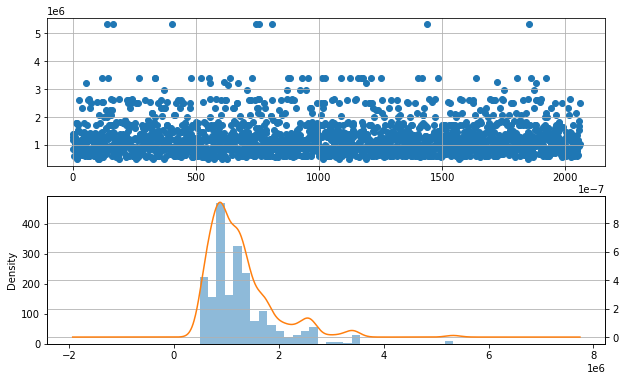

In [360]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  # Creating a scatter plot 
ax1.scatter(task2['Median_house_price'].index, task2['Median_house_price'].values)
plt.grid()

ax2 = fig.add_subplot(2,1,2)  # Create orthogonal distribution charts
task2['Median_house_price'].hist(bins=30,alpha = 0.5,ax = ax2)
task2['Median_house_price'].plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

This is a left-skewed distribution

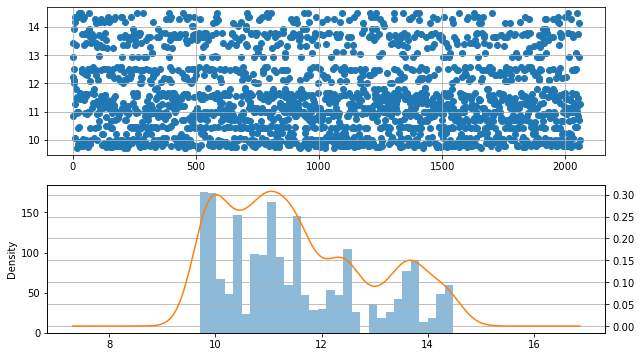

In [361]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  # Creating a scatter plot
ax1.scatter(task2['House_quarterly_growth'].index, task2['House_quarterly_growth'].values)
plt.grid()

ax2 = fig.add_subplot(2,1,2)  # Create orthogonal distribution charts
task2['House_quarterly_growth'].hist(bins=30,alpha = 0.5,ax = ax2)
task2['House_quarterly_growth'].plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

Not a normal distribution

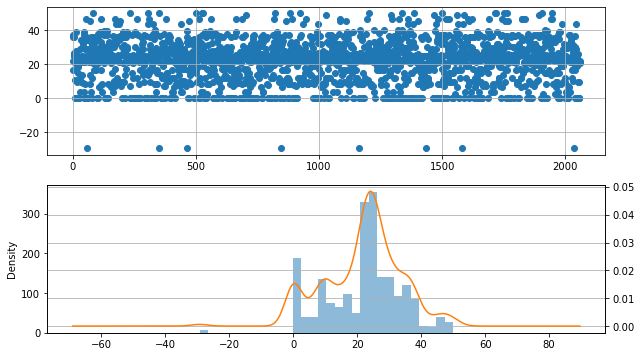

In [362]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  # Creating a scatter plot
ax1.scatter(task2['House_twelve_month_growth'].index, task2['House_twelve_month_growth'].values)
plt.grid()

ax2 = fig.add_subplot(2,1,2)  # Create orthogonal distribution charts
task2['House_twelve_month_growth'].hist(bins=30,alpha = 0.5,ax = ax2)
task2['House_twelve_month_growth'].plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

Right-skewed normal distribution

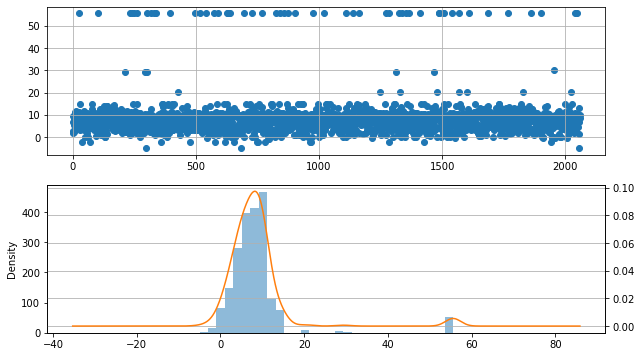

In [363]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  # Creating a scatter plot
ax1.scatter(task2['House_average_annual_growth'].index, task2['House_average_annual_growth'].values)
plt.grid()

ax2 = fig.add_subplot(2,1,2)  # Create orthogonal distribution charts
task2['House_average_annual_growth'].hist(bins=30,alpha = 0.5,ax = ax2)
task2['House_average_annual_growth'].plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

considered to be normally distributed

Dividing the data into training and test sets

In [386]:
x_train,x_test = train_test_split(task2[['Median_house_price','House_twelve_month_growth','House_average_annual_growth']])
y_train,y_test = train_test_split(task2['House_quarterly_growth'])

Data standardization

In [372]:
linear = LinearRegression()

In [394]:
# Original data
linear.fit(x_train,y_train)
y_predict_in_train= linear.predict(x_train)
y_predict_in_test = linear.predict(x_test)
error_in_train  = metrics.mean_squared_error(y_predict_in_train,y_train)  #Loss fucntion values (mean square) on the training set
error_in_test   = metrics.mean_squared_error(y_predict_in_test,y_test)    #Value of Loss function on the test set (mean square)
print("error in train:{}".format(error_in_train))
print("error in test:{}".format(error_in_test))


error in train:1.903891411102869
error in test:1.9065678429477648


In [404]:
#standardization data
linear_stand = LinearRegression()
ss = StandardScaler()
xtrain_ss = ss.fit_transform(x_train)
xtest_ss = ss.fit_transform(x_test)
linear_stand.fit(xtrain_ss,y_train)
y_predict_in_train= linear_stand.predict(xtrain_ss)
y_predict_in_test = linear_stand.predict(xtest_ss)
error_in_train  = metrics.mean_squared_error(y_predict_in_train,y_train)  #Loss fucntion values (mean square) on the training set
error_in_test   = metrics.mean_squared_error(y_predict_in_test,y_test)    #Value of Loss function on the test set (mean square)
print("error in train:{}".format(error_in_train))
print("error in test:{}".format(error_in_test))


error in train:1.903891411102869
error in test:1.90607117814156


In terms of the results, there is little variation because the pure linear model fit is too poor and the polynomial fit is chosen

In [405]:
# degree = 2
linear_stanpoly = LinearRegression()
ss = StandardScaler()
xtrain_ss = ss.fit_transform(x_train)
xtest_ss = ss.fit_transform(x_test)
xtrain_ss_poly =PolynomialFeatures(degree=2).fit_transform(xtrain_ss)
xtest_ss_poly =PolynomialFeatures(degree=2).fit_transform(xtest_ss)
linear_stanpoly.fit(xtrain_ss_poly,y_train)
y_predict_in_train= linear_stanpoly.predict(xtrain_ss_poly)
y_predict_in_test = linear_stanpoly.predict(xtest_ss_poly)
error_in_train  = metrics.mean_squared_error(y_predict_in_train,y_train)  #Loss fucntion values (mean square) on the training set
error_in_test   = metrics.mean_squared_error(y_predict_in_test,y_test)    #Value of Loss function on the test set (mean square)
print("error in train:{}".format(error_in_train))
print("error in test:{}".format(error_in_test))





error in train:1.897561887204263
error in test:1.8899585352055666


In [406]:
# degree = 3
linear_stanpoly = LinearRegression()
ss = StandardScaler()
xtrain_ss = ss.fit_transform(x_train)
xtest_ss = ss.fit_transform(x_test)
xtrain_ss_poly =PolynomialFeatures(degree=3).fit_transform(xtrain_ss)
xtest_ss_poly =PolynomialFeatures(degree=3).fit_transform(xtest_ss)
linear_stanpoly.fit(xtrain_ss_poly,y_train)
y_predict_in_train= linear_stanpoly.predict(xtrain_ss_poly)
y_predict_in_test = linear_stanpoly.predict(xtest_ss_poly)
error_in_train  = metrics.mean_squared_error(y_predict_in_train,y_train)  #Loss fucntion values (mean square) on the training set
error_in_test   = metrics.mean_squared_error(y_predict_in_test,y_test)    #Value of Loss function on the test set (mean square)
print("error in train:{}".format(error_in_train))
print("error in test:{}".format(error_in_test))

error in train:1.8819432105301583
error in test:1.8987169607052763


In [407]:
# degree = 4
linear_stanpoly = LinearRegression()
ss = StandardScaler()
xtrain_ss = ss.fit_transform(x_train)
xtest_ss = ss.fit_transform(x_test)
xtrain_ss_poly =PolynomialFeatures(degree=4).fit_transform(xtrain_ss)
xtest_ss_poly =PolynomialFeatures(degree=4).fit_transform(xtest_ss)
linear_stanpoly.fit(xtrain_ss_poly,y_train)
y_predict_in_train= linear_stanpoly.predict(xtrain_ss_poly)
y_predict_in_test = linear_stanpoly.predict(xtest_ss_poly)
error_in_train  = metrics.mean_squared_error(y_predict_in_train,y_train)  #Loss fucntion values (mean square) on the training set
error_in_test   = metrics.mean_squared_error(y_predict_in_test,y_test)    #Value of Loss function on the test set (mean square)
print("error in train:{}".format(error_in_train))
print("error in test:{}".format(error_in_test))

error in train:1.8549957368485683
error in test:1.9274690782694255


In [416]:
# degree = 5
linear_stanpoly = LinearRegression()
ss = StandardScaler()
xtrain_ss = ss.fit_transform(x_train)
xtest_ss = ss.fit_transform(x_test)
xtrain_ss_poly =PolynomialFeatures(degree=5).fit_transform(xtrain_ss)
xtest_ss_poly =PolynomialFeatures(degree=5).fit_transform(xtest_ss)
linear_stanpoly.fit(xtrain_ss_poly,y_train)
y_predict_in_train= linear_stanpoly.predict(xtrain_ss_poly)
y_predict_in_test = linear_stanpoly.predict(xtest_ss_poly)
error_in_train  = metrics.mean_squared_error(y_predict_in_train,y_train)  #Loss fucntion values (mean square) on the training set
error_in_test   = metrics.mean_squared_error(y_predict_in_test,y_test)    #Value of Loss function on the test set (mean square)
print("error in train:{}".format(error_in_train))
print("error in test:{}".format(error_in_test))

error in train:1.8300355364592744
error in test:166.86834464582932


When the degree of polynomial is about large, the train error is found to be smaller and smaller, the test error is found to be larger and larger, and overfitting exists when the degree is too high.

 minmax normalization

In [403]:
#minmax normalization data
linear_minmax = LinearRegression()
mm = MinMaxScaler()
xtrain_mm = mm.fit_transform(x_train)
xtest_mm = mm.fit_transform(x_test)
linear_minmax.fit(xtrain_mm,y_train)
y_predict_in_train= linear_minmax.predict(xtrain_mm)
y_predict_in_test = linear_minmax.predict(xtest_mm)
error_in_train  = metrics.mean_squared_error(y_predict_in_train,y_train)  #Loss fucntion values (mean square) on the training set
error_in_test   = metrics.mean_squared_error(y_predict_in_test,y_test)    #Value of Loss function on the test set (mean square)
print("error in train:{}".format(error_in_train))
print("error in test:{}".format(error_in_test))

error in train:1.929670060794505
error in test:1.8864927418812938


In terms of the results, there is little variation because the pure linear model fit is too poor and the polynomial fit is chosen

In [411]:
# degree = 2
linear_minmaxpoly = LinearRegression()
mm = MinMaxScaler()
xtrain_mm = mm.fit_transform(x_train)
xtest_mm = mm.fit_transform(x_test)
xtrain_mm_poly =PolynomialFeatures(degree=2).fit_transform(xtrain_mm)
xtest_mm_poly =PolynomialFeatures(degree=2).fit_transform(xtest_mm)
linear_minmaxpoly.fit(xtrain_mm_poly,y_train)
y_predict_in_train= linear_minmaxpoly.predict(xtrain_mm_poly)
y_predict_in_test = linear_minmaxpoly.predict(xtest_mm_poly)
error_in_train  = metrics.mean_squared_error(y_predict_in_train,y_train)  #Loss fucntion values (mean square) on the training set
error_in_test   = metrics.mean_squared_error(y_predict_in_test,y_test)    #Value of Loss function on the test set (mean square)
print("error in train:{}".format(error_in_train))
print("error in test:{}".format(error_in_test))


error in train:1.8975618872042628
error in test:1.8903367061875835


In [413]:
# degree = 3
linear_minmaxpoly = LinearRegression()
mm = MinMaxScaler()
xtrain_mm = mm.fit_transform(x_train)
xtest_mm = mm.fit_transform(x_test)
xtrain_mm_poly =PolynomialFeatures(degree=3).fit_transform(xtrain_mm)
xtest_mm_poly =PolynomialFeatures(degree=3).fit_transform(xtest_mm)
linear_minmaxpoly.fit(xtrain_mm_poly,y_train)
y_predict_in_train= linear_minmaxpoly.predict(xtrain_mm_poly)
y_predict_in_test = linear_minmaxpoly.predict(xtest_mm_poly)
error_in_train  = metrics.mean_squared_error(y_predict_in_train,y_train)  #Loss fucntion values (mean square) on the training set
error_in_test   = metrics.mean_squared_error(y_predict_in_test,y_test)    #Value of Loss function on the test set (mean square)
print("error in train:{}".format(error_in_train))
print("error in test:{}".format(error_in_test))

error in train:1.8819432105301583
error in test:1.8985138000850923


In [412]:
# degree = 4
linear_minmaxpoly = LinearRegression()
mm = MinMaxScaler()
xtrain_mm = mm.fit_transform(x_train)
xtest_mm = mm.fit_transform(x_test)
xtrain_mm_poly =PolynomialFeatures(degree=4).fit_transform(xtrain_mm)
xtest_mm_poly =PolynomialFeatures(degree=4).fit_transform(xtest_mm)
linear_minmaxpoly.fit(xtrain_mm_poly,y_train)
y_predict_in_train= linear_minmaxpoly.predict(xtrain_mm_poly)
y_predict_in_test = linear_minmaxpoly.predict(xtest_mm_poly)
error_in_train  = metrics.mean_squared_error(y_predict_in_train,y_train)  #Loss fucntion values (mean square) on the training set
error_in_test   = metrics.mean_squared_error(y_predict_in_test,y_test)    #Value of Loss function on the test set (mean square)
print("error in train:{}".format(error_in_train))
print("error in test:{}".format(error_in_test))

error in train:1.8549957368485672
error in test:1.932447195505724


In [418]:
# degree = 5
linear_minmaxpoly = LinearRegression()
mm = MinMaxScaler()
xtrain_mm = mm.fit_transform(x_train)
xtest_mm = mm.fit_transform(x_test)
xtrain_mm_poly =PolynomialFeatures(degree=5).fit_transform(xtrain_mm)
xtest_mm_poly =PolynomialFeatures(degree=5).fit_transform(xtest_mm)
linear_minmaxpoly.fit(xtrain_mm_poly,y_train)
y_predict_in_train= linear_minmaxpoly.predict(xtrain_mm_poly)
y_predict_in_test = linear_minmaxpoly.predict(xtest_mm_poly)
error_in_train  = metrics.mean_squared_error(y_predict_in_train,y_train)  #Loss fucntion values (mean square) on the training set
error_in_test   = metrics.mean_squared_error(y_predict_in_test,y_test)    #Value of Loss function on the test set (mean square)
print("error in train:{}".format(error_in_train))
print("error in test:{}".format(error_in_test))

error in train:1.830035536459268
error in test:1.9940580194655966


When the degree of polynomial is about large, the train error is found to be smaller and smaller, the test error is found to be larger and larger, and overfitting exists when the degree is too high.

# Conclution
As far as the two methods are concerned, there is some improvement to the data, but the difference between the two methods is not significant. In order to make the fit better, polynomial fit is used, but it should be noted that the degree should not be too large, there will be overfitting.
From the mse results, the minmax method can effectively reduce the problem of overfitting of polynomial regression, so it is recommended to use the polynomial regression after minmax processing for prediction.